In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import tensorflow as tf
import json

In [2]:
dataDir = ""

stockDF = pd.read_csv(dataDir+"spData.csv",usecols=["Date","Close"]).set_index("Date")
newCases = pd.read_csv(dataDir+"new_cases.csv",usecols=["date","United States"]).set_index('date')
newDeaths = pd.read_csv(dataDir+"new_deaths.csv",usecols=["date","United States"]).set_index('date')
totalCases = pd.read_csv(dataDir+"total_cases.csv",usecols=["date","United States"]).set_index('date')
totalDeaths = pd.read_csv(dataDir+"total_deaths.csv",usecols=["date","United States"]).set_index('date')


In [3]:
def incrementDateStr(dateStr, numDays):
    dateParts = [int(part) for part in dateStr.split('-')]
    date = datetime.datetime(dateParts[0], dateParts[1], dateParts[2])
    nextDay = date + datetime.timedelta(days = numDays)
    nextDayStr = str(nextDay.year) + '-' + str(nextDay.month).zfill(2) + '-' + str(nextDay.day).zfill(2)
    return nextDayStr

In [ ]:
incrementDateStr("2020-02-03", 4)

In [4]:
import datetime

dataframe = pd.DataFrame(columns=['stockDate', 'casesDate', 'stock', 'newCases', 'newDeaths', 'totalCases', 'totalDeaths'])
stockDates = list(stockDF.index)
newCasesDates = list(newCases.index)
newDeathsDates = list(newDeaths.index)
totalCasesDates = list(totalCases.index)
totalDeathsDates = list(totalDeaths.index)
dateLists = [newCasesDates, newDeathsDates, totalCasesDates, totalDeathsDates]
for dateStr in newCasesDates:
  dateParts = [int(part) for part in dateStr.split('-')]
  date = datetime.datetime(dateParts[0], dateParts[1], dateParts[2])
  nextDay = date + datetime.timedelta(days = 1)
  nextDayStr = str(nextDay.year) + '-' + str(nextDay.month).zfill(2) + '-' + str(nextDay.day).zfill(2)
  if all([dateStr in lists for lists in dateLists]) and nextDayStr in stockDates:
    new_row = {'stockDate':nextDayStr, 'casesDate':dateStr, 'stock':stockDF['Close'][nextDayStr], 'newCases':newCases['United States'][dateStr], 'newDeaths':newDeaths['United States'][dateStr],'totalCases':totalCases['United States'][dateStr], 'totalDeaths':totalDeaths['United States'][dateStr]}
    dataframe = dataframe.append(new_row, ignore_index=True)

In [5]:
dataframe.head

<bound method NDFrame.head of       stockDate   casesDate        stock newCases newDeaths totalCases  \
0    2020-01-02  2020-01-01  3257.850098        0         0          0   
1    2020-01-03  2020-01-02  3234.850098        0         0          0   
2    2020-01-06  2020-01-05  3246.280029        0         0          0   
3    2020-01-07  2020-01-06  3237.179932        0         0          0   
4    2020-01-08  2020-01-07  3253.050049        0         0          0   
..          ...         ...          ...      ...       ...        ...   
181  2020-09-21  2020-09-20  3281.060059    40295       669    6764962   
182  2020-09-22  2020-09-21  3315.570068    39852       251    6804814   
183  2020-09-23  2020-09-22  3236.919922    53153       372    6857967   
184  2020-09-24  2020-09-23  3246.590088    38307       926    6896274   
185  2020-09-25  2020-09-24  3298.459961    37930      1102    6934204   

    totalDeaths  
0             0  
1             0  
2             0  
3        

In [ ]:
print(totalDeaths.index)

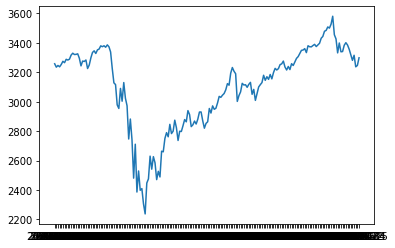

In [6]:
plt.plot(dataframe["stockDate"], dataframe["stock"])

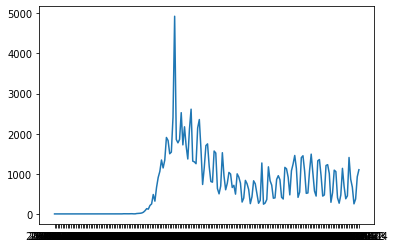

In [7]:
plt.plot(dataframe["casesDate"], dataframe["newDeaths"])

In [8]:
from sklearn.model_selection import train_test_split
X = dataframe.drop(["stock", "casesDate", "stockDate"],axis=1).values
y = dataframe['stock'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.metrics import mae

model = Sequential()

model.add(Dense(4))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

# TODO dropout, data, model

model.compile(optimizer='adam',loss='mse', metrics=[mae])

In [11]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=256,epochs=8500)

Train on 139 samples, validate on 47 samples
Epoch 1/8500
139/139 [==============================] - 1s 4ms/sample - loss: 9625362.0000 - mean_absolute_error: 3089.1011 - val_loss: 9879622.0000 - val_mean_absolute_error: 3132.6736
Epoch 2/8500
139/139 [==============================] - 0s 58us/sample - loss: 9625140.0000 - mean_absolute_error: 3089.0657 - val_loss: 9879387.0000 - val_mean_absolute_error: 3132.6370
Epoch 3/8500
139/139 [==============================] - 0s 72us/sample - loss: 9624919.0000 - mean_absolute_error: 3089.0305 - val_loss: 9879157.0000 - val_mean_absolute_error: 3132.6008
Epoch 4/8500
139/139 [==============================] - 0s 65us/sample - loss: 9624704.0000 - mean_absolute_error: 3088.9966 - val_loss: 9878927.0000 - val_mean_absolute_error: 3132.5649
Epoch 5/8500
139/139 [==============================] - 0s 58us/sample - loss: 9624493.0000 - mean_absolute_error: 3088.9626 - val_loss: 9878700.0000 - val_mean_absolute_error: 3132.5293
Epoch 6/8500
139/139 

Epoch 45/8500
139/139 [==============================] - 0s 65us/sample - loss: 9617528.0000 - mean_absolute_error: 3087.8508 - val_loss: 9871171.0000 - val_mean_absolute_error: 3131.3472
Epoch 46/8500
139/139 [==============================] - 0s 65us/sample - loss: 9617251.0000 - mean_absolute_error: 3087.8064 - val_loss: 9870856.0000 - val_mean_absolute_error: 3131.2976
Epoch 47/8500
139/139 [==============================] - 0s 58us/sample - loss: 9616960.0000 - mean_absolute_error: 3087.7603 - val_loss: 9870529.0000 - val_mean_absolute_error: 3131.2461
Epoch 48/8500
139/139 [==============================] - 0s 58us/sample - loss: 9616659.0000 - mean_absolute_error: 3087.7119 - val_loss: 9870188.0000 - val_mean_absolute_error: 3131.1924
Epoch 49/8500
139/139 [==============================] - 0s 58us/sample - loss: 9616344.0000 - mean_absolute_error: 3087.6619 - val_loss: 9869833.0000 - val_mean_absolute_error: 3131.1367
Epoch 50/8500
139/139 [==============================] - 0s 

Epoch 89/8500
139/139 [==============================] - 0s 65us/sample - loss: 9584971.0000 - mean_absolute_error: 3082.6675 - val_loss: 9834022.0000 - val_mean_absolute_error: 3125.5220
Epoch 90/8500
139/139 [==============================] - 0s 65us/sample - loss: 9583419.0000 - mean_absolute_error: 3082.4207 - val_loss: 9832250.0000 - val_mean_absolute_error: 3125.2439
Epoch 91/8500
139/139 [==============================] - 0s 65us/sample - loss: 9581805.0000 - mean_absolute_error: 3082.1638 - val_loss: 9830414.0000 - val_mean_absolute_error: 3124.9561
Epoch 92/8500
139/139 [==============================] - 0s 58us/sample - loss: 9580131.0000 - mean_absolute_error: 3081.8972 - val_loss: 9828514.0000 - val_mean_absolute_error: 3124.6575
Epoch 93/8500
139/139 [==============================] - 0s 58us/sample - loss: 9578397.0000 - mean_absolute_error: 3081.6208 - val_loss: 9826549.0000 - val_mean_absolute_error: 3124.3499
Epoch 94/8500
139/139 [==============================] - 0s 

Epoch 133/8500
139/139 [==============================] - 0s 65us/sample - loss: 9428606.0000 - mean_absolute_error: 3057.6897 - val_loss: 9656957.0000 - val_mean_absolute_error: 3097.6184
Epoch 134/8500
139/139 [==============================] - 0s 65us/sample - loss: 9421934.0000 - mean_absolute_error: 3056.6194 - val_loss: 9649416.0000 - val_mean_absolute_error: 3096.4236
Epoch 135/8500
139/139 [==============================] - 0s 58us/sample - loss: 9415062.0000 - mean_absolute_error: 3055.5166 - val_loss: 9641652.0000 - val_mean_absolute_error: 3095.1929
Epoch 136/8500
139/139 [==============================] - 0s 65us/sample - loss: 9407988.0000 - mean_absolute_error: 3054.3811 - val_loss: 9633659.0000 - val_mean_absolute_error: 3093.9253
Epoch 137/8500
139/139 [==============================] - 0s 65us/sample - loss: 9400707.0000 - mean_absolute_error: 3053.2117 - val_loss: 9625433.0000 - val_mean_absolute_error: 3092.6196
Epoch 138/8500
139/139 [==============================]

Epoch 177/8500
139/139 [==============================] - 0s 58us/sample - loss: 8869819.0000 - mean_absolute_error: 2966.3743 - val_loss: 9027702.0000 - val_mean_absolute_error: 2995.8091
Epoch 178/8500
139/139 [==============================] - 0s 65us/sample - loss: 8848648.0000 - mean_absolute_error: 2962.8440 - val_loss: 9003948.0000 - val_mean_absolute_error: 2991.8777
Epoch 179/8500
139/139 [==============================] - 0s 65us/sample - loss: 8827000.0000 - mean_absolute_error: 2959.2275 - val_loss: 8979660.0000 - val_mean_absolute_error: 2987.8503
Epoch 180/8500
139/139 [==============================] - 0s 72us/sample - loss: 8804859.0000 - mean_absolute_error: 2955.5234 - val_loss: 8954830.0000 - val_mean_absolute_error: 2983.7261
Epoch 181/8500
139/139 [==============================] - 0s 65us/sample - loss: 8782223.0000 - mean_absolute_error: 2951.7297 - val_loss: 8929452.0000 - val_mean_absolute_error: 2979.5027
Epoch 182/8500
139/139 [==============================]

Epoch 221/8500
139/139 [==============================] - 0s 58us/sample - loss: 7382401.5000 - mean_absolute_error: 2702.9148 - val_loss: 7373331.0000 - val_mean_absolute_error: 2703.2935
Epoch 222/8500
139/139 [==============================] - 0s 65us/sample - loss: 7333898.5000 - mean_absolute_error: 2693.7202 - val_loss: 7319895.0000 - val_mean_absolute_error: 2693.1157
Epoch 223/8500
139/139 [==============================] - 0s 65us/sample - loss: 7284736.0000 - mean_absolute_error: 2684.3560 - val_loss: 7265769.5000 - val_mean_absolute_error: 2682.7517
Epoch 224/8500
139/139 [==============================] - 0s 65us/sample - loss: 7234914.0000 - mean_absolute_error: 2674.8188 - val_loss: 7210959.0000 - val_mean_absolute_error: 2672.2004
Epoch 225/8500
139/139 [==============================] - 0s 65us/sample - loss: 7184443.0000 - mean_absolute_error: 2665.1086 - val_loss: 7155471.0000 - val_mean_absolute_error: 2661.4595
Epoch 226/8500
139/139 [==============================]

Epoch 265/8500
139/139 [==============================] - 0s 58us/sample - loss: 4774864.0000 - mean_absolute_error: 2123.2239 - val_loss: 4555243.5000 - val_mean_absolute_error: 2064.3928
Epoch 266/8500
139/139 [==============================] - 0s 79us/sample - loss: 4710667.0000 - mean_absolute_error: 2105.8240 - val_loss: 4487627.5000 - val_mean_absolute_error: 2045.2933
Epoch 267/8500
139/139 [==============================] - 0s 72us/sample - loss: 4646666.0000 - mean_absolute_error: 2088.2542 - val_loss: 4420340.5000 - val_mean_absolute_error: 2026.0142
Epoch 268/8500
139/139 [==============================] - 0s 65us/sample - loss: 4582899.5000 - mean_absolute_error: 2070.5188 - val_loss: 4353419.0000 - val_mean_absolute_error: 2006.5588
Epoch 269/8500
139/139 [==============================] - 0s 58us/sample - loss: 4519399.0000 - mean_absolute_error: 2052.6206 - val_loss: 4286899.5000 - val_mean_absolute_error: 1986.9305
Epoch 270/8500
139/139 [==============================]

Epoch 309/8500
139/139 [==============================] - 0s 58us/sample - loss: 2560971.5000 - mean_absolute_error: 1433.8099 - val_loss: 2330620.7500 - val_mean_absolute_error: 1320.8765
Epoch 310/8500
139/139 [==============================] - 0s 58us/sample - loss: 2532163.5000 - mean_absolute_error: 1424.4828 - val_loss: 2304110.7500 - val_mean_absolute_error: 1315.4106
Epoch 311/8500
139/139 [==============================] - 0s 65us/sample - loss: 2504349.5000 - mean_absolute_error: 1415.5972 - val_loss: 2278605.5000 - val_mean_absolute_error: 1309.9288
Epoch 312/8500
139/139 [==============================] - 0s 58us/sample - loss: 2477507.0000 - mean_absolute_error: 1407.3994 - val_loss: 2254074.5000 - val_mean_absolute_error: 1304.5078
Epoch 313/8500
139/139 [==============================] - 0s 58us/sample - loss: 2451614.0000 - mean_absolute_error: 1399.4720 - val_loss: 2230485.0000 - val_mean_absolute_error: 1300.0767
Epoch 314/8500
139/139 [==============================]

Epoch 353/8500
139/139 [==============================] - 0s 72us/sample - loss: 1879426.0000 - mean_absolute_error: 1191.0148 - val_loss: 1684330.3750 - val_mean_absolute_error: 1135.1962
Epoch 354/8500
139/139 [==============================] - 0s 65us/sample - loss: 1870671.0000 - mean_absolute_error: 1186.7216 - val_loss: 1674513.3750 - val_mean_absolute_error: 1130.5044
Epoch 355/8500
139/139 [==============================] - 0s 72us/sample - loss: 1862038.8750 - mean_absolute_error: 1182.4486 - val_loss: 1664780.1250 - val_mean_absolute_error: 1125.7810
Epoch 356/8500
139/139 [==============================] - 0s 65us/sample - loss: 1853526.7500 - mean_absolute_error: 1178.1965 - val_loss: 1655131.3750 - val_mean_absolute_error: 1121.0297
Epoch 357/8500
139/139 [==============================] - 0s 65us/sample - loss: 1845132.2500 - mean_absolute_error: 1173.9653 - val_loss: 1645570.7500 - val_mean_absolute_error: 1116.2550
Epoch 358/8500
139/139 [==============================]

Epoch 397/8500
139/139 [==============================] - 0s 58us/sample - loss: 1594237.8750 - mean_absolute_error: 1037.0653 - val_loss: 1350854.0000 - val_mean_absolute_error: 945.2013
Epoch 398/8500
139/139 [==============================] - 0s 65us/sample - loss: 1589794.3750 - mean_absolute_error: 1034.5604 - val_loss: 1345689.8750 - val_mean_absolute_error: 941.8584
Epoch 399/8500
139/139 [==============================] - 0s 58us/sample - loss: 1585422.8750 - mean_absolute_error: 1032.0780 - val_loss: 1340619.1250 - val_mean_absolute_error: 938.5499
Epoch 400/8500
139/139 [==============================] - 0s 58us/sample - loss: 1581122.5000 - mean_absolute_error: 1029.6179 - val_loss: 1335639.3750 - val_mean_absolute_error: 935.5237
Epoch 401/8500
139/139 [==============================] - 0s 65us/sample - loss: 1576889.0000 - mean_absolute_error: 1027.1798 - val_loss: 1330750.0000 - val_mean_absolute_error: 932.5648
Epoch 402/8500
139/139 [==============================] - 0s

Epoch 441/8500
139/139 [==============================] - 0s 65us/sample - loss: 1447987.7500 - mean_absolute_error: 954.8440 - val_loss: 1189728.2500 - val_mean_absolute_error: 839.1581
Epoch 442/8500
139/139 [==============================] - 0s 65us/sample - loss: 1445461.3750 - mean_absolute_error: 953.5327 - val_loss: 1187160.1250 - val_mean_absolute_error: 837.3997
Epoch 443/8500
139/139 [==============================] - 0s 58us/sample - loss: 1442956.8750 - mean_absolute_error: 952.2356 - val_loss: 1184622.6250 - val_mean_absolute_error: 835.6658
Epoch 444/8500
139/139 [==============================] - 0s 58us/sample - loss: 1440474.5000 - mean_absolute_error: 950.9521 - val_loss: 1182115.6250 - val_mean_absolute_error: 833.9566
Epoch 445/8500
139/139 [==============================] - 0s 65us/sample - loss: 1438008.0000 - mean_absolute_error: 949.6813 - val_loss: 1179637.5000 - val_mean_absolute_error: 832.2719
Epoch 446/8500
139/139 [==============================] - 0s 58us

Epoch 485/8500
139/139 [==============================] - 0s 65us/sample - loss: 1349828.2500 - mean_absolute_error: 908.9485 - val_loss: 1096618.6250 - val_mean_absolute_error: 785.1860
Epoch 486/8500
139/139 [==============================] - 0s 58us/sample - loss: 1347806.2500 - mean_absolute_error: 908.1233 - val_loss: 1094807.8750 - val_mean_absolute_error: 784.3782
Epoch 487/8500
139/139 [==============================] - 0s 58us/sample - loss: 1345787.1250 - mean_absolute_error: 907.3030 - val_loss: 1093006.6250 - val_mean_absolute_error: 783.5790
Epoch 488/8500
139/139 [==============================] - 0s 58us/sample - loss: 1343774.2500 - mean_absolute_error: 906.4882 - val_loss: 1091214.2500 - val_mean_absolute_error: 782.7882
Epoch 489/8500
139/139 [==============================] - 0s 65us/sample - loss: 1341767.1250 - mean_absolute_error: 905.6787 - val_loss: 1089431.0000 - val_mean_absolute_error: 782.0057
Epoch 490/8500
139/139 [==============================] - 0s 65us

Epoch 529/8500
139/139 [==============================] - 0s 58us/sample - loss: 1264298.1250 - mean_absolute_error: 876.6008 - val_loss: 1021876.9375 - val_mean_absolute_error: 756.6401
Epoch 530/8500
139/139 [==============================] - 0s 58us/sample - loss: 1262410.8750 - mean_absolute_error: 875.9321 - val_loss: 1020267.9375 - val_mean_absolute_error: 756.0813
Epoch 531/8500
139/139 [==============================] - 0s 65us/sample - loss: 1260523.3750 - mean_absolute_error: 875.2646 - val_loss: 1018662.1250 - val_mean_absolute_error: 755.5250
Epoch 532/8500
139/139 [==============================] - 0s 58us/sample - loss: 1258637.1250 - mean_absolute_error: 874.5991 - val_loss: 1017059.5625 - val_mean_absolute_error: 754.9713
Epoch 533/8500
139/139 [==============================] - 0s 58us/sample - loss: 1256753.0000 - mean_absolute_error: 873.9354 - val_loss: 1015459.5625 - val_mean_absolute_error: 754.4197
Epoch 534/8500
139/139 [==============================] - 0s 58us

Epoch 573/8500
139/139 [==============================] - 0s 65us/sample - loss: 1182312.8750 - mean_absolute_error: 848.2940 - val_loss: 951939.2500 - val_mean_absolute_error: 733.3690
Epoch 574/8500
139/139 [==============================] - 0s 72us/sample - loss: 1180453.5000 - mean_absolute_error: 847.6646 - val_loss: 950383.6875 - val_mean_absolute_error: 732.8640
Epoch 575/8500
139/139 [==============================] - 0s 58us/sample - loss: 1178596.0000 - mean_absolute_error: 847.0359 - val_loss: 948829.8750 - val_mean_absolute_error: 732.3594
Epoch 576/8500
139/139 [==============================] - 0s 58us/sample - loss: 1176740.5000 - mean_absolute_error: 846.4077 - val_loss: 947278.3125 - val_mean_absolute_error: 731.8555
Epoch 577/8500
139/139 [==============================] - 0s 65us/sample - loss: 1174886.7500 - mean_absolute_error: 845.7798 - val_loss: 945728.7500 - val_mean_absolute_error: 731.3521
Epoch 578/8500
139/139 [==============================] - 0s 58us/samp

139/139 [==============================] - 0s 58us/sample - loss: 1102306.8750 - mean_absolute_error: 820.7692 - val_loss: 885400.0000 - val_mean_absolute_error: 711.3618
Epoch 618/8500
139/139 [==============================] - 0s 65us/sample - loss: 1100530.8750 - mean_absolute_error: 820.1442 - val_loss: 883931.3750 - val_mean_absolute_error: 710.8624
Epoch 619/8500
139/139 [==============================] - 0s 65us/sample - loss: 1098755.8750 - mean_absolute_error: 819.5190 - val_loss: 882464.1875 - val_mean_absolute_error: 710.3629
Epoch 620/8500
139/139 [==============================] - 0s 58us/sample - loss: 1096981.3750 - mean_absolute_error: 818.8935 - val_loss: 880998.3750 - val_mean_absolute_error: 709.8632
Epoch 621/8500
139/139 [==============================] - 0s 65us/sample - loss: 1095207.3750 - mean_absolute_error: 818.2677 - val_loss: 879533.8750 - val_mean_absolute_error: 709.3635
Epoch 622/8500
139/139 [==============================] - 0s 58us/sample - loss: 1093

Epoch 662/8500
139/139 [==============================] - 0s 58us/sample - loss: 1023686.1875 - mean_absolute_error: 792.5639 - val_loss: 820780.5000 - val_mean_absolute_error: 688.8302
Epoch 663/8500
139/139 [==============================] - 0s 65us/sample - loss: 1021964.3125 - mean_absolute_error: 791.9335 - val_loss: 819375.3750 - val_mean_absolute_error: 688.3276
Epoch 664/8500
139/139 [==============================] - 0s 58us/sample - loss: 1020243.5625 - mean_absolute_error: 791.3029 - val_loss: 817971.2500 - val_mean_absolute_error: 687.8248
Epoch 665/8500
139/139 [==============================] - 0s 58us/sample - loss: 1018524.0000 - mean_absolute_error: 790.6725 - val_loss: 816568.1875 - val_mean_absolute_error: 687.3218
Epoch 666/8500
139/139 [==============================] - 0s 65us/sample - loss: 1016806.0000 - mean_absolute_error: 790.0419 - val_loss: 815166.4375 - val_mean_absolute_error: 686.8188
Epoch 667/8500
139/139 [==============================] - 0s 65us/samp

Epoch 707/8500
139/139 [==============================] - 0s 58us/sample - loss: 947533.5625 - mean_absolute_error: 764.0225 - val_loss: 758712.8750 - val_mean_absolute_error: 665.9305
Epoch 708/8500
139/139 [==============================] - 0s 58us/sample - loss: 945863.9375 - mean_absolute_error: 763.3815 - val_loss: 757354.8750 - val_mean_absolute_error: 665.4128
Epoch 709/8500
139/139 [==============================] - 0s 65us/sample - loss: 944195.0000 - mean_absolute_error: 762.7403 - val_loss: 755997.8750 - val_mean_absolute_error: 664.8949
Epoch 710/8500
139/139 [==============================] - 0s 58us/sample - loss: 942527.5000 - mean_absolute_error: 762.0988 - val_loss: 754641.9375 - val_mean_absolute_error: 664.3766
Epoch 711/8500
139/139 [==============================] - 0s 65us/sample - loss: 940860.6875 - mean_absolute_error: 761.4570 - val_loss: 753286.8125 - val_mean_absolute_error: 663.8578
Epoch 712/8500
139/139 [==============================] - 0s 58us/sample - 

Epoch 752/8500
139/139 [==============================] - 0s 58us/sample - loss: 873348.9375 - mean_absolute_error: 734.8761 - val_loss: 698538.4375 - val_mean_absolute_error: 642.2932
Epoch 753/8500
139/139 [==============================] - 0s 65us/sample - loss: 871721.4375 - mean_absolute_error: 734.2198 - val_loss: 697221.1250 - val_mean_absolute_error: 641.7584
Epoch 754/8500
139/139 [==============================] - 0s 58us/sample - loss: 870094.8750 - mean_absolute_error: 733.5631 - val_loss: 695904.6875 - val_mean_absolute_error: 641.2233
Epoch 755/8500
139/139 [==============================] - 0s 65us/sample - loss: 868469.1250 - mean_absolute_error: 732.9060 - val_loss: 694589.2500 - val_mean_absolute_error: 640.6877
Epoch 756/8500
139/139 [==============================] - 0s 58us/sample - loss: 866844.5625 - mean_absolute_error: 732.2485 - val_loss: 693274.7500 - val_mean_absolute_error: 640.1517
Epoch 757/8500
139/139 [==============================] - 0s 65us/sample - 

Epoch 797/8500
139/139 [==============================] - 0s 58us/sample - loss: 799898.3750 - mean_absolute_error: 705.0952 - val_loss: 639496.1250 - val_mean_absolute_error: 617.7568
Epoch 798/8500
139/139 [==============================] - 0s 65us/sample - loss: 798267.3125 - mean_absolute_error: 704.4216 - val_loss: 638188.9375 - val_mean_absolute_error: 617.1980
Epoch 799/8500
139/139 [==============================] - 0s 58us/sample - loss: 796636.6875 - mean_absolute_error: 703.7468 - val_loss: 636882.3125 - val_mean_absolute_error: 616.6384
Epoch 800/8500
139/139 [==============================] - 0s 65us/sample - loss: 795006.1875 - mean_absolute_error: 703.0704 - val_loss: 635576.3125 - val_mean_absolute_error: 616.0782
Epoch 801/8500
139/139 [==============================] - 0s 65us/sample - loss: 793375.8750 - mean_absolute_error: 702.3926 - val_loss: 634271.1250 - val_mean_absolute_error: 615.5175
Epoch 802/8500
139/139 [==============================] - 0s 58us/sample - 

Epoch 842/8500
139/139 [==============================] - 0s 58us/sample - loss: 726764.7500 - mean_absolute_error: 673.7719 - val_loss: 581099.3125 - val_mean_absolute_error: 591.9070
Epoch 843/8500
139/139 [==============================] - 0s 58us/sample - loss: 725148.0625 - mean_absolute_error: 673.0549 - val_loss: 579808.3750 - val_mean_absolute_error: 591.3157
Epoch 844/8500
139/139 [==============================] - 0s 65us/sample - loss: 723532.1875 - mean_absolute_error: 672.3370 - val_loss: 578518.3125 - val_mean_absolute_error: 590.7240
Epoch 845/8500
139/139 [==============================] - 0s 58us/sample - loss: 721917.1250 - mean_absolute_error: 671.6169 - val_loss: 577229.0000 - val_mean_absolute_error: 590.1315
Epoch 846/8500
139/139 [==============================] - 0s 65us/sample - loss: 720302.7500 - mean_absolute_error: 670.8960 - val_loss: 575940.5000 - val_mean_absolute_error: 589.5386
Epoch 847/8500
139/139 [==============================] - 0s 65us/sample - 

Epoch 887/8500
139/139 [==============================] - 0s 50us/sample - loss: 654614.6250 - mean_absolute_error: 640.4979 - val_loss: 523066.1250 - val_mean_absolute_error: 564.2289
Epoch 888/8500
139/139 [==============================] - 0s 58us/sample - loss: 653010.5625 - mean_absolute_error: 639.7134 - val_loss: 521762.9062 - val_mean_absolute_error: 563.5634
Epoch 889/8500
139/139 [==============================] - 0s 58us/sample - loss: 651406.1875 - mean_absolute_error: 638.9280 - val_loss: 520456.7812 - val_mean_absolute_error: 562.8954
Epoch 890/8500
139/139 [==============================] - 0s 65us/sample - loss: 649801.3125 - mean_absolute_error: 638.1414 - val_loss: 519149.7812 - val_mean_absolute_error: 562.2263
Epoch 891/8500
139/139 [==============================] - 0s 65us/sample - loss: 648196.3125 - mean_absolute_error: 637.3542 - val_loss: 517842.7188 - val_mean_absolute_error: 561.5565
Epoch 892/8500
139/139 [==============================] - 0s 65us/sample - 

Epoch 932/8500
139/139 [==============================] - 0s 65us/sample - loss: 582713.8125 - mean_absolute_error: 604.5763 - val_loss: 464625.6875 - val_mean_absolute_error: 533.3656
Epoch 933/8500
139/139 [==============================] - 0s 65us/sample - loss: 581113.8125 - mean_absolute_error: 603.7346 - val_loss: 463317.8750 - val_mean_absolute_error: 532.6347
Epoch 934/8500
139/139 [==============================] - 0s 65us/sample - loss: 579514.1250 - mean_absolute_error: 602.8929 - val_loss: 462010.4688 - val_mean_absolute_error: 531.9039
Epoch 935/8500
139/139 [==============================] - 0s 58us/sample - loss: 577915.0000 - mean_absolute_error: 602.0513 - val_loss: 460703.4062 - val_mean_absolute_error: 531.1730
Epoch 936/8500
139/139 [==============================] - 0s 65us/sample - loss: 576316.5000 - mean_absolute_error: 601.2097 - val_loss: 459397.0938 - val_mean_absolute_error: 530.4426
Epoch 937/8500
139/139 [==============================] - 0s 58us/sample - 

Epoch 977/8500
139/139 [==============================] - 0s 58us/sample - loss: 511565.5312 - mean_absolute_error: 566.2838 - val_loss: 406466.5625 - val_mean_absolute_error: 499.7132
Epoch 978/8500
139/139 [==============================] - 0s 65us/sample - loss: 510007.2500 - mean_absolute_error: 565.4263 - val_loss: 405199.8438 - val_mean_absolute_error: 498.9609
Epoch 979/8500
139/139 [==============================] - 0s 58us/sample - loss: 508450.7500 - mean_absolute_error: 564.5686 - val_loss: 403934.3438 - val_mean_absolute_error: 498.2086
Epoch 980/8500
139/139 [==============================] - 0s 58us/sample - loss: 506896.8125 - mean_absolute_error: 563.7117 - val_loss: 402668.1562 - val_mean_absolute_error: 497.4546
Epoch 981/8500
139/139 [==============================] - 0s 65us/sample - loss: 505346.7188 - mean_absolute_error: 562.8564 - val_loss: 401405.0312 - val_mean_absolute_error: 496.7015
Epoch 982/8500
139/139 [==============================] - 0s 58us/sample - 

Epoch 1022/8500
139/139 [==============================] - 0s 65us/sample - loss: 442984.0312 - mean_absolute_error: 527.1241 - val_loss: 350682.3438 - val_mean_absolute_error: 465.2239
Epoch 1023/8500
139/139 [==============================] - 0s 65us/sample - loss: 441516.4375 - mean_absolute_error: 526.2601 - val_loss: 349504.3125 - val_mean_absolute_error: 464.4885
Epoch 1024/8500
139/139 [==============================] - 0s 65us/sample - loss: 440055.0000 - mean_absolute_error: 525.4013 - val_loss: 348325.1250 - val_mean_absolute_error: 463.7400
Epoch 1025/8500
139/139 [==============================] - 0s 58us/sample - loss: 438593.0000 - mean_absolute_error: 524.5330 - val_loss: 347128.4062 - val_mean_absolute_error: 462.9457
Epoch 1026/8500
139/139 [==============================] - 0s 58us/sample - loss: 437115.9688 - mean_absolute_error: 523.6230 - val_loss: 345931.9375 - val_mean_absolute_error: 462.1503
Epoch 1027/8500
139/139 [==============================] - 0s 65us/sam

139/139 [==============================] - 0s 65us/sample - loss: 379959.5000 - mean_absolute_error: 488.2416 - val_loss: 300140.5000 - val_mean_absolute_error: 431.9338
Epoch 1067/8500
139/139 [==============================] - 0s 58us/sample - loss: 378572.6250 - mean_absolute_error: 487.3685 - val_loss: 299008.8125 - val_mean_absolute_error: 431.1682
Epoch 1068/8500
139/139 [==============================] - 0s 58us/sample - loss: 377187.2812 - mean_absolute_error: 486.4967 - val_loss: 297873.6250 - val_mean_absolute_error: 430.3968
Epoch 1069/8500
139/139 [==============================] - 0s 58us/sample - loss: 375794.0000 - mean_absolute_error: 485.6239 - val_loss: 296721.1875 - val_mean_absolute_error: 429.5854
Epoch 1070/8500
139/139 [==============================] - 0s 58us/sample - loss: 374383.3750 - mean_absolute_error: 484.7159 - val_loss: 295557.2188 - val_mean_absolute_error: 428.7442
Epoch 1071/8500
139/139 [==============================] - 0s 65us/sample - loss: 3729

Epoch 1111/8500
139/139 [==============================] - 0s 58us/sample - loss: 319183.6562 - mean_absolute_error: 446.5499 - val_loss: 250640.1719 - val_mean_absolute_error: 394.9348
Epoch 1112/8500
139/139 [==============================] - 0s 65us/sample - loss: 317890.1875 - mean_absolute_error: 445.6291 - val_loss: 249601.2812 - val_mean_absolute_error: 394.1143
Epoch 1113/8500
139/139 [==============================] - 0s 65us/sample - loss: 316601.9688 - mean_absolute_error: 444.7121 - val_loss: 248566.2969 - val_mean_absolute_error: 393.2970
Epoch 1114/8500
139/139 [==============================] - 0s 58us/sample - loss: 315320.6562 - mean_absolute_error: 443.8021 - val_loss: 247539.2344 - val_mean_absolute_error: 392.4866
Epoch 1115/8500
139/139 [==============================] - 0s 65us/sample - loss: 314043.1250 - mean_absolute_error: 442.8966 - val_loss: 246518.3438 - val_mean_absolute_error: 391.6815
Epoch 1116/8500
139/139 [==============================] - 0s 58us/sam

Epoch 1156/8500
139/139 [==============================] - 0s 58us/sample - loss: 264444.9062 - mean_absolute_error: 406.8657 - val_loss: 207705.5312 - val_mean_absolute_error: 359.8633
Epoch 1157/8500
139/139 [==============================] - 0s 72us/sample - loss: 263314.2188 - mean_absolute_error: 406.0391 - val_loss: 206839.2344 - val_mean_absolute_error: 359.1310
Epoch 1158/8500
139/139 [==============================] - 0s 65us/sample - loss: 262187.4375 - mean_absolute_error: 405.2141 - val_loss: 205977.2812 - val_mean_absolute_error: 358.4014
Epoch 1159/8500
139/139 [==============================] - 0s 58us/sample - loss: 261064.4531 - mean_absolute_error: 404.3905 - val_loss: 205119.5938 - val_mean_absolute_error: 357.6748
Epoch 1160/8500
139/139 [==============================] - 0s 65us/sample - loss: 259945.5000 - mean_absolute_error: 403.5687 - val_loss: 204266.3906 - val_mean_absolute_error: 356.9510
Epoch 1161/8500
139/139 [==============================] - 0s 65us/sam

139/139 [==============================] - 0s 65us/sample - loss: 219040.9844 - mean_absolute_error: 371.8228 - val_loss: 173246.7969 - val_mean_absolute_error: 329.0990
Epoch 1201/8500
139/139 [==============================] - 0s 50us/sample - loss: 218092.8750 - mean_absolute_error: 371.0409 - val_loss: 172529.3281 - val_mean_absolute_error: 328.4127
Epoch 1202/8500
139/139 [==============================] - 0s 65us/sample - loss: 217147.1875 - mean_absolute_error: 370.2592 - val_loss: 171812.7812 - val_mean_absolute_error: 327.7173
Epoch 1203/8500
139/139 [==============================] - 0s 58us/sample - loss: 216200.0781 - mean_absolute_error: 369.4673 - val_loss: 171097.5938 - val_mean_absolute_error: 327.0220
Epoch 1204/8500
139/139 [==============================] - 0s 58us/sample - loss: 215255.5469 - mean_absolute_error: 368.6769 - val_loss: 170383.7656 - val_mean_absolute_error: 326.3267
Epoch 1205/8500
139/139 [==============================] - 0s 65us/sample - loss: 2143

Epoch 1245/8500
139/139 [==============================] - 0s 58us/sample - loss: 179343.5938 - mean_absolute_error: 337.8821 - val_loss: 143747.7812 - val_mean_absolute_error: 299.6725
Epoch 1246/8500
139/139 [==============================] - 0s 65us/sample - loss: 178545.8438 - mean_absolute_error: 337.1682 - val_loss: 143157.1094 - val_mean_absolute_error: 299.0778
Epoch 1247/8500
139/139 [==============================] - 0s 58us/sample - loss: 177753.2031 - mean_absolute_error: 336.4568 - val_loss: 142569.8281 - val_mean_absolute_error: 298.4847
Epoch 1248/8500
139/139 [==============================] - 0s 58us/sample - loss: 176965.5938 - mean_absolute_error: 335.7477 - val_loss: 141985.9375 - val_mean_absolute_error: 297.8933
Epoch 1249/8500
139/139 [==============================] - 0s 58us/sample - loss: 176181.6406 - mean_absolute_error: 335.0397 - val_loss: 141405.1250 - val_mean_absolute_error: 297.3035
Epoch 1250/8500
139/139 [==============================] - 0s 58us/sam

139/139 [==============================] - 0s 65us/sample - loss: 147331.5625 - mean_absolute_error: 307.1644 - val_loss: 119874.0859 - val_mean_absolute_error: 274.1958
Epoch 1290/8500
139/139 [==============================] - 0s 65us/sample - loss: 146675.8750 - mean_absolute_error: 306.5036 - val_loss: 119388.7344 - val_mean_absolute_error: 273.6694
Epoch 1291/8500
139/139 [==============================] - 0s 72us/sample - loss: 146025.0156 - mean_absolute_error: 305.8457 - val_loss: 118908.6094 - val_mean_absolute_error: 273.1467
Epoch 1292/8500
139/139 [==============================] - 0s 65us/sample - loss: 145378.4219 - mean_absolute_error: 305.1905 - val_loss: 118431.9141 - val_mean_absolute_error: 272.6261
Epoch 1293/8500
139/139 [==============================] - 0s 72us/sample - loss: 144736.5938 - mean_absolute_error: 304.5383 - val_loss: 117958.9766 - val_mean_absolute_error: 272.1081
Epoch 1294/8500
139/139 [==============================] - 0s 58us/sample - loss: 1441

Epoch 1334/8500
139/139 [==============================] - 0s 58us/sample - loss: 120531.7969 - mean_absolute_error: 277.9186 - val_loss: 99912.2969 - val_mean_absolute_error: 250.7159
Epoch 1335/8500
139/139 [==============================] - 0s 58us/sample - loss: 119990.5156 - mean_absolute_error: 277.2895 - val_loss: 99508.6953 - val_mean_absolute_error: 250.2043
Epoch 1336/8500
139/139 [==============================] - 0s 65us/sample - loss: 119451.6953 - mean_absolute_error: 276.6615 - val_loss: 99106.6797 - val_mean_absolute_error: 249.6932
Epoch 1337/8500
139/139 [==============================] - 0s 65us/sample - loss: 118915.3516 - mean_absolute_error: 276.0350 - val_loss: 98706.2578 - val_mean_absolute_error: 249.1826
Epoch 1338/8500
139/139 [==============================] - 0s 58us/sample - loss: 118381.4375 - mean_absolute_error: 275.4097 - val_loss: 98307.3828 - val_mean_absolute_error: 248.6725
Epoch 1339/8500
139/139 [==============================] - 0s 58us/sample -

Epoch 1379/8500
139/139 [==============================] - 0s 65us/sample - loss: 98554.4141 - mean_absolute_error: 251.1022 - val_loss: 83332.8516 - val_mean_absolute_error: 228.9987
Epoch 1380/8500
139/139 [==============================] - 0s 65us/sample - loss: 98119.6484 - mean_absolute_error: 250.5412 - val_loss: 83001.8047 - val_mean_absolute_error: 228.5447
Epoch 1381/8500
139/139 [==============================] - 0s 58us/sample - loss: 97687.1484 - mean_absolute_error: 249.9814 - val_loss: 82672.3438 - val_mean_absolute_error: 228.0909
Epoch 1382/8500
139/139 [==============================] - 0s 72us/sample - loss: 97256.8359 - mean_absolute_error: 249.4223 - val_loss: 82344.4688 - val_mean_absolute_error: 227.6378
Epoch 1383/8500
139/139 [==============================] - 0s 64us/sample - loss: 96828.6797 - mean_absolute_error: 248.8639 - val_loss: 82018.1797 - val_mean_absolute_error: 227.1850
Epoch 1384/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1424/8500
139/139 [==============================] - 0s 79us/sample - loss: 81213.3359 - mean_absolute_error: 228.2372 - val_loss: 69942.7656 - val_mean_absolute_error: 209.8848
Epoch 1425/8500
139/139 [==============================] - 0s 65us/sample - loss: 80878.7734 - mean_absolute_error: 227.7882 - val_loss: 69675.2266 - val_mean_absolute_error: 209.4850
Epoch 1426/8500
139/139 [==============================] - 0s 58us/sample - loss: 80546.2031 - mean_absolute_error: 227.3391 - val_loss: 69411.0781 - val_mean_absolute_error: 209.0872
Epoch 1427/8500
139/139 [==============================] - 0s 65us/sample - loss: 80215.6250 - mean_absolute_error: 226.8895 - val_loss: 69150.5156 - val_mean_absolute_error: 208.6919
Epoch 1428/8500
139/139 [==============================] - 0s 72us/sample - loss: 79887.0547 - mean_absolute_error: 226.4392 - val_loss: 68893.5938 - val_mean_absolute_error: 208.2987
Epoch 1429/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1469/8500
139/139 [==============================] - 0s 65us/sample - loss: 68130.6641 - mean_absolute_error: 208.5753 - val_loss: 59841.7891 - val_mean_absolute_error: 192.9909
Epoch 1470/8500
139/139 [==============================] - 0s 65us/sample - loss: 67877.7812 - mean_absolute_error: 208.1550 - val_loss: 59641.1055 - val_mean_absolute_error: 192.6214
Epoch 1471/8500
139/139 [==============================] - 0s 65us/sample - loss: 67626.3281 - mean_absolute_error: 207.7352 - val_loss: 59441.4141 - val_mean_absolute_error: 192.2521
Epoch 1472/8500
139/139 [==============================] - 0s 65us/sample - loss: 67376.2734 - mean_absolute_error: 207.3161 - val_loss: 59242.7773 - val_mean_absolute_error: 191.8831
Epoch 1473/8500
139/139 [==============================] - 0s 58us/sample - loss: 67127.6562 - mean_absolute_error: 206.8976 - val_loss: 59045.3398 - val_mean_absolute_error: 191.5147
Epoch 1474/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 1514/8500
139/139 [==============================] - 0s 58us/sample - loss: 58102.1250 - mean_absolute_error: 190.8863 - val_loss: 51844.6367 - val_mean_absolute_error: 177.0482
Epoch 1515/8500
139/139 [==============================] - 0s 65us/sample - loss: 57909.1055 - mean_absolute_error: 190.5316 - val_loss: 51680.8398 - val_mean_absolute_error: 176.7256
Epoch 1516/8500
139/139 [==============================] - 0s 58us/sample - loss: 57718.1211 - mean_absolute_error: 190.1785 - val_loss: 51520.6484 - val_mean_absolute_error: 176.4071
Epoch 1517/8500
139/139 [==============================] - 0s 65us/sample - loss: 57528.6797 - mean_absolute_error: 189.8242 - val_loss: 51366.0859 - val_mean_absolute_error: 176.0968
Epoch 1518/8500
139/139 [==============================] - 0s 72us/sample - loss: 57341.5117 - mean_absolute_error: 189.4683 - val_loss: 51217.8086 - val_mean_absolute_error: 175.7934
Epoch 1519/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1559/8500
139/139 [==============================] - 0s 58us/sample - loss: 50703.3555 - mean_absolute_error: 175.5588 - val_loss: 45944.3555 - val_mean_absolute_error: 163.8075
Epoch 1560/8500
139/139 [==============================] - 0s 65us/sample - loss: 50565.6914 - mean_absolute_error: 175.2487 - val_loss: 45833.7031 - val_mean_absolute_error: 163.5283
Epoch 1561/8500
139/139 [==============================] - 0s 65us/sample - loss: 50429.1016 - mean_absolute_error: 174.9412 - val_loss: 45722.4570 - val_mean_absolute_error: 163.2482
Epoch 1562/8500
139/139 [==============================] - 0s 65us/sample - loss: 50293.5547 - mean_absolute_error: 174.6363 - val_loss: 45612.5977 - val_mean_absolute_error: 162.9694
Epoch 1563/8500
139/139 [==============================] - 0s 65us/sample - loss: 50159.0938 - mean_absolute_error: 174.3317 - val_loss: 45504.0781 - val_mean_absolute_error: 162.6917
Epoch 1564/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1604/8500
139/139 [==============================] - 0s 58us/sample - loss: 45420.5078 - mean_absolute_error: 162.9800 - val_loss: 41587.5117 - val_mean_absolute_error: 152.1633
Epoch 1605/8500
139/139 [==============================] - 0s 58us/sample - loss: 45323.7344 - mean_absolute_error: 162.7205 - val_loss: 41519.4961 - val_mean_absolute_error: 151.9481
Epoch 1606/8500
139/139 [==============================] - 0s 65us/sample - loss: 45227.5195 - mean_absolute_error: 162.4436 - val_loss: 41449.2969 - val_mean_absolute_error: 151.7545
Epoch 1607/8500
139/139 [==============================] - 0s 65us/sample - loss: 45134.2852 - mean_absolute_error: 162.1890 - val_loss: 41360.8086 - val_mean_absolute_error: 151.5602
Epoch 1608/8500
139/139 [==============================] - 0s 65us/sample - loss: 45039.6094 - mean_absolute_error: 161.9661 - val_loss: 41271.4805 - val_mean_absolute_error: 151.3677
Epoch 1609/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1649/8500
139/139 [==============================] - 0s 50us/sample - loss: 41822.9531 - mean_absolute_error: 153.2067 - val_loss: 38648.6172 - val_mean_absolute_error: 144.5289
Epoch 1650/8500
139/139 [==============================] - 0s 58us/sample - loss: 41758.2656 - mean_absolute_error: 153.0098 - val_loss: 38594.4336 - val_mean_absolute_error: 144.3680
Epoch 1651/8500
139/139 [==============================] - 0s 65us/sample - loss: 41694.0820 - mean_absolute_error: 152.8210 - val_loss: 38536.4258 - val_mean_absolute_error: 144.2065
Epoch 1652/8500
139/139 [==============================] - 0s 65us/sample - loss: 41630.3008 - mean_absolute_error: 152.6436 - val_loss: 38478.8086 - val_mean_absolute_error: 144.0482
Epoch 1653/8500
139/139 [==============================] - 0s 58us/sample - loss: 41567.2578 - mean_absolute_error: 152.4718 - val_loss: 38424.5469 - val_mean_absolute_error: 143.8941
Epoch 1654/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1694/8500
139/139 [==============================] - 0s 65us/sample - loss: 39421.2188 - mean_absolute_error: 145.9612 - val_loss: 36633.9883 - val_mean_absolute_error: 138.5573
Epoch 1695/8500
139/139 [==============================] - 0s 58us/sample - loss: 39378.3008 - mean_absolute_error: 145.8193 - val_loss: 36595.9531 - val_mean_absolute_error: 138.4413
Epoch 1696/8500
139/139 [==============================] - 0s 58us/sample - loss: 39335.8320 - mean_absolute_error: 145.6781 - val_loss: 36558.4727 - val_mean_absolute_error: 138.3261
Epoch 1697/8500
139/139 [==============================] - 0s 72us/sample - loss: 39293.7812 - mean_absolute_error: 145.5373 - val_loss: 36525.3281 - val_mean_absolute_error: 138.2193
Epoch 1698/8500
139/139 [==============================] - 0s 65us/sample - loss: 39252.1562 - mean_absolute_error: 145.3924 - val_loss: 36495.8789 - val_mean_absolute_error: 138.1233
Epoch 1699/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1739/8500
139/139 [==============================] - 0s 65us/sample - loss: 37840.0234 - mean_absolute_error: 140.0964 - val_loss: 35301.3281 - val_mean_absolute_error: 134.7895
Epoch 1740/8500
139/139 [==============================] - 0s 58us/sample - loss: 37811.8555 - mean_absolute_error: 139.9843 - val_loss: 35280.9961 - val_mean_absolute_error: 134.7202
Epoch 1741/8500
139/139 [==============================] - 0s 58us/sample - loss: 37783.8398 - mean_absolute_error: 139.8665 - val_loss: 35259.7695 - val_mean_absolute_error: 134.6436
Epoch 1742/8500
139/139 [==============================] - 0s 65us/sample - loss: 37756.2969 - mean_absolute_error: 139.7439 - val_loss: 35230.5039 - val_mean_absolute_error: 134.5624
Epoch 1743/8500
139/139 [==============================] - 0s 65us/sample - loss: 37728.8398 - mean_absolute_error: 139.6447 - val_loss: 35204.3203 - val_mean_absolute_error: 134.4841
Epoch 1744/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 1784/8500
139/139 [==============================] - 0s 58us/sample - loss: 36804.4961 - mean_absolute_error: 136.0462 - val_loss: 34417.3750 - val_mean_absolute_error: 131.6361
Epoch 1785/8500
139/139 [==============================] - 0s 65us/sample - loss: 36786.0352 - mean_absolute_error: 135.9951 - val_loss: 34401.8125 - val_mean_absolute_error: 131.5713
Epoch 1786/8500
139/139 [==============================] - 0s 65us/sample - loss: 36767.7188 - mean_absolute_error: 135.9383 - val_loss: 34387.0508 - val_mean_absolute_error: 131.5034
Epoch 1787/8500
139/139 [==============================] - 0s 65us/sample - loss: 36749.5234 - mean_absolute_error: 135.8765 - val_loss: 34368.4727 - val_mean_absolute_error: 131.4303
Epoch 1788/8500
139/139 [==============================] - 0s 58us/sample - loss: 36731.4727 - mean_absolute_error: 135.8220 - val_loss: 34349.5742 - val_mean_absolute_error: 131.3545
Epoch 1789/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 1829/8500
139/139 [==============================] - 0s 65us/sample - loss: 36112.6211 - mean_absolute_error: 133.9203 - val_loss: 33820.6406 - val_mean_absolute_error: 129.0502
Epoch 1830/8500
139/139 [==============================] - 0s 65us/sample - loss: 36099.7266 - mean_absolute_error: 133.8743 - val_loss: 33815.7656 - val_mean_absolute_error: 129.0274
Epoch 1831/8500
139/139 [==============================] - 0s 65us/sample - loss: 36087.2031 - mean_absolute_error: 133.8214 - val_loss: 33803.5273 - val_mean_absolute_error: 128.9748
Epoch 1832/8500
139/139 [==============================] - 0s 72us/sample - loss: 36074.8203 - mean_absolute_error: 133.7791 - val_loss: 33784.8203 - val_mean_absolute_error: 128.8960
Epoch 1833/8500
139/139 [==============================] - 0s 50us/sample - loss: 36062.3359 - mean_absolute_error: 133.7460 - val_loss: 33769.8789 - val_mean_absolute_error: 128.8314
Epoch 1834/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1874/8500
139/139 [==============================] - 0s 58us/sample - loss: 35657.2148 - mean_absolute_error: 132.4551 - val_loss: 33435.4297 - val_mean_absolute_error: 127.4176
Epoch 1875/8500
139/139 [==============================] - 0s 65us/sample - loss: 35648.9648 - mean_absolute_error: 132.4363 - val_loss: 33424.5195 - val_mean_absolute_error: 127.3661
Epoch 1876/8500
139/139 [==============================] - 0s 65us/sample - loss: 35640.9766 - mean_absolute_error: 132.4219 - val_loss: 33417.8359 - val_mean_absolute_error: 127.3319
Epoch 1877/8500
139/139 [==============================] - 0s 58us/sample - loss: 35632.8789 - mean_absolute_error: 132.3940 - val_loss: 33414.8125 - val_mean_absolute_error: 127.3129
Epoch 1878/8500
139/139 [==============================] - 0s 58us/sample - loss: 35624.8672 - mean_absolute_error: 132.3547 - val_loss: 33410.2031 - val_mean_absolute_error: 127.2868
Epoch 1879/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 1919/8500
139/139 [==============================] - 0s 58us/sample - loss: 35332.2188 - mean_absolute_error: 131.1764 - val_loss: 33149.4141 - val_mean_absolute_error: 125.9035
Epoch 1920/8500
139/139 [==============================] - 0s 58us/sample - loss: 35325.8008 - mean_absolute_error: 131.1432 - val_loss: 33145.2500 - val_mean_absolute_error: 125.8819
Epoch 1921/8500
139/139 [==============================] - 0s 58us/sample - loss: 35319.3633 - mean_absolute_error: 131.1154 - val_loss: 33139.5938 - val_mean_absolute_error: 125.8503
Epoch 1922/8500
139/139 [==============================] - 0s 65us/sample - loss: 35312.8984 - mean_absolute_error: 131.0924 - val_loss: 33132.8281 - val_mean_absolute_error: 125.8114
Epoch 1923/8500
139/139 [==============================] - 0s 58us/sample - loss: 35306.7344 - mean_absolute_error: 131.0742 - val_loss: 33128.9727 - val_mean_absolute_error: 125.7896
Epoch 1924/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 1964/8500
139/139 [==============================] - 0s 65us/sample - loss: 35085.4453 - mean_absolute_error: 130.2552 - val_loss: 32957.3047 - val_mean_absolute_error: 124.8581
Epoch 1965/8500
139/139 [==============================] - 0s 58us/sample - loss: 35080.6367 - mean_absolute_error: 130.2457 - val_loss: 32957.0469 - val_mean_absolute_error: 124.8564
Epoch 1966/8500
139/139 [==============================] - 0s 65us/sample - loss: 35075.8594 - mean_absolute_error: 130.2338 - val_loss: 32957.7930 - val_mean_absolute_error: 124.8615
Epoch 1967/8500
139/139 [==============================] - 0s 65us/sample - loss: 35071.1484 - mean_absolute_error: 130.2199 - val_loss: 32955.8203 - val_mean_absolute_error: 124.8480
Epoch 1968/8500
139/139 [==============================] - 0s 65us/sample - loss: 35066.3906 - mean_absolute_error: 130.2104 - val_loss: 32953.9336 - val_mean_absolute_error: 124.8359
Epoch 1969/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 2009/8500
139/139 [==============================] - 0s 58us/sample - loss: 34889.1328 - mean_absolute_error: 129.6161 - val_loss: 32795.5625 - val_mean_absolute_error: 123.8026
Epoch 2010/8500
139/139 [==============================] - 0s 72us/sample - loss: 34885.1406 - mean_absolute_error: 129.6029 - val_loss: 32793.5781 - val_mean_absolute_error: 123.7897
Epoch 2011/8500
139/139 [==============================] - 0s 58us/sample - loss: 34881.1445 - mean_absolute_error: 129.5888 - val_loss: 32792.3281 - val_mean_absolute_error: 123.7823
Epoch 2012/8500
139/139 [==============================] - 0s 65us/sample - loss: 34877.3320 - mean_absolute_error: 129.5746 - val_loss: 32788.4805 - val_mean_absolute_error: 123.7555
Epoch 2013/8500
139/139 [==============================] - 0s 65us/sample - loss: 34873.3984 - mean_absolute_error: 129.5626 - val_loss: 32782.4258 - val_mean_absolute_error: 123.7120
Epoch 2014/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2054/8500
139/139 [==============================] - 0s 65us/sample - loss: 34722.9844 - mean_absolute_error: 129.0645 - val_loss: 32665.1270 - val_mean_absolute_error: 122.8617
Epoch 2055/8500
139/139 [==============================] - 0s 58us/sample - loss: 34719.5742 - mean_absolute_error: 129.0521 - val_loss: 32661.7715 - val_mean_absolute_error: 122.8401
Epoch 2056/8500
139/139 [==============================] - 0s 58us/sample - loss: 34716.1602 - mean_absolute_error: 129.0393 - val_loss: 32656.9258 - val_mean_absolute_error: 122.8055
Epoch 2057/8500
139/139 [==============================] - 0s 58us/sample - loss: 34712.7852 - mean_absolute_error: 129.0296 - val_loss: 32653.8145 - val_mean_absolute_error: 122.7834
Epoch 2058/8500
139/139 [==============================] - 0s 58us/sample - loss: 34709.4258 - mean_absolute_error: 129.0199 - val_loss: 32652.3164 - val_mean_absolute_error: 122.7732
Epoch 2059/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 2099/8500
139/139 [==============================] - 0s 65us/sample - loss: 34577.6836 - mean_absolute_error: 128.6088 - val_loss: 32572.8301 - val_mean_absolute_error: 122.1696
Epoch 2100/8500
139/139 [==============================] - 0s 58us/sample - loss: 34574.5977 - mean_absolute_error: 128.6004 - val_loss: 32570.6543 - val_mean_absolute_error: 122.1569
Epoch 2101/8500
139/139 [==============================] - 0s 65us/sample - loss: 34571.5312 - mean_absolute_error: 128.5901 - val_loss: 32567.6484 - val_mean_absolute_error: 122.1400
Epoch 2102/8500
139/139 [==============================] - 0s 58us/sample - loss: 34568.5039 - mean_absolute_error: 128.5781 - val_loss: 32562.5723 - val_mean_absolute_error: 122.1102
Epoch 2103/8500
139/139 [==============================] - 0s 58us/sample - loss: 34565.4375 - mean_absolute_error: 128.5682 - val_loss: 32559.6113 - val_mean_absolute_error: 122.0927
Epoch 2104/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2144/8500
139/139 [==============================] - 0s 58us/sample - loss: 34444.5977 - mean_absolute_error: 128.1642 - val_loss: 32476.5801 - val_mean_absolute_error: 121.5739
Epoch 2145/8500
139/139 [==============================] - 0s 65us/sample - loss: 34441.7734 - mean_absolute_error: 128.1522 - val_loss: 32475.2500 - val_mean_absolute_error: 121.5657
Epoch 2146/8500
139/139 [==============================] - 0s 65us/sample - loss: 34438.9141 - mean_absolute_error: 128.1411 - val_loss: 32474.4258 - val_mean_absolute_error: 121.5589
Epoch 2147/8500
139/139 [==============================] - 0s 50us/sample - loss: 34436.0469 - mean_absolute_error: 128.1346 - val_loss: 32475.2598 - val_mean_absolute_error: 121.5621
Epoch 2148/8500
139/139 [==============================] - 0s 65us/sample - loss: 34433.2031 - mean_absolute_error: 128.1284 - val_loss: 32475.3105 - val_mean_absolute_error: 121.5612
Epoch 2149/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2189/8500
139/139 [==============================] - 0s 65us/sample - loss: 34319.3008 - mean_absolute_error: 127.7013 - val_loss: 32394.5293 - val_mean_absolute_error: 121.0493
Epoch 2190/8500
139/139 [==============================] - 0s 65us/sample - loss: 34316.5664 - mean_absolute_error: 127.6946 - val_loss: 32395.8965 - val_mean_absolute_error: 121.0558
Epoch 2191/8500
139/139 [==============================] - 0s 58us/sample - loss: 34313.8242 - mean_absolute_error: 127.6883 - val_loss: 32398.5957 - val_mean_absolute_error: 121.0705
Epoch 2192/8500
139/139 [==============================] - 0s 65us/sample - loss: 34311.1328 - mean_absolute_error: 127.6824 - val_loss: 32399.6309 - val_mean_absolute_error: 121.0758
Epoch 2193/8500
139/139 [==============================] - 0s 65us/sample - loss: 34308.4648 - mean_absolute_error: 127.6740 - val_loss: 32397.2070 - val_mean_absolute_error: 121.0594
Epoch 2194/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2234/8500
139/139 [==============================] - 0s 58us/sample - loss: 34199.4258 - mean_absolute_error: 127.2459 - val_loss: 32320.3086 - val_mean_absolute_error: 120.5663
Epoch 2235/8500
139/139 [==============================] - 0s 72us/sample - loss: 34196.8359 - mean_absolute_error: 127.2387 - val_loss: 32321.4141 - val_mean_absolute_error: 120.5716
Epoch 2236/8500
139/139 [==============================] - 0s 58us/sample - loss: 34194.2109 - mean_absolute_error: 127.2320 - val_loss: 32324.6562 - val_mean_absolute_error: 120.5901
Epoch 2237/8500
139/139 [==============================] - 0s 58us/sample - loss: 34191.5664 - mean_absolute_error: 127.2256 - val_loss: 32326.0000 - val_mean_absolute_error: 120.5976
Epoch 2238/8500
139/139 [==============================] - 0s 65us/sample - loss: 34188.9805 - mean_absolute_error: 127.2157 - val_loss: 32325.6035 - val_mean_absolute_error: 120.5954
Epoch 2239/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2279/8500
139/139 [==============================] - 0s 58us/sample - loss: 34084.3867 - mean_absolute_error: 126.7866 - val_loss: 32247.1602 - val_mean_absolute_error: 120.0935
Epoch 2280/8500
139/139 [==============================] - 0s 65us/sample - loss: 34081.8398 - mean_absolute_error: 126.7781 - val_loss: 32251.2207 - val_mean_absolute_error: 120.1179
Epoch 2281/8500
139/139 [==============================] - 0s 65us/sample - loss: 34079.2891 - mean_absolute_error: 126.7688 - val_loss: 32254.0020 - val_mean_absolute_error: 120.1349
Epoch 2282/8500
139/139 [==============================] - 0s 65us/sample - loss: 34076.7695 - mean_absolute_error: 126.7568 - val_loss: 32254.2188 - val_mean_absolute_error: 120.1371
Epoch 2283/8500
139/139 [==============================] - 0s 65us/sample - loss: 34074.3281 - mean_absolute_error: 126.7428 - val_loss: 32250.9355 - val_mean_absolute_error: 120.1160
Epoch 2284/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2324/8500
139/139 [==============================] - 0s 65us/sample - loss: 33971.1367 - mean_absolute_error: 126.3402 - val_loss: 32184.3730 - val_mean_absolute_error: 119.6857
Epoch 2325/8500
139/139 [==============================] - 0s 58us/sample - loss: 33968.6133 - mean_absolute_error: 126.3290 - val_loss: 32177.9727 - val_mean_absolute_error: 119.6436
Epoch 2326/8500
139/139 [==============================] - 0s 58us/sample - loss: 33966.1172 - mean_absolute_error: 126.3219 - val_loss: 32173.9629 - val_mean_absolute_error: 119.6175
Epoch 2327/8500
139/139 [==============================] - 0s 58us/sample - loss: 33963.7188 - mean_absolute_error: 126.3129 - val_loss: 32174.4102 - val_mean_absolute_error: 119.6202
Epoch 2328/8500
139/139 [==============================] - 0s 58us/sample - loss: 33961.1992 - mean_absolute_error: 126.3028 - val_loss: 32178.4980 - val_mean_absolute_error: 119.6463
Epoch 2329/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2369/8500
139/139 [==============================] - 0s 65us/sample - loss: 33860.1445 - mean_absolute_error: 125.9118 - val_loss: 32119.7266 - val_mean_absolute_error: 119.2612
Epoch 2370/8500
139/139 [==============================] - 0s 65us/sample - loss: 33857.6914 - mean_absolute_error: 125.9045 - val_loss: 32119.4512 - val_mean_absolute_error: 119.2594
Epoch 2371/8500
139/139 [==============================] - 0s 65us/sample - loss: 33855.2070 - mean_absolute_error: 125.8950 - val_loss: 32119.7949 - val_mean_absolute_error: 119.2624
Epoch 2372/8500
139/139 [==============================] - 0s 65us/sample - loss: 33852.7070 - mean_absolute_error: 125.8828 - val_loss: 32119.9414 - val_mean_absolute_error: 119.2653
Epoch 2373/8500
139/139 [==============================] - 0s 65us/sample - loss: 33850.2812 - mean_absolute_error: 125.8686 - val_loss: 32118.0391 - val_mean_absolute_error: 119.2528
Epoch 2374/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2414/8500
139/139 [==============================] - 0s 58us/sample - loss: 33750.8242 - mean_absolute_error: 125.4747 - val_loss: 32062.2559 - val_mean_absolute_error: 118.8857
Epoch 2415/8500
139/139 [==============================] - 0s 65us/sample - loss: 33748.4375 - mean_absolute_error: 125.4635 - val_loss: 32060.5898 - val_mean_absolute_error: 118.8761
Epoch 2416/8500
139/139 [==============================] - 0s 65us/sample - loss: 33746.0430 - mean_absolute_error: 125.4498 - val_loss: 32059.7656 - val_mean_absolute_error: 118.8732
Epoch 2417/8500
139/139 [==============================] - 0s 58us/sample - loss: 33743.6445 - mean_absolute_error: 125.4348 - val_loss: 32058.1973 - val_mean_absolute_error: 118.8664
Epoch 2418/8500
139/139 [==============================] - 0s 58us/sample - loss: 33741.3438 - mean_absolute_error: 125.4186 - val_loss: 32055.1855 - val_mean_absolute_error: 118.8477
Epoch 2419/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2459/8500
139/139 [==============================] - 0s 58us/sample - loss: 33653.6719 - mean_absolute_error: 125.0522 - val_loss: 31924.3750 - val_mean_absolute_error: 118.0708
Epoch 2460/8500
139/139 [==============================] - 0s 65us/sample - loss: 33649.2539 - mean_absolute_error: 124.9426 - val_loss: 31929.1973 - val_mean_absolute_error: 118.1222
Epoch 2461/8500
139/139 [==============================] - 0s 65us/sample - loss: 33646.0352 - mean_absolute_error: 124.8458 - val_loss: 31938.0859 - val_mean_absolute_error: 118.1844
Epoch 2462/8500
139/139 [==============================] - 0s 65us/sample - loss: 33644.6133 - mean_absolute_error: 124.7774 - val_loss: 31942.7070 - val_mean_absolute_error: 118.2114
Epoch 2463/8500
139/139 [==============================] - 0s 65us/sample - loss: 33643.9766 - mean_absolute_error: 124.7189 - val_loss: 31937.1992 - val_mean_absolute_error: 118.1759
Epoch 2464/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2504/8500
139/139 [==============================] - 0s 65us/sample - loss: 33542.8320 - mean_absolute_error: 124.6794 - val_loss: 31938.0449 - val_mean_absolute_error: 118.0651
Epoch 2505/8500
139/139 [==============================] - 0s 58us/sample - loss: 33540.5117 - mean_absolute_error: 124.6480 - val_loss: 31913.5293 - val_mean_absolute_error: 117.9182
Epoch 2506/8500
139/139 [==============================] - 0s 65us/sample - loss: 33538.3711 - mean_absolute_error: 124.6227 - val_loss: 31899.0879 - val_mean_absolute_error: 117.8367
Epoch 2507/8500
139/139 [==============================] - 0s 58us/sample - loss: 33535.7969 - mean_absolute_error: 124.5850 - val_loss: 31894.4805 - val_mean_absolute_error: 117.8190
Epoch 2508/8500
139/139 [==============================] - 0s 65us/sample - loss: 33532.8164 - mean_absolute_error: 124.5354 - val_loss: 31897.9629 - val_mean_absolute_error: 117.8514
Epoch 2509/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2549/8500
139/139 [==============================] - 0s 58us/sample - loss: 33441.4258 - mean_absolute_error: 124.1045 - val_loss: 31871.0801 - val_mean_absolute_error: 117.6239
Epoch 2550/8500
139/139 [==============================] - 0s 58us/sample - loss: 33439.0898 - mean_absolute_error: 124.1127 - val_loss: 31867.9062 - val_mean_absolute_error: 117.5976
Epoch 2551/8500
139/139 [==============================] - 0s 72us/sample - loss: 33436.8477 - mean_absolute_error: 124.1179 - val_loss: 31867.9785 - val_mean_absolute_error: 117.5930
Epoch 2552/8500
139/139 [==============================] - 0s 58us/sample - loss: 33434.5508 - mean_absolute_error: 124.1197 - val_loss: 31871.3086 - val_mean_absolute_error: 117.6107
Epoch 2553/8500
139/139 [==============================] - 0s 65us/sample - loss: 33432.1016 - mean_absolute_error: 124.1180 - val_loss: 31877.1152 - val_mean_absolute_error: 117.6453
Epoch 2554/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2594/8500
139/139 [==============================] - 0s 58us/sample - loss: 33338.9492 - mean_absolute_error: 123.8634 - val_loss: 31850.1641 - val_mean_absolute_error: 117.4430
Epoch 2595/8500
139/139 [==============================] - 0s 58us/sample - loss: 33336.1250 - mean_absolute_error: 123.8292 - val_loss: 31829.6191 - val_mean_absolute_error: 117.3201
Epoch 2596/8500
139/139 [==============================] - 0s 65us/sample - loss: 33333.7656 - mean_absolute_error: 123.7962 - val_loss: 31813.5371 - val_mean_absolute_error: 117.2251
Epoch 2597/8500
139/139 [==============================] - 0s 65us/sample - loss: 33331.4336 - mean_absolute_error: 123.7650 - val_loss: 31803.0293 - val_mean_absolute_error: 117.1657
Epoch 2598/8500
139/139 [==============================] - 0s 65us/sample - loss: 33328.9961 - mean_absolute_error: 123.7302 - val_loss: 31797.9043 - val_mean_absolute_error: 117.1403
Epoch 2599/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2639/8500
139/139 [==============================] - 0s 65us/sample - loss: 33235.9336 - mean_absolute_error: 123.2590 - val_loss: 31755.3672 - val_mean_absolute_error: 116.8189
Epoch 2640/8500
139/139 [==============================] - 0s 58us/sample - loss: 33240.7266 - mean_absolute_error: 123.2535 - val_loss: 31739.8457 - val_mean_absolute_error: 116.7431
Epoch 2641/8500
139/139 [==============================] - 0s 58us/sample - loss: 33231.5234 - mean_absolute_error: 123.2599 - val_loss: 31736.9629 - val_mean_absolute_error: 116.7151
Epoch 2642/8500
139/139 [==============================] - 0s 65us/sample - loss: 33229.6133 - mean_absolute_error: 123.2854 - val_loss: 31739.2129 - val_mean_absolute_error: 116.7204
Epoch 2643/8500
139/139 [==============================] - 0s 65us/sample - loss: 33227.6680 - mean_absolute_error: 123.3065 - val_loss: 31746.8555 - val_mean_absolute_error: 116.7622
Epoch 2644/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2684/8500
139/139 [==============================] - 0s 58us/sample - loss: 33137.8047 - mean_absolute_error: 123.0673 - val_loss: 31752.3184 - val_mean_absolute_error: 116.8873
Epoch 2685/8500
139/139 [==============================] - 0s 72us/sample - loss: 33135.5117 - mean_absolute_error: 123.0600 - val_loss: 31771.5586 - val_mean_absolute_error: 117.0120
Epoch 2686/8500
139/139 [==============================] - 0s 58us/sample - loss: 33133.8047 - mean_absolute_error: 123.0632 - val_loss: 31782.2129 - val_mean_absolute_error: 117.0833
Epoch 2687/8500
139/139 [==============================] - 0s 58us/sample - loss: 33132.1680 - mean_absolute_error: 123.0602 - val_loss: 31782.3164 - val_mean_absolute_error: 117.0904
Epoch 2688/8500
139/139 [==============================] - 0s 65us/sample - loss: 33130.0820 - mean_absolute_error: 123.0494 - val_loss: 31772.3242 - val_mean_absolute_error: 117.0367
Epoch 2689/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2729/8500
139/139 [==============================] - 0s 65us/sample - loss: 33040.4102 - mean_absolute_error: 122.4173 - val_loss: 31607.5098 - val_mean_absolute_error: 116.2987
Epoch 2730/8500
139/139 [==============================] - 0s 65us/sample - loss: 33038.0234 - mean_absolute_error: 122.4201 - val_loss: 31593.1680 - val_mean_absolute_error: 116.2102
Epoch 2731/8500
139/139 [==============================] - 0s 58us/sample - loss: 33035.8945 - mean_absolute_error: 122.4292 - val_loss: 31586.3242 - val_mean_absolute_error: 116.1685
Epoch 2732/8500
139/139 [==============================] - 0s 58us/sample - loss: 33033.7500 - mean_absolute_error: 122.4363 - val_loss: 31587.8184 - val_mean_absolute_error: 116.1811
Epoch 2733/8500
139/139 [==============================] - 0s 58us/sample - loss: 33031.3008 - mean_absolute_error: 122.4389 - val_loss: 31597.0000 - val_mean_absolute_error: 116.2437
Epoch 2734/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2774/8500
139/139 [==============================] - 0s 58us/sample - loss: 32946.7109 - mean_absolute_error: 122.6014 - val_loss: 31791.3906 - val_mean_absolute_error: 117.5389
Epoch 2775/8500
139/139 [==============================] - 0s 65us/sample - loss: 32942.8633 - mean_absolute_error: 122.5681 - val_loss: 31751.9199 - val_mean_absolute_error: 117.3163
Epoch 2776/8500
139/139 [==============================] - 0s 58us/sample - loss: 32938.0273 - mean_absolute_error: 122.5231 - val_loss: 31704.1895 - val_mean_absolute_error: 117.0376
Epoch 2777/8500
139/139 [==============================] - 0s 65us/sample - loss: 32934.0977 - mean_absolute_error: 122.4811 - val_loss: 31659.5273 - val_mean_absolute_error: 116.7715
Epoch 2778/8500
139/139 [==============================] - 0s 65us/sample - loss: 32931.5000 - mean_absolute_error: 122.4543 - val_loss: 31623.7305 - val_mean_absolute_error: 116.5598
Epoch 2779/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2819/8500
139/139 [==============================] - 0s 65us/sample - loss: 32837.1055 - mean_absolute_error: 121.8125 - val_loss: 31546.9766 - val_mean_absolute_error: 116.3531
Epoch 2820/8500
139/139 [==============================] - 0s 58us/sample - loss: 32834.8516 - mean_absolute_error: 121.7996 - val_loss: 31548.7129 - val_mean_absolute_error: 116.3598
Epoch 2821/8500
139/139 [==============================] - 0s 58us/sample - loss: 32835.6289 - mean_absolute_error: 121.7943 - val_loss: 31533.6172 - val_mean_absolute_error: 116.2407
Epoch 2822/8500
139/139 [==============================] - 0s 65us/sample - loss: 32832.7109 - mean_absolute_error: 121.9230 - val_loss: 31535.4102 - val_mean_absolute_error: 116.2105
Epoch 2823/8500
139/139 [==============================] - 0s 65us/sample - loss: 32834.4453 - mean_absolute_error: 122.0308 - val_loss: 31551.5820 - val_mean_absolute_error: 116.2842
Epoch 2824/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2864/8500
139/139 [==============================] - 0s 58us/sample - loss: 32743.7988 - mean_absolute_error: 121.4784 - val_loss: 31507.5859 - val_mean_absolute_error: 116.3425
Epoch 2865/8500
139/139 [==============================] - 0s 58us/sample - loss: 32741.5293 - mean_absolute_error: 121.4576 - val_loss: 31511.4512 - val_mean_absolute_error: 116.3764
Epoch 2866/8500
139/139 [==============================] - 0s 65us/sample - loss: 32739.3672 - mean_absolute_error: 121.4364 - val_loss: 31512.7871 - val_mean_absolute_error: 116.3936
Epoch 2867/8500
139/139 [==============================] - 0s 58us/sample - loss: 32737.2266 - mean_absolute_error: 121.4168 - val_loss: 31510.6816 - val_mean_absolute_error: 116.3888
Epoch 2868/8500
139/139 [==============================] - 0s 58us/sample - loss: 32735.0508 - mean_absolute_error: 121.4001 - val_loss: 31505.1699 - val_mean_absolute_error: 116.3622
Epoch 2869/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2909/8500
139/139 [==============================] - 0s 65us/sample - loss: 32654.4746 - mean_absolute_error: 121.0740 - val_loss: 31447.8164 - val_mean_absolute_error: 116.2160
Epoch 2910/8500
139/139 [==============================] - 0s 65us/sample - loss: 32652.2871 - mean_absolute_error: 121.0841 - val_loss: 31451.5273 - val_mean_absolute_error: 116.2455
Epoch 2911/8500
139/139 [==============================] - 0s 65us/sample - loss: 32650.1191 - mean_absolute_error: 121.0889 - val_loss: 31454.4141 - val_mean_absolute_error: 116.2712
Epoch 2912/8500
139/139 [==============================] - 0s 65us/sample - loss: 32648.0215 - mean_absolute_error: 121.0899 - val_loss: 31455.0801 - val_mean_absolute_error: 116.2835
Epoch 2913/8500
139/139 [==============================] - 0s 58us/sample - loss: 32645.8750 - mean_absolute_error: 121.0870 - val_loss: 31453.6113 - val_mean_absolute_error: 116.2828
Epoch 2914/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 2954/8500
139/139 [==============================] - 0s 50us/sample - loss: 32564.5469 - mean_absolute_error: 120.5635 - val_loss: 31359.8770 - val_mean_absolute_error: 116.0161
Epoch 2955/8500
139/139 [==============================] - 0s 65us/sample - loss: 32562.7227 - mean_absolute_error: 120.5210 - val_loss: 31346.0430 - val_mean_absolute_error: 115.9357
Epoch 2956/8500
139/139 [==============================] - 0s 58us/sample - loss: 32560.4785 - mean_absolute_error: 120.4928 - val_loss: 31328.2598 - val_mean_absolute_error: 115.8280
Epoch 2957/8500
139/139 [==============================] - 0s 58us/sample - loss: 32558.0215 - mean_absolute_error: 120.4769 - val_loss: 31310.0957 - val_mean_absolute_error: 115.7150
Epoch 2958/8500
139/139 [==============================] - 0s 58us/sample - loss: 32555.6484 - mean_absolute_error: 120.4698 - val_loss: 31295.2441 - val_mean_absolute_error: 115.6197
Epoch 2959/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 2999/8500
139/139 [==============================] - 0s 65us/sample - loss: 32475.7402 - mean_absolute_error: 120.7300 - val_loss: 31443.5859 - val_mean_absolute_error: 116.6410
Epoch 3000/8500
139/139 [==============================] - 0s 58us/sample - loss: 32473.6504 - mean_absolute_error: 120.7224 - val_loss: 31481.0273 - val_mean_absolute_error: 116.8842
Epoch 3001/8500
139/139 [==============================] - 0s 58us/sample - loss: 32472.6406 - mean_absolute_error: 120.7016 - val_loss: 31506.1348 - val_mean_absolute_error: 117.0476
Epoch 3002/8500
139/139 [==============================] - 0s 65us/sample - loss: 32472.0566 - mean_absolute_error: 120.6842 - val_loss: 31512.8691 - val_mean_absolute_error: 117.1001
Epoch 3003/8500
139/139 [==============================] - 0s 58us/sample - loss: 32470.6875 - mean_absolute_error: 120.6619 - val_loss: 31499.6816 - val_mean_absolute_error: 117.0353
Epoch 3004/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3044/8500
139/139 [==============================] - 0s 65us/sample - loss: 32375.1445 - mean_absolute_error: 119.9812 - val_loss: 31274.8457 - val_mean_absolute_error: 115.9733
Epoch 3045/8500
139/139 [==============================] - 0s 58us/sample - loss: 32372.9824 - mean_absolute_error: 119.9663 - val_loss: 31271.8945 - val_mean_absolute_error: 115.9635
Epoch 3046/8500
139/139 [==============================] - 0s 65us/sample - loss: 32370.8496 - mean_absolute_error: 119.9515 - val_loss: 31268.1445 - val_mean_absolute_error: 115.9483
Epoch 3047/8500
139/139 [==============================] - 0s 65us/sample - loss: 32368.6836 - mean_absolute_error: 119.9371 - val_loss: 31263.7793 - val_mean_absolute_error: 115.9288
Epoch 3048/8500
139/139 [==============================] - 0s 58us/sample - loss: 32366.5391 - mean_absolute_error: 119.9234 - val_loss: 31259.1758 - val_mean_absolute_error: 115.9072
Epoch 3049/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3089/8500
139/139 [==============================] - 0s 65us/sample - loss: 32286.1016 - mean_absolute_error: 119.6528 - val_loss: 31216.9414 - val_mean_absolute_error: 115.8771
Epoch 3090/8500
139/139 [==============================] - 0s 58us/sample - loss: 32283.9316 - mean_absolute_error: 119.6458 - val_loss: 31222.7559 - val_mean_absolute_error: 115.9215
Epoch 3091/8500
139/139 [==============================] - 0s 65us/sample - loss: 32281.8066 - mean_absolute_error: 119.6361 - val_loss: 31227.1113 - val_mean_absolute_error: 115.9568
Epoch 3092/8500
139/139 [==============================] - 0s 65us/sample - loss: 32279.7344 - mean_absolute_error: 119.6250 - val_loss: 31228.8691 - val_mean_absolute_error: 115.9757
Epoch 3093/8500
139/139 [==============================] - 0s 65us/sample - loss: 32277.6582 - mean_absolute_error: 119.6137 - val_loss: 31227.4570 - val_mean_absolute_error: 115.9746
Epoch 3094/8500
139/139 [==============================] - 0s 50us/sample - loss

Epoch 3134/8500
139/139 [==============================] - 0s 58us/sample - loss: 32198.1660 - mean_absolute_error: 119.3054 - val_loss: 31156.6699 - val_mean_absolute_error: 115.8390
Epoch 3135/8500
139/139 [==============================] - 0s 65us/sample - loss: 32196.1367 - mean_absolute_error: 119.3087 - val_loss: 31157.6152 - val_mean_absolute_error: 115.8504
Epoch 3136/8500
139/139 [==============================] - 0s 58us/sample - loss: 32194.0332 - mean_absolute_error: 119.3086 - val_loss: 31160.2441 - val_mean_absolute_error: 115.8765
Epoch 3137/8500
139/139 [==============================] - 0s 58us/sample - loss: 32191.9023 - mean_absolute_error: 119.3053 - val_loss: 31161.7715 - val_mean_absolute_error: 115.8964
Epoch 3138/8500
139/139 [==============================] - 0s 58us/sample - loss: 32189.8418 - mean_absolute_error: 119.3003 - val_loss: 31161.8828 - val_mean_absolute_error: 115.9077
Epoch 3139/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3179/8500
139/139 [==============================] - 0s 65us/sample - loss: 32113.5566 - mean_absolute_error: 118.9904 - val_loss: 31096.7070 - val_mean_absolute_error: 115.8686
Epoch 3180/8500
139/139 [==============================] - 0s 65us/sample - loss: 32111.4355 - mean_absolute_error: 119.0016 - val_loss: 31091.8613 - val_mean_absolute_error: 115.8288
Epoch 3181/8500
139/139 [==============================] - 0s 58us/sample - loss: 32109.3887 - mean_absolute_error: 119.0117 - val_loss: 31087.1543 - val_mean_absolute_error: 115.7921
Epoch 3182/8500
139/139 [==============================] - 0s 65us/sample - loss: 32107.4023 - mean_absolute_error: 119.0185 - val_loss: 31084.1035 - val_mean_absolute_error: 115.7704
Epoch 3183/8500
139/139 [==============================] - 0s 65us/sample - loss: 32105.4395 - mean_absolute_error: 119.0223 - val_loss: 31083.4863 - val_mean_absolute_error: 115.7700
Epoch 3184/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3224/8500
139/139 [==============================] - 0s 58us/sample - loss: 32026.6582 - mean_absolute_error: 118.7696 - val_loss: 31010.5645 - val_mean_absolute_error: 115.8110
Epoch 3225/8500
139/139 [==============================] - 0s 58us/sample - loss: 32024.5000 - mean_absolute_error: 118.7148 - val_loss: 31012.2266 - val_mean_absolute_error: 115.8569
Epoch 3226/8500
139/139 [==============================] - 0s 65us/sample - loss: 32022.7012 - mean_absolute_error: 118.6643 - val_loss: 31011.4199 - val_mean_absolute_error: 115.8780
Epoch 3227/8500
139/139 [==============================] - 0s 65us/sample - loss: 32021.0859 - mean_absolute_error: 118.6220 - val_loss: 31006.0977 - val_mean_absolute_error: 115.8607
Epoch 3228/8500
139/139 [==============================] - 0s 58us/sample - loss: 32019.3379 - mean_absolute_error: 118.5899 - val_loss: 30996.0684 - val_mean_absolute_error: 115.8046
Epoch 3229/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3269/8500
139/139 [==============================] - 0s 65us/sample - loss: 31940.7559 - mean_absolute_error: 118.5976 - val_loss: 30954.2773 - val_mean_absolute_error: 115.7711
Epoch 3270/8500
139/139 [==============================] - 0s 58us/sample - loss: 31938.9609 - mean_absolute_error: 118.5702 - val_loss: 30935.2988 - val_mean_absolute_error: 115.6726
Epoch 3271/8500
139/139 [==============================] - 0s 58us/sample - loss: 31936.9316 - mean_absolute_error: 118.5304 - val_loss: 30926.3652 - val_mean_absolute_error: 115.6507
Epoch 3272/8500
139/139 [==============================] - 0s 65us/sample - loss: 31934.5801 - mean_absolute_error: 118.4795 - val_loss: 30925.6914 - val_mean_absolute_error: 115.6890
Epoch 3273/8500
139/139 [==============================] - 0s 58us/sample - loss: 31932.1250 - mean_absolute_error: 118.4241 - val_loss: 30929.9355 - val_mean_absolute_error: 115.7588
Epoch 3274/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3314/8500
139/139 [==============================] - 0s 65us/sample - loss: 31861.6758 - mean_absolute_error: 118.4339 - val_loss: 31016.4551 - val_mean_absolute_error: 116.5824
Epoch 3315/8500
139/139 [==============================] - 0s 58us/sample - loss: 31857.2734 - mean_absolute_error: 118.4121 - val_loss: 30967.0957 - val_mean_absolute_error: 116.2799
Epoch 3316/8500
139/139 [==============================] - 0s 58us/sample - loss: 31853.6152 - mean_absolute_error: 118.3905 - val_loss: 30920.1836 - val_mean_absolute_error: 115.9872
Epoch 3317/8500
139/139 [==============================] - 0s 65us/sample - loss: 31851.2227 - mean_absolute_error: 118.3694 - val_loss: 30882.4805 - val_mean_absolute_error: 115.7587
Epoch 3318/8500
139/139 [==============================] - 0s 58us/sample - loss: 31849.4961 - mean_absolute_error: 118.3349 - val_loss: 30857.4785 - val_mean_absolute_error: 115.6271
Epoch 3319/8500
139/139 [==============================] - 0s 50us/sample - loss

Epoch 3359/8500
139/139 [==============================] - 0s 65us/sample - loss: 31764.0820 - mean_absolute_error: 117.7714 - val_loss: 30802.5938 - val_mean_absolute_error: 115.7229
Epoch 3360/8500
139/139 [==============================] - 0s 58us/sample - loss: 31762.0293 - mean_absolute_error: 117.7605 - val_loss: 30801.6113 - val_mean_absolute_error: 115.7290
Epoch 3361/8500
139/139 [==============================] - 0s 58us/sample - loss: 31759.9453 - mean_absolute_error: 117.7520 - val_loss: 30799.5156 - val_mean_absolute_error: 115.7256
Epoch 3362/8500
139/139 [==============================] - 0s 65us/sample - loss: 31757.8711 - mean_absolute_error: 117.7458 - val_loss: 30796.5430 - val_mean_absolute_error: 115.7151
Epoch 3363/8500
139/139 [==============================] - 0s 65us/sample - loss: 31755.7812 - mean_absolute_error: 117.7416 - val_loss: 30793.3164 - val_mean_absolute_error: 115.7016
Epoch 3364/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3404/8500
139/139 [==============================] - 0s 58us/sample - loss: 31679.9883 - mean_absolute_error: 117.5302 - val_loss: 30749.5430 - val_mean_absolute_error: 115.8132
Epoch 3405/8500
139/139 [==============================] - 0s 58us/sample - loss: 31677.8887 - mean_absolute_error: 117.5433 - val_loss: 30745.0684 - val_mean_absolute_error: 115.7763
Epoch 3406/8500
139/139 [==============================] - 0s 72us/sample - loss: 31675.8418 - mean_absolute_error: 117.5560 - val_loss: 30740.5098 - val_mean_absolute_error: 115.7413
Epoch 3407/8500
139/139 [==============================] - 0s 65us/sample - loss: 31673.8750 - mean_absolute_error: 117.5674 - val_loss: 30737.4844 - val_mean_absolute_error: 115.7207
Epoch 3408/8500
139/139 [==============================] - 0s 58us/sample - loss: 31671.9316 - mean_absolute_error: 117.5726 - val_loss: 30736.7715 - val_mean_absolute_error: 115.7212
Epoch 3409/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3449/8500
139/139 [==============================] - 0s 58us/sample - loss: 31595.0605 - mean_absolute_error: 117.4292 - val_loss: 30683.7930 - val_mean_absolute_error: 115.8256
Epoch 3450/8500
139/139 [==============================] - 0s 65us/sample - loss: 31592.8965 - mean_absolute_error: 117.4033 - val_loss: 30656.7500 - val_mean_absolute_error: 115.6693
Epoch 3451/8500
139/139 [==============================] - 0s 65us/sample - loss: 31590.9785 - mean_absolute_error: 117.3673 - val_loss: 30638.7715 - val_mean_absolute_error: 115.5812
Epoch 3452/8500
139/139 [==============================] - 0s 58us/sample - loss: 31588.8750 - mean_absolute_error: 117.3202 - val_loss: 30629.8730 - val_mean_absolute_error: 115.5610
Epoch 3453/8500
139/139 [==============================] - 0s 65us/sample - loss: 31586.5977 - mean_absolute_error: 117.2642 - val_loss: 30628.0059 - val_mean_absolute_error: 115.5905
Epoch 3454/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 3494/8500
139/139 [==============================] - 0s 58us/sample - loss: 31515.9492 - mean_absolute_error: 117.3055 - val_loss: 30746.3613 - val_mean_absolute_error: 116.6167
Epoch 3495/8500
139/139 [==============================] - 0s 72us/sample - loss: 31515.7656 - mean_absolute_error: 117.2726 - val_loss: 30762.0566 - val_mean_absolute_error: 116.7517
Epoch 3496/8500
139/139 [==============================] - 0s 58us/sample - loss: 31515.2266 - mean_absolute_error: 117.2438 - val_loss: 30754.2148 - val_mean_absolute_error: 116.7323
Epoch 3497/8500
139/139 [==============================] - 0s 58us/sample - loss: 31513.0938 - mean_absolute_error: 117.2209 - val_loss: 30725.1094 - val_mean_absolute_error: 116.5724
Epoch 3498/8500
139/139 [==============================] - 0s 65us/sample - loss: 31509.4648 - mean_absolute_error: 117.2001 - val_loss: 30682.3555 - val_mean_absolute_error: 116.3170
Epoch 3499/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3539/8500
139/139 [==============================] - 0s 72us/sample - loss: 31424.4863 - mean_absolute_error: 116.5870 - val_loss: 30484.8730 - val_mean_absolute_error: 115.5063
Epoch 3540/8500
139/139 [==============================] - 0s 65us/sample - loss: 31422.5039 - mean_absolute_error: 116.5712 - val_loss: 30485.1230 - val_mean_absolute_error: 115.5247
Epoch 3541/8500
139/139 [==============================] - 0s 72us/sample - loss: 31420.4961 - mean_absolute_error: 116.5561 - val_loss: 30485.3086 - val_mean_absolute_error: 115.5415
Epoch 3542/8500
139/139 [==============================] - 0s 65us/sample - loss: 31418.5254 - mean_absolute_error: 116.5430 - val_loss: 30484.7598 - val_mean_absolute_error: 115.5515
Epoch 3543/8500
139/139 [==============================] - 0s 65us/sample - loss: 31416.5469 - mean_absolute_error: 116.5326 - val_loss: 30483.0938 - val_mean_absolute_error: 115.5524
Epoch 3544/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3584/8500
139/139 [==============================] - 0s 65us/sample - loss: 31344.6660 - mean_absolute_error: 116.2452 - val_loss: 30367.5801 - val_mean_absolute_error: 115.2583
Epoch 3585/8500
139/139 [==============================] - 0s 65us/sample - loss: 31342.2871 - mean_absolute_error: 116.2452 - val_loss: 30384.5879 - val_mean_absolute_error: 115.3778
Epoch 3586/8500
139/139 [==============================] - 0s 65us/sample - loss: 31340.0215 - mean_absolute_error: 116.2441 - val_loss: 30401.6055 - val_mean_absolute_error: 115.4953
Epoch 3587/8500
139/139 [==============================] - 0s 58us/sample - loss: 31337.9785 - mean_absolute_error: 116.2454 - val_loss: 30415.2988 - val_mean_absolute_error: 115.5872
Epoch 3588/8500
139/139 [==============================] - 0s 72us/sample - loss: 31336.0801 - mean_absolute_error: 116.2503 - val_loss: 30423.4355 - val_mean_absolute_error: 115.6387
Epoch 3589/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3629/8500
139/139 [==============================] - 0s 50us/sample - loss: 31261.5645 - mean_absolute_error: 116.3309 - val_loss: 30371.8516 - val_mean_absolute_error: 115.5627
Epoch 3630/8500
139/139 [==============================] - 0s 65us/sample - loss: 31259.8887 - mean_absolute_error: 116.3501 - val_loss: 30403.9844 - val_mean_absolute_error: 115.8079
Epoch 3631/8500
139/139 [==============================] - 0s 58us/sample - loss: 31257.7129 - mean_absolute_error: 116.3339 - val_loss: 30436.2988 - val_mean_absolute_error: 116.0593
Epoch 3632/8500
139/139 [==============================] - 0s 65us/sample - loss: 31256.0938 - mean_absolute_error: 116.2959 - val_loss: 30460.3672 - val_mean_absolute_error: 116.2525
Epoch 3633/8500
139/139 [==============================] - 0s 58us/sample - loss: 31255.1543 - mean_absolute_error: 116.2513 - val_loss: 30469.0430 - val_mean_absolute_error: 116.3401
Epoch 3634/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3674/8500
139/139 [==============================] - 0s 58us/sample - loss: 31172.4922 - mean_absolute_error: 115.7002 - val_loss: 30248.6816 - val_mean_absolute_error: 115.3631
Epoch 3675/8500
139/139 [==============================] - 0s 58us/sample - loss: 31179.3848 - mean_absolute_error: 115.7118 - val_loss: 30229.0527 - val_mean_absolute_error: 115.2146
Epoch 3676/8500
139/139 [==============================] - 0s 65us/sample - loss: 31170.5039 - mean_absolute_error: 115.8125 - val_loss: 30230.7559 - val_mean_absolute_error: 115.1857
Epoch 3677/8500
139/139 [==============================] - 0s 58us/sample - loss: 31171.0645 - mean_absolute_error: 115.9168 - val_loss: 30246.3145 - val_mean_absolute_error: 115.2776
Epoch 3678/8500
139/139 [==============================] - 0s 65us/sample - loss: 31170.4922 - mean_absolute_error: 115.9764 - val_loss: 30273.5645 - val_mean_absolute_error: 115.4762
Epoch 3679/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 3719/8500
139/139 [==============================] - 0s 58us/sample - loss: 31086.6289 - mean_absolute_error: 115.4206 - val_loss: 30175.8535 - val_mean_absolute_error: 115.5181
Epoch 3720/8500
139/139 [==============================] - 0s 58us/sample - loss: 31084.5352 - mean_absolute_error: 115.4114 - val_loss: 30168.2598 - val_mean_absolute_error: 115.4827
Epoch 3721/8500
139/139 [==============================] - 0s 65us/sample - loss: 31082.4434 - mean_absolute_error: 115.4029 - val_loss: 30161.6621 - val_mean_absolute_error: 115.4540
Epoch 3722/8500
139/139 [==============================] - 0s 58us/sample - loss: 31080.3887 - mean_absolute_error: 115.3940 - val_loss: 30156.7129 - val_mean_absolute_error: 115.4375
Epoch 3723/8500
139/139 [==============================] - 0s 65us/sample - loss: 31078.3164 - mean_absolute_error: 115.3838 - val_loss: 30153.7773 - val_mean_absolute_error: 115.4356
Epoch 3724/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3764/8500
139/139 [==============================] - 0s 65us/sample - loss: 31001.1035 - mean_absolute_error: 115.1711 - val_loss: 30101.6934 - val_mean_absolute_error: 115.6186
Epoch 3765/8500
139/139 [==============================] - 0s 65us/sample - loss: 30999.1719 - mean_absolute_error: 115.1731 - val_loss: 30100.3770 - val_mean_absolute_error: 115.6208
Epoch 3766/8500
139/139 [==============================] - 0s 58us/sample - loss: 30997.1797 - mean_absolute_error: 115.1690 - val_loss: 30101.2129 - val_mean_absolute_error: 115.6420
Epoch 3767/8500
139/139 [==============================] - 0s 58us/sample - loss: 30995.1660 - mean_absolute_error: 115.1589 - val_loss: 30103.2051 - val_mean_absolute_error: 115.6742
Epoch 3768/8500
139/139 [==============================] - 0s 58us/sample - loss: 30993.1367 - mean_absolute_error: 115.1444 - val_loss: 30105.0020 - val_mean_absolute_error: 115.7064
Epoch 3769/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3809/8500
139/139 [==============================] - 0s 72us/sample - loss: 30921.1035 - mean_absolute_error: 114.8385 - val_loss: 30032.5684 - val_mean_absolute_error: 115.7478
Epoch 3810/8500
139/139 [==============================] - 0s 65us/sample - loss: 30919.1582 - mean_absolute_error: 114.8496 - val_loss: 30037.7070 - val_mean_absolute_error: 115.7804
Epoch 3811/8500
139/139 [==============================] - 0s 58us/sample - loss: 30917.2520 - mean_absolute_error: 114.8643 - val_loss: 30035.9766 - val_mean_absolute_error: 115.7638
Epoch 3812/8500
139/139 [==============================] - 0s 65us/sample - loss: 30915.3418 - mean_absolute_error: 114.8829 - val_loss: 30029.8027 - val_mean_absolute_error: 115.7160
Epoch 3813/8500
139/139 [==============================] - 0s 50us/sample - loss: 30913.4316 - mean_absolute_error: 114.9038 - val_loss: 30022.3027 - val_mean_absolute_error: 115.6603
Epoch 3814/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3854/8500
139/139 [==============================] - 0s 58us/sample - loss: 30844.0859 - mean_absolute_error: 114.7344 - val_loss: 29899.1602 - val_mean_absolute_error: 115.4054
Epoch 3855/8500
139/139 [==============================] - 0s 50us/sample - loss: 30841.6328 - mean_absolute_error: 114.6454 - val_loss: 29909.8008 - val_mean_absolute_error: 115.5256
Epoch 3856/8500
139/139 [==============================] - 0s 58us/sample - loss: 30839.9316 - mean_absolute_error: 114.5666 - val_loss: 29920.4414 - val_mean_absolute_error: 115.6324
Epoch 3857/8500
139/139 [==============================] - 0s 58us/sample - loss: 30839.0508 - mean_absolute_error: 114.5091 - val_loss: 29924.2598 - val_mean_absolute_error: 115.6795
Epoch 3858/8500
139/139 [==============================] - 0s 58us/sample - loss: 30838.1758 - mean_absolute_error: 114.4688 - val_loss: 29917.7773 - val_mean_absolute_error: 115.6464
Epoch 3859/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3899/8500
139/139 [==============================] - 0s 58us/sample - loss: 30758.6113 - mean_absolute_error: 114.3768 - val_loss: 29854.4570 - val_mean_absolute_error: 115.5630
Epoch 3900/8500
139/139 [==============================] - 0s 65us/sample - loss: 30756.6875 - mean_absolute_error: 114.3811 - val_loss: 29850.1172 - val_mean_absolute_error: 115.5407
Epoch 3901/8500
139/139 [==============================] - 0s 58us/sample - loss: 30754.8379 - mean_absolute_error: 114.3836 - val_loss: 29847.8906 - val_mean_absolute_error: 115.5354
Epoch 3902/8500
139/139 [==============================] - 0s 58us/sample - loss: 30752.9668 - mean_absolute_error: 114.3827 - val_loss: 29851.9238 - val_mean_absolute_error: 115.5456
Epoch 3903/8500
139/139 [==============================] - 0s 58us/sample - loss: 30756.8984 - mean_absolute_error: 114.3949 - val_loss: 29833.4727 - val_mean_absolute_error: 115.3827
Epoch 3904/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 3944/8500
139/139 [==============================] - 0s 65us/sample - loss: 30674.4863 - mean_absolute_error: 114.1755 - val_loss: 29780.9785 - val_mean_absolute_error: 115.6104
Epoch 3945/8500
139/139 [==============================] - 0s 58us/sample - loss: 30672.1797 - mean_absolute_error: 114.1705 - val_loss: 29770.2188 - val_mean_absolute_error: 115.5494
Epoch 3946/8500
139/139 [==============================] - 0s 72us/sample - loss: 30670.0117 - mean_absolute_error: 114.1665 - val_loss: 29761.6758 - val_mean_absolute_error: 115.5051
Epoch 3947/8500
139/139 [==============================] - 0s 65us/sample - loss: 30667.8379 - mean_absolute_error: 114.1606 - val_loss: 29756.6016 - val_mean_absolute_error: 115.4868
Epoch 3948/8500
139/139 [==============================] - 0s 58us/sample - loss: 30665.6914 - mean_absolute_error: 114.1517 - val_loss: 29752.5312 - val_mean_absolute_error: 115.4755
Epoch 3949/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 3989/8500
139/139 [==============================] - 0s 65us/sample - loss: 30585.8496 - mean_absolute_error: 113.9793 - val_loss: 29704.4902 - val_mean_absolute_error: 115.6383
Epoch 3990/8500
139/139 [==============================] - 0s 50us/sample - loss: 30583.6504 - mean_absolute_error: 113.9603 - val_loss: 29707.2148 - val_mean_absolute_error: 115.6798
Epoch 3991/8500
139/139 [==============================] - 0s 58us/sample - loss: 30581.5547 - mean_absolute_error: 113.9422 - val_loss: 29703.0488 - val_mean_absolute_error: 115.6702
Epoch 3992/8500
139/139 [==============================] - 0s 65us/sample - loss: 30579.3848 - mean_absolute_error: 113.9279 - val_loss: 29692.5098 - val_mean_absolute_error: 115.6132
Epoch 3993/8500
139/139 [==============================] - 0s 58us/sample - loss: 30577.1016 - mean_absolute_error: 113.9175 - val_loss: 29680.6543 - val_mean_absolute_error: 115.5461
Epoch 3994/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4034/8500
139/139 [==============================] - 0s 58us/sample - loss: 30495.3809 - mean_absolute_error: 113.6752 - val_loss: 29597.3066 - val_mean_absolute_error: 115.5435
Epoch 4035/8500
139/139 [==============================] - 0s 72us/sample - loss: 30493.2559 - mean_absolute_error: 113.6859 - val_loss: 29595.4316 - val_mean_absolute_error: 115.5308
Epoch 4036/8500
139/139 [==============================] - 0s 58us/sample - loss: 30491.0645 - mean_absolute_error: 113.6972 - val_loss: 29590.6484 - val_mean_absolute_error: 115.4976
Epoch 4037/8500
139/139 [==============================] - 0s 65us/sample - loss: 30488.8926 - mean_absolute_error: 113.7098 - val_loss: 29585.1816 - val_mean_absolute_error: 115.4612
Epoch 4038/8500
139/139 [==============================] - 0s 65us/sample - loss: 30486.7988 - mean_absolute_error: 113.7194 - val_loss: 29580.8457 - val_mean_absolute_error: 115.4361
Epoch 4039/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4079/8500
139/139 [==============================] - 0s 58us/sample - loss: 30406.0762 - mean_absolute_error: 113.4447 - val_loss: 29506.2578 - val_mean_absolute_error: 115.5125
Epoch 4080/8500
139/139 [==============================] - 0s 65us/sample - loss: 30404.1191 - mean_absolute_error: 113.4535 - val_loss: 29509.5156 - val_mean_absolute_error: 115.5381
Epoch 4081/8500
139/139 [==============================] - 0s 65us/sample - loss: 30402.0605 - mean_absolute_error: 113.4656 - val_loss: 29506.4355 - val_mean_absolute_error: 115.5190
Epoch 4082/8500
139/139 [==============================] - 0s 58us/sample - loss: 30399.9023 - mean_absolute_error: 113.4794 - val_loss: 29499.2402 - val_mean_absolute_error: 115.4716
Epoch 4083/8500
139/139 [==============================] - 0s 58us/sample - loss: 30397.7480 - mean_absolute_error: 113.4921 - val_loss: 29490.7656 - val_mean_absolute_error: 115.4171
Epoch 4084/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4124/8500
139/139 [==============================] - 0s 72us/sample - loss: 30315.8496 - mean_absolute_error: 113.0832 - val_loss: 29371.9727 - val_mean_absolute_error: 115.2910
Epoch 4125/8500
139/139 [==============================] - 0s 72us/sample - loss: 30313.8203 - mean_absolute_error: 113.0677 - val_loss: 29356.2520 - val_mean_absolute_error: 115.1888
Epoch 4126/8500
139/139 [==============================] - 0s 65us/sample - loss: 30311.3418 - mean_absolute_error: 113.0668 - val_loss: 29339.8105 - val_mean_absolute_error: 115.0759
Epoch 4127/8500
139/139 [==============================] - 0s 65us/sample - loss: 30308.9961 - mean_absolute_error: 113.0792 - val_loss: 29327.4844 - val_mean_absolute_error: 114.9890
Epoch 4128/8500
139/139 [==============================] - 0s 65us/sample - loss: 30306.8379 - mean_absolute_error: 113.0975 - val_loss: 29322.6680 - val_mean_absolute_error: 114.9562
Epoch 4129/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4169/8500
139/139 [==============================] - 0s 58us/sample - loss: 30228.8516 - mean_absolute_error: 112.7899 - val_loss: 29244.0059 - val_mean_absolute_error: 115.0368
Epoch 4170/8500
139/139 [==============================] - 0s 58us/sample - loss: 30226.4277 - mean_absolute_error: 112.7832 - val_loss: 29226.9238 - val_mean_absolute_error: 114.9132
Epoch 4171/8500
139/139 [==============================] - 0s 65us/sample - loss: 30223.7090 - mean_absolute_error: 112.7943 - val_loss: 29210.3613 - val_mean_absolute_error: 114.7863
Epoch 4172/8500
139/139 [==============================] - 0s 58us/sample - loss: 30221.2168 - mean_absolute_error: 112.8196 - val_loss: 29199.7148 - val_mean_absolute_error: 114.6980
Epoch 4173/8500
139/139 [==============================] - 0s 58us/sample - loss: 30219.1719 - mean_absolute_error: 112.8476 - val_loss: 29200.6309 - val_mean_absolute_error: 114.6972
Epoch 4174/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4214/8500
139/139 [==============================] - 0s 65us/sample - loss: 30136.2773 - mean_absolute_error: 112.9953 - val_loss: 29189.8672 - val_mean_absolute_error: 114.9859
Epoch 4215/8500
139/139 [==============================] - 0s 65us/sample - loss: 30136.4668 - mean_absolute_error: 113.0564 - val_loss: 29223.7930 - val_mean_absolute_error: 115.2394
Epoch 4216/8500
139/139 [==============================] - 0s 65us/sample - loss: 30134.4590 - mean_absolute_error: 113.0641 - val_loss: 29263.4199 - val_mean_absolute_error: 115.5503
Epoch 4217/8500
139/139 [==============================] - 0s 58us/sample - loss: 30132.2441 - mean_absolute_error: 113.0424 - val_loss: 29298.4043 - val_mean_absolute_error: 115.8294
Epoch 4218/8500
139/139 [==============================] - 0s 65us/sample - loss: 30131.1953 - mean_absolute_error: 112.9990 - val_loss: 29316.0488 - val_mean_absolute_error: 115.9856
Epoch 4219/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4259/8500
139/139 [==============================] - 0s 58us/sample - loss: 30040.6387 - mean_absolute_error: 112.3879 - val_loss: 29049.8828 - val_mean_absolute_error: 114.8539
Epoch 4260/8500
139/139 [==============================] - 0s 72us/sample - loss: 30038.4199 - mean_absolute_error: 112.3871 - val_loss: 29048.8438 - val_mean_absolute_error: 114.8615
Epoch 4261/8500
139/139 [==============================] - 0s 65us/sample - loss: 30036.3125 - mean_absolute_error: 112.3888 - val_loss: 29045.7793 - val_mean_absolute_error: 114.8520
Epoch 4262/8500
139/139 [==============================] - 0s 65us/sample - loss: 30034.1484 - mean_absolute_error: 112.3931 - val_loss: 29041.6602 - val_mean_absolute_error: 114.8333
Epoch 4263/8500
139/139 [==============================] - 0s 58us/sample - loss: 30031.9570 - mean_absolute_error: 112.3984 - val_loss: 29037.7656 - val_mean_absolute_error: 114.8150
Epoch 4264/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4304/8500
139/139 [==============================] - 0s 58us/sample - loss: 29953.8516 - mean_absolute_error: 112.2186 - val_loss: 28972.8984 - val_mean_absolute_error: 114.8716
Epoch 4305/8500
139/139 [==============================] - 0s 65us/sample - loss: 29951.6074 - mean_absolute_error: 112.1899 - val_loss: 28971.2637 - val_mean_absolute_error: 114.8884
Epoch 4306/8500
139/139 [==============================] - 0s 58us/sample - loss: 29949.4727 - mean_absolute_error: 112.1639 - val_loss: 28962.8809 - val_mean_absolute_error: 114.8544
Epoch 4307/8500
139/139 [==============================] - 0s 65us/sample - loss: 29947.2207 - mean_absolute_error: 112.1443 - val_loss: 28949.0898 - val_mean_absolute_error: 114.7786
Epoch 4308/8500
139/139 [==============================] - 0s 72us/sample - loss: 29944.9102 - mean_absolute_error: 112.1310 - val_loss: 28935.3672 - val_mean_absolute_error: 114.7022
Epoch 4309/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4349/8500
139/139 [==============================] - 0s 65us/sample - loss: 29864.1250 - mean_absolute_error: 111.8074 - val_loss: 28796.1973 - val_mean_absolute_error: 114.3714
Epoch 4350/8500
139/139 [==============================] - 0s 58us/sample - loss: 29861.9141 - mean_absolute_error: 111.8352 - val_loss: 28791.7188 - val_mean_absolute_error: 114.3391
Epoch 4351/8500
139/139 [==============================] - 0s 58us/sample - loss: 29859.7812 - mean_absolute_error: 111.8598 - val_loss: 28795.3770 - val_mean_absolute_error: 114.3696
Epoch 4352/8500
139/139 [==============================] - 0s 65us/sample - loss: 29857.5840 - mean_absolute_error: 111.8815 - val_loss: 28803.8145 - val_mean_absolute_error: 114.4372
Epoch 4353/8500
139/139 [==============================] - 0s 58us/sample - loss: 29855.3809 - mean_absolute_error: 111.8965 - val_loss: 28815.0684 - val_mean_absolute_error: 114.5270
Epoch 4354/8500
139/139 [==============================] - 0s 50us/sample - loss

Epoch 4394/8500
139/139 [==============================] - 0s 58us/sample - loss: 29775.4629 - mean_absolute_error: 111.6929 - val_loss: 28702.4062 - val_mean_absolute_error: 114.3657
Epoch 4395/8500
139/139 [==============================] - 0s 65us/sample - loss: 29773.1250 - mean_absolute_error: 111.7070 - val_loss: 28716.1523 - val_mean_absolute_error: 114.4723
Epoch 4396/8500
139/139 [==============================] - 0s 65us/sample - loss: 29770.8848 - mean_absolute_error: 111.7162 - val_loss: 28728.2930 - val_mean_absolute_error: 114.5684
Epoch 4397/8500
139/139 [==============================] - 0s 58us/sample - loss: 29768.7891 - mean_absolute_error: 111.7232 - val_loss: 28735.9902 - val_mean_absolute_error: 114.6335
Epoch 4398/8500
139/139 [==============================] - 0s 65us/sample - loss: 29766.7207 - mean_absolute_error: 111.7303 - val_loss: 28737.7734 - val_mean_absolute_error: 114.6576
Epoch 4399/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4439/8500
139/139 [==============================] - 0s 58us/sample - loss: 29691.4570 - mean_absolute_error: 111.4419 - val_loss: 28551.4258 - val_mean_absolute_error: 113.9994
Epoch 4440/8500
139/139 [==============================] - 0s 58us/sample - loss: 29689.1602 - mean_absolute_error: 111.4682 - val_loss: 28566.2285 - val_mean_absolute_error: 114.1091
Epoch 4441/8500
139/139 [==============================] - 0s 65us/sample - loss: 29686.8984 - mean_absolute_error: 111.4877 - val_loss: 28582.4609 - val_mean_absolute_error: 114.2304
Epoch 4442/8500
139/139 [==============================] - 0s 65us/sample - loss: 29684.7617 - mean_absolute_error: 111.5021 - val_loss: 28596.4102 - val_mean_absolute_error: 114.3362
Epoch 4443/8500
139/139 [==============================] - 0s 58us/sample - loss: 29682.7988 - mean_absolute_error: 111.5140 - val_loss: 28605.1172 - val_mean_absolute_error: 114.4056
Epoch 4444/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4484/8500
139/139 [==============================] - 0s 58us/sample - loss: 29608.9434 - mean_absolute_error: 111.6462 - val_loss: 28581.5312 - val_mean_absolute_error: 114.8489
Epoch 4485/8500
139/139 [==============================] - 0s 72us/sample - loss: 29607.6895 - mean_absolute_error: 111.5926 - val_loss: 28575.1016 - val_mean_absolute_error: 114.8430
Epoch 4486/8500
139/139 [==============================] - 0s 65us/sample - loss: 29605.6484 - mean_absolute_error: 111.5397 - val_loss: 28548.5938 - val_mean_absolute_error: 114.6975
Epoch 4487/8500
139/139 [==============================] - 0s 65us/sample - loss: 29602.5195 - mean_absolute_error: 111.4933 - val_loss: 28507.9844 - val_mean_absolute_error: 114.4493
Epoch 4488/8500
139/139 [==============================] - 0s 58us/sample - loss: 29599.0293 - mean_absolute_error: 111.4522 - val_loss: 28462.0527 - val_mean_absolute_error: 114.1545
Epoch 4489/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4529/8500
139/139 [==============================] - 0s 58us/sample - loss: 29520.7129 - mean_absolute_error: 111.1142 - val_loss: 28314.4102 - val_mean_absolute_error: 113.7410
Epoch 4530/8500
139/139 [==============================] - 0s 65us/sample - loss: 29513.5098 - mean_absolute_error: 111.2804 - val_loss: 28315.6816 - val_mean_absolute_error: 113.6919
Epoch 4531/8500
139/139 [==============================] - 0s 58us/sample - loss: 29516.1641 - mean_absolute_error: 111.4256 - val_loss: 28334.1699 - val_mean_absolute_error: 113.8030
Epoch 4532/8500
139/139 [==============================] - 0s 65us/sample - loss: 29516.7344 - mean_absolute_error: 111.5020 - val_loss: 28366.5098 - val_mean_absolute_error: 114.0533
Epoch 4533/8500
139/139 [==============================] - 0s 58us/sample - loss: 29514.7793 - mean_absolute_error: 111.5114 - val_loss: 28405.1172 - val_mean_absolute_error: 114.3664
Epoch 4534/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4574/8500
139/139 [==============================] - 0s 58us/sample - loss: 29426.5488 - mean_absolute_error: 110.8219 - val_loss: 28193.6113 - val_mean_absolute_error: 113.7225
Epoch 4575/8500
139/139 [==============================] - 0s 72us/sample - loss: 29424.4336 - mean_absolute_error: 110.8329 - val_loss: 28188.0957 - val_mean_absolute_error: 113.6975
Epoch 4576/8500
139/139 [==============================] - 0s 65us/sample - loss: 29422.3418 - mean_absolute_error: 110.8461 - val_loss: 28183.5898 - val_mean_absolute_error: 113.6799
Epoch 4577/8500
139/139 [==============================] - 0s 58us/sample - loss: 29420.2363 - mean_absolute_error: 110.8581 - val_loss: 28181.2109 - val_mean_absolute_error: 113.6786
Epoch 4578/8500
139/139 [==============================] - 0s 65us/sample - loss: 29418.1172 - mean_absolute_error: 110.8667 - val_loss: 28185.1758 - val_mean_absolute_error: 113.7067
Epoch 4579/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4619/8500
139/139 [==============================] - 0s 65us/sample - loss: 29345.8984 - mean_absolute_error: 110.6227 - val_loss: 28050.7715 - val_mean_absolute_error: 113.4184
Epoch 4620/8500
139/139 [==============================] - 0s 72us/sample - loss: 29343.9531 - mean_absolute_error: 110.6070 - val_loss: 28049.2500 - val_mean_absolute_error: 113.4305
Epoch 4621/8500
139/139 [==============================] - 0s 58us/sample - loss: 29341.9648 - mean_absolute_error: 110.5969 - val_loss: 28047.8027 - val_mean_absolute_error: 113.4417
Epoch 4622/8500
139/139 [==============================] - 0s 65us/sample - loss: 29339.9688 - mean_absolute_error: 110.5933 - val_loss: 28045.9902 - val_mean_absolute_error: 113.4483
Epoch 4623/8500
139/139 [==============================] - 0s 58us/sample - loss: 29337.9180 - mean_absolute_error: 110.5959 - val_loss: 28043.7871 - val_mean_absolute_error: 113.4509
Epoch 4624/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4664/8500
139/139 [==============================] - 0s 65us/sample - loss: 29264.2617 - mean_absolute_error: 110.5172 - val_loss: 27910.0098 - val_mean_absolute_error: 113.1563
Epoch 4665/8500
139/139 [==============================] - 0s 65us/sample - loss: 29262.0820 - mean_absolute_error: 110.5447 - val_loss: 27927.2129 - val_mean_absolute_error: 113.2950
Epoch 4666/8500
139/139 [==============================] - 0s 65us/sample - loss: 29259.9199 - mean_absolute_error: 110.5605 - val_loss: 27944.7656 - val_mean_absolute_error: 113.4371
Epoch 4667/8500
139/139 [==============================] - 0s 72us/sample - loss: 29258.1426 - mean_absolute_error: 110.5741 - val_loss: 27955.1758 - val_mean_absolute_error: 113.5258
Epoch 4668/8500
139/139 [==============================] - 0s 58us/sample - loss: 29256.4219 - mean_absolute_error: 110.5882 - val_loss: 27956.1621 - val_mean_absolute_error: 113.5463
Epoch 4669/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4709/8500
139/139 [==============================] - 0s 65us/sample - loss: 29183.3203 - mean_absolute_error: 110.3469 - val_loss: 27762.0801 - val_mean_absolute_error: 112.8631
Epoch 4710/8500
139/139 [==============================] - 0s 65us/sample - loss: 29181.1367 - mean_absolute_error: 110.3929 - val_loss: 27780.4727 - val_mean_absolute_error: 113.0066
Epoch 4711/8500
139/139 [==============================] - 0s 65us/sample - loss: 29178.7969 - mean_absolute_error: 110.4234 - val_loss: 27802.7500 - val_mean_absolute_error: 113.1798
Epoch 4712/8500
139/139 [==============================] - 0s 65us/sample - loss: 29177.0332 - mean_absolute_error: 110.4448 - val_loss: 27819.2500 - val_mean_absolute_error: 113.3094
Epoch 4713/8500
139/139 [==============================] - 0s 72us/sample - loss: 29175.3516 - mean_absolute_error: 110.4666 - val_loss: 27827.4629 - val_mean_absolute_error: 113.3791
Epoch 4714/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4754/8500
139/139 [==============================] - 0s 58us/sample - loss: 29104.3516 - mean_absolute_error: 110.0500 - val_loss: 27621.9258 - val_mean_absolute_error: 112.7356
Epoch 4755/8500
139/139 [==============================] - 0s 58us/sample - loss: 29103.1250 - mean_absolute_error: 110.0074 - val_loss: 27629.0215 - val_mean_absolute_error: 112.7991
Epoch 4756/8500
139/139 [==============================] - 0s 58us/sample - loss: 29101.3516 - mean_absolute_error: 110.0005 - val_loss: 27625.9277 - val_mean_absolute_error: 112.7835
Epoch 4757/8500
139/139 [==============================] - 0s 58us/sample - loss: 29098.6992 - mean_absolute_error: 110.0286 - val_loss: 27614.5605 - val_mean_absolute_error: 112.7010
Epoch 4758/8500
139/139 [==============================] - 0s 58us/sample - loss: 29095.6133 - mean_absolute_error: 110.0838 - val_loss: 27604.9785 - val_mean_absolute_error: 112.6258
Epoch 4759/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4799/8500
139/139 [==============================] - 0s 65us/sample - loss: 29023.6191 - mean_absolute_error: 110.6842 - val_loss: 27590.0273 - val_mean_absolute_error: 113.0632
Epoch 4800/8500
139/139 [==============================] - 0s 58us/sample - loss: 29022.1133 - mean_absolute_error: 110.6884 - val_loss: 27628.7715 - val_mean_absolute_error: 113.3814
Epoch 4801/8500
139/139 [==============================] - 0s 65us/sample - loss: 29020.9492 - mean_absolute_error: 110.6422 - val_loss: 27655.8887 - val_mean_absolute_error: 113.6195
Epoch 4802/8500
139/139 [==============================] - 0s 65us/sample - loss: 29020.5098 - mean_absolute_error: 110.5723 - val_loss: 27658.9941 - val_mean_absolute_error: 113.6846
Epoch 4803/8500
139/139 [==============================] - 0s 58us/sample - loss: 29019.4453 - mean_absolute_error: 110.5084 - val_loss: 27634.3750 - val_mean_absolute_error: 113.5536
Epoch 4804/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 4844/8500
139/139 [==============================] - 0s 65us/sample - loss: 28936.7324 - mean_absolute_error: 110.0543 - val_loss: 27384.1738 - val_mean_absolute_error: 112.4823
Epoch 4845/8500
139/139 [==============================] - 0s 65us/sample - loss: 28934.8340 - mean_absolute_error: 110.0561 - val_loss: 27386.1055 - val_mean_absolute_error: 112.5139
Epoch 4846/8500
139/139 [==============================] - 0s 65us/sample - loss: 28932.8789 - mean_absolute_error: 110.0535 - val_loss: 27386.5098 - val_mean_absolute_error: 112.5346
Epoch 4847/8500
139/139 [==============================] - 0s 65us/sample - loss: 28930.9531 - mean_absolute_error: 110.0488 - val_loss: 27385.6602 - val_mean_absolute_error: 112.5463
Epoch 4848/8500
139/139 [==============================] - 0s 58us/sample - loss: 28929.0898 - mean_absolute_error: 110.0449 - val_loss: 27382.9512 - val_mean_absolute_error: 112.5449
Epoch 4849/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4889/8500
139/139 [==============================] - 0s 65us/sample - loss: 28861.2441 - mean_absolute_error: 110.0122 - val_loss: 27283.6914 - val_mean_absolute_error: 112.4940
Epoch 4890/8500
139/139 [==============================] - 0s 72us/sample - loss: 28859.1035 - mean_absolute_error: 110.0185 - val_loss: 27267.2793 - val_mean_absolute_error: 112.3902
Epoch 4891/8500
139/139 [==============================] - 0s 58us/sample - loss: 28856.9297 - mean_absolute_error: 110.0161 - val_loss: 27253.1270 - val_mean_absolute_error: 112.3059
Epoch 4892/8500
139/139 [==============================] - 0s 65us/sample - loss: 28855.0996 - mean_absolute_error: 110.0040 - val_loss: 27244.5645 - val_mean_absolute_error: 112.2667
Epoch 4893/8500
139/139 [==============================] - 0s 65us/sample - loss: 28853.2344 - mean_absolute_error: 109.9787 - val_loss: 27241.4258 - val_mean_absolute_error: 112.2706
Epoch 4894/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4934/8500
139/139 [==============================] - 0s 58us/sample - loss: 28780.9551 - mean_absolute_error: 109.6011 - val_loss: 27105.1562 - val_mean_absolute_error: 112.1534
Epoch 4935/8500
139/139 [==============================] - 0s 65us/sample - loss: 28778.6309 - mean_absolute_error: 109.6322 - val_loss: 27097.5488 - val_mean_absolute_error: 112.0826
Epoch 4936/8500
139/139 [==============================] - 0s 58us/sample - loss: 28776.2754 - mean_absolute_error: 109.6787 - val_loss: 27091.3184 - val_mean_absolute_error: 112.0172
Epoch 4937/8500
139/139 [==============================] - 0s 58us/sample - loss: 28774.1934 - mean_absolute_error: 109.7335 - val_loss: 27090.3613 - val_mean_absolute_error: 112.0008
Epoch 4938/8500
139/139 [==============================] - 0s 50us/sample - loss: 28772.3027 - mean_absolute_error: 109.7849 - val_loss: 27096.1445 - val_mean_absolute_error: 112.0470
Epoch 4939/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 4979/8500
139/139 [==============================] - 0s 65us/sample - loss: 28701.8770 - mean_absolute_error: 109.7290 - val_loss: 26917.1230 - val_mean_absolute_error: 111.5327
Epoch 4980/8500
139/139 [==============================] - 0s 65us/sample - loss: 28701.1484 - mean_absolute_error: 109.6575 - val_loss: 26900.1191 - val_mean_absolute_error: 111.4662
Epoch 4981/8500
139/139 [==============================] - 0s 65us/sample - loss: 28699.8359 - mean_absolute_error: 109.5759 - val_loss: 26901.4141 - val_mean_absolute_error: 111.5358
Epoch 4982/8500
139/139 [==============================] - 0s 58us/sample - loss: 28697.8984 - mean_absolute_error: 109.4937 - val_loss: 26914.6699 - val_mean_absolute_error: 111.6826
Epoch 4983/8500
139/139 [==============================] - 0s 58us/sample - loss: 28696.0918 - mean_absolute_error: 109.4240 - val_loss: 26930.8672 - val_mean_absolute_error: 111.8324
Epoch 4984/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5024/8500
139/139 [==============================] - 0s 65us/sample - loss: 28619.0156 - mean_absolute_error: 109.4836 - val_loss: 26843.8320 - val_mean_absolute_error: 111.7484
Epoch 5025/8500
139/139 [==============================] - 0s 65us/sample - loss: 28617.2090 - mean_absolute_error: 109.4787 - val_loss: 26841.6250 - val_mean_absolute_error: 111.7537
Epoch 5026/8500
139/139 [==============================] - 0s 65us/sample - loss: 28615.4199 - mean_absolute_error: 109.4740 - val_loss: 26837.8945 - val_mean_absolute_error: 111.7466
Epoch 5027/8500
139/139 [==============================] - 0s 58us/sample - loss: 28613.6562 - mean_absolute_error: 109.4715 - val_loss: 26836.6680 - val_mean_absolute_error: 111.7583
Epoch 5028/8500
139/139 [==============================] - 0s 58us/sample - loss: 28611.8672 - mean_absolute_error: 109.4684 - val_loss: 26836.9902 - val_mean_absolute_error: 111.7818
Epoch 5029/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5069/8500
139/139 [==============================] - 0s 50us/sample - loss: 28551.9355 - mean_absolute_error: 109.3020 - val_loss: 26718.3887 - val_mean_absolute_error: 111.6397
Epoch 5070/8500
139/139 [==============================] - 0s 58us/sample - loss: 28550.0547 - mean_absolute_error: 109.3168 - val_loss: 26712.1816 - val_mean_absolute_error: 111.6043
Epoch 5071/8500
139/139 [==============================] - 0s 72us/sample - loss: 28548.3105 - mean_absolute_error: 109.3387 - val_loss: 26705.4766 - val_mean_absolute_error: 111.5620
Epoch 5072/8500
139/139 [==============================] - 0s 65us/sample - loss: 28546.5820 - mean_absolute_error: 109.3637 - val_loss: 26700.8320 - val_mean_absolute_error: 111.5343
Epoch 5073/8500
139/139 [==============================] - 0s 65us/sample - loss: 28544.8711 - mean_absolute_error: 109.3863 - val_loss: 26699.8301 - val_mean_absolute_error: 111.5353
Epoch 5074/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5114/8500
139/139 [==============================] - 0s 58us/sample - loss: 28484.9434 - mean_absolute_error: 109.0003 - val_loss: 26572.8477 - val_mean_absolute_error: 111.4136
Epoch 5115/8500
139/139 [==============================] - 0s 58us/sample - loss: 28482.1699 - mean_absolute_error: 109.0682 - val_loss: 26563.9922 - val_mean_absolute_error: 111.3199
Epoch 5116/8500
139/139 [==============================] - 0s 65us/sample - loss: 28479.7715 - mean_absolute_error: 109.1526 - val_loss: 26559.8828 - val_mean_absolute_error: 111.2569
Epoch 5117/8500
139/139 [==============================] - 0s 58us/sample - loss: 28477.9688 - mean_absolute_error: 109.2356 - val_loss: 26564.7070 - val_mean_absolute_error: 111.2661
Epoch 5118/8500
139/139 [==============================] - 0s 58us/sample - loss: 28476.2871 - mean_absolute_error: 109.3021 - val_loss: 26577.8223 - val_mean_absolute_error: 111.3481
Epoch 5119/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5159/8500
139/139 [==============================] - 0s 65us/sample - loss: 28402.0234 - mean_absolute_error: 109.1462 - val_loss: 26454.0801 - val_mean_absolute_error: 111.2409
Epoch 5160/8500
139/139 [==============================] - 0s 65us/sample - loss: 28400.1875 - mean_absolute_error: 109.1466 - val_loss: 26455.5527 - val_mean_absolute_error: 111.2715
Epoch 5161/8500
139/139 [==============================] - 0s 58us/sample - loss: 28398.3301 - mean_absolute_error: 109.1436 - val_loss: 26454.8359 - val_mean_absolute_error: 111.2851
Epoch 5162/8500
139/139 [==============================] - 0s 58us/sample - loss: 28396.4922 - mean_absolute_error: 109.1413 - val_loss: 26453.8906 - val_mean_absolute_error: 111.2981
Epoch 5163/8500
139/139 [==============================] - 0s 58us/sample - loss: 28394.6250 - mean_absolute_error: 109.1381 - val_loss: 26458.2715 - val_mean_absolute_error: 111.3194
Epoch 5164/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5204/8500
139/139 [==============================] - 0s 65us/sample - loss: 28328.2129 - mean_absolute_error: 109.0038 - val_loss: 26320.6777 - val_mean_absolute_error: 111.1130
Epoch 5205/8500
139/139 [==============================] - 0s 65us/sample - loss: 28326.1504 - mean_absolute_error: 109.0173 - val_loss: 26324.0156 - val_mean_absolute_error: 111.1453
Epoch 5206/8500
139/139 [==============================] - 0s 58us/sample - loss: 28324.1699 - mean_absolute_error: 109.0281 - val_loss: 26326.0664 - val_mean_absolute_error: 111.1673
Epoch 5207/8500
139/139 [==============================] - 0s 58us/sample - loss: 28322.1992 - mean_absolute_error: 109.0379 - val_loss: 26329.5371 - val_mean_absolute_error: 111.2012
Epoch 5208/8500
139/139 [==============================] - 0s 58us/sample - loss: 28320.3164 - mean_absolute_error: 109.0450 - val_loss: 26332.9316 - val_mean_absolute_error: 111.2360
Epoch 5209/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 5249/8500
139/139 [==============================] - 0s 58us/sample - loss: 28252.5098 - mean_absolute_error: 108.9728 - val_loss: 26208.2500 - val_mean_absolute_error: 111.0212
Epoch 5250/8500
139/139 [==============================] - 0s 58us/sample - loss: 28250.3535 - mean_absolute_error: 109.0011 - val_loss: 26228.5586 - val_mean_absolute_error: 111.1737
Epoch 5251/8500
139/139 [==============================] - 0s 58us/sample - loss: 28248.3848 - mean_absolute_error: 109.0098 - val_loss: 26247.2051 - val_mean_absolute_error: 111.3223
Epoch 5252/8500
139/139 [==============================] - 0s 58us/sample - loss: 28246.7383 - mean_absolute_error: 109.0048 - val_loss: 26257.2500 - val_mean_absolute_error: 111.4149
Epoch 5253/8500
139/139 [==============================] - 0s 58us/sample - loss: 28245.0703 - mean_absolute_error: 108.9947 - val_loss: 26254.6973 - val_mean_absolute_error: 111.4226
Epoch 5254/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5294/8500
139/139 [==============================] - 0s 65us/sample - loss: 28170.5996 - mean_absolute_error: 109.2701 - val_loss: 26116.5859 - val_mean_absolute_error: 111.0658
Epoch 5295/8500
139/139 [==============================] - 0s 58us/sample - loss: 28168.2168 - mean_absolute_error: 109.2595 - val_loss: 26155.8730 - val_mean_absolute_error: 111.3975
Epoch 5296/8500
139/139 [==============================] - 0s 72us/sample - loss: 28166.2266 - mean_absolute_error: 109.1942 - val_loss: 26180.2402 - val_mean_absolute_error: 111.6143
Epoch 5297/8500
139/139 [==============================] - 0s 58us/sample - loss: 28165.3828 - mean_absolute_error: 109.1021 - val_loss: 26175.2656 - val_mean_absolute_error: 111.6468
Epoch 5298/8500
139/139 [==============================] - 0s 65us/sample - loss: 28163.6602 - mean_absolute_error: 109.0108 - val_loss: 26138.1934 - val_mean_absolute_error: 111.4600
Epoch 5299/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5339/8500
139/139 [==============================] - 0s 65us/sample - loss: 28074.4922 - mean_absolute_error: 108.6928 - val_loss: 25919.1855 - val_mean_absolute_error: 110.7527
Epoch 5340/8500
139/139 [==============================] - 0s 65us/sample - loss: 28072.3262 - mean_absolute_error: 108.6804 - val_loss: 25911.4941 - val_mean_absolute_error: 110.7253
Epoch 5341/8500
139/139 [==============================] - 0s 65us/sample - loss: 28070.1152 - mean_absolute_error: 108.6664 - val_loss: 25901.5273 - val_mean_absolute_error: 110.6821
Epoch 5342/8500
139/139 [==============================] - 0s 65us/sample - loss: 28067.8555 - mean_absolute_error: 108.6521 - val_loss: 25894.6172 - val_mean_absolute_error: 110.6635
Epoch 5343/8500
139/139 [==============================] - 0s 65us/sample - loss: 28065.7246 - mean_absolute_error: 108.6352 - val_loss: 25887.8379 - val_mean_absolute_error: 110.6452
Epoch 5344/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5384/8500
139/139 [==============================] - 0s 58us/sample - loss: 27987.4297 - mean_absolute_error: 108.4667 - val_loss: 25742.9512 - val_mean_absolute_error: 110.4555
Epoch 5385/8500
139/139 [==============================] - 0s 58us/sample - loss: 27985.2871 - mean_absolute_error: 108.4882 - val_loss: 25739.2070 - val_mean_absolute_error: 110.4364
Epoch 5386/8500
139/139 [==============================] - 0s 58us/sample - loss: 27983.1367 - mean_absolute_error: 108.5111 - val_loss: 25733.8828 - val_mean_absolute_error: 110.4053
Epoch 5387/8500
139/139 [==============================] - 0s 65us/sample - loss: 27980.9941 - mean_absolute_error: 108.5307 - val_loss: 25728.8457 - val_mean_absolute_error: 110.3789
Epoch 5388/8500
139/139 [==============================] - 0s 50us/sample - loss: 27978.8164 - mean_absolute_error: 108.5428 - val_loss: 25725.4473 - val_mean_absolute_error: 110.3688
Epoch 5389/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5429/8500
139/139 [==============================] - 0s 65us/sample - loss: 27899.2305 - mean_absolute_error: 108.3990 - val_loss: 25564.9355 - val_mean_absolute_error: 110.0513
Epoch 5430/8500
139/139 [==============================] - 0s 65us/sample - loss: 27897.4434 - mean_absolute_error: 108.3738 - val_loss: 25556.6230 - val_mean_absolute_error: 110.0367
Epoch 5431/8500
139/139 [==============================] - 0s 65us/sample - loss: 27895.2656 - mean_absolute_error: 108.3327 - val_loss: 25558.8984 - val_mean_absolute_error: 110.1024
Epoch 5432/8500
139/139 [==============================] - 0s 58us/sample - loss: 27892.9199 - mean_absolute_error: 108.2832 - val_loss: 25566.2715 - val_mean_absolute_error: 110.2003
Epoch 5433/8500
139/139 [==============================] - 0s 58us/sample - loss: 27891.0215 - mean_absolute_error: 108.2388 - val_loss: 25569.2441 - val_mean_absolute_error: 110.2550
Epoch 5434/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5474/8500
139/139 [==============================] - 0s 65us/sample - loss: 27819.1250 - mean_absolute_error: 107.8797 - val_loss: 25392.3652 - val_mean_absolute_error: 109.9301
Epoch 5475/8500
139/139 [==============================] - 0s 65us/sample - loss: 27817.4766 - mean_absolute_error: 107.8878 - val_loss: 25397.2207 - val_mean_absolute_error: 109.9563
Epoch 5476/8500
139/139 [==============================] - 0s 65us/sample - loss: 27814.5352 - mean_absolute_error: 107.9384 - val_loss: 25388.8828 - val_mean_absolute_error: 109.8696
Epoch 5477/8500
139/139 [==============================] - 0s 65us/sample - loss: 27810.9961 - mean_absolute_error: 108.0263 - val_loss: 25376.7051 - val_mean_absolute_error: 109.7402
Epoch 5478/8500
139/139 [==============================] - 0s 65us/sample - loss: 27808.2285 - mean_absolute_error: 108.1328 - val_loss: 25369.3691 - val_mean_absolute_error: 109.6429
Epoch 5479/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 5519/8500
139/139 [==============================] - 0s 58us/sample - loss: 27720.1914 - mean_absolute_error: 108.0900 - val_loss: 25245.3184 - val_mean_absolute_error: 109.6383
Epoch 5520/8500
139/139 [==============================] - 0s 65us/sample - loss: 27718.0215 - mean_absolute_error: 108.0918 - val_loss: 25243.1992 - val_mean_absolute_error: 109.6311
Epoch 5521/8500
139/139 [==============================] - 0s 72us/sample - loss: 27718.8535 - mean_absolute_error: 108.0965 - val_loss: 25222.8945 - val_mean_absolute_error: 109.3402
Epoch 5522/8500
139/139 [==============================] - 0s 72us/sample - loss: 27719.1836 - mean_absolute_error: 108.3725 - val_loss: 25235.5859 - val_mean_absolute_error: 109.3207
Epoch 5523/8500
139/139 [==============================] - 0s 65us/sample - loss: 27723.0586 - mean_absolute_error: 108.5539 - val_loss: 25269.7109 - val_mean_absolute_error: 109.5490
Epoch 5524/8500
139/139 [==============================] - 0s 50us/sample - loss

Epoch 5564/8500
139/139 [==============================] - 0s 65us/sample - loss: 27634.8125 - mean_absolute_error: 107.9834 - val_loss: 25116.1699 - val_mean_absolute_error: 109.6352
Epoch 5565/8500
139/139 [==============================] - 0s 58us/sample - loss: 27632.5859 - mean_absolute_error: 107.9744 - val_loss: 25110.5645 - val_mean_absolute_error: 109.6185
Epoch 5566/8500
139/139 [==============================] - 0s 65us/sample - loss: 27630.2363 - mean_absolute_error: 107.9706 - val_loss: 25100.3457 - val_mean_absolute_error: 109.5675
Epoch 5567/8500
139/139 [==============================] - 0s 58us/sample - loss: 27628.0273 - mean_absolute_error: 107.9723 - val_loss: 25084.9102 - val_mean_absolute_error: 109.4765
Epoch 5568/8500
139/139 [==============================] - 0s 50us/sample - loss: 27625.7539 - mean_absolute_error: 107.9776 - val_loss: 25069.0352 - val_mean_absolute_error: 109.3821
Epoch 5569/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5609/8500
139/139 [==============================] - 0s 65us/sample - loss: 27545.6172 - mean_absolute_error: 107.8911 - val_loss: 24910.7637 - val_mean_absolute_error: 109.1223
Epoch 5610/8500
139/139 [==============================] - 0s 58us/sample - loss: 27543.5625 - mean_absolute_error: 107.8664 - val_loss: 24894.5312 - val_mean_absolute_error: 109.0463
Epoch 5611/8500
139/139 [==============================] - 0s 65us/sample - loss: 27541.4785 - mean_absolute_error: 107.8318 - val_loss: 24888.9688 - val_mean_absolute_error: 109.0524
Epoch 5612/8500
139/139 [==============================] - 0s 65us/sample - loss: 27539.1426 - mean_absolute_error: 107.7901 - val_loss: 24891.3887 - val_mean_absolute_error: 109.1151
Epoch 5613/8500
139/139 [==============================] - 0s 58us/sample - loss: 27536.7578 - mean_absolute_error: 107.7498 - val_loss: 24896.7656 - val_mean_absolute_error: 109.1913
Epoch 5614/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5654/8500
139/139 [==============================] - 0s 65us/sample - loss: 27457.3320 - mean_absolute_error: 107.8843 - val_loss: 24732.6191 - val_mean_absolute_error: 108.7439
Epoch 5655/8500
139/139 [==============================] - 0s 65us/sample - loss: 27455.2832 - mean_absolute_error: 107.9256 - val_loss: 24754.9414 - val_mean_absolute_error: 108.9263
Epoch 5656/8500
139/139 [==============================] - 0s 58us/sample - loss: 27452.6543 - mean_absolute_error: 107.9227 - val_loss: 24778.2480 - val_mean_absolute_error: 109.1303
Epoch 5657/8500
139/139 [==============================] - 0s 58us/sample - loss: 27450.3926 - mean_absolute_error: 107.8900 - val_loss: 24791.5508 - val_mean_absolute_error: 109.2659
Epoch 5658/8500
139/139 [==============================] - 0s 65us/sample - loss: 27448.5566 - mean_absolute_error: 107.8520 - val_loss: 24784.2988 - val_mean_absolute_error: 109.2542
Epoch 5659/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5699/8500
139/139 [==============================] - 0s 65us/sample - loss: 27365.9668 - mean_absolute_error: 107.9351 - val_loss: 24701.3555 - val_mean_absolute_error: 109.3944
Epoch 5700/8500
139/139 [==============================] - 0s 65us/sample - loss: 27363.3789 - mean_absolute_error: 107.8197 - val_loss: 24638.1445 - val_mean_absolute_error: 109.0470
Epoch 5701/8500
139/139 [==============================] - 0s 65us/sample - loss: 27358.2363 - mean_absolute_error: 107.7238 - val_loss: 24558.4805 - val_mean_absolute_error: 108.5500
Epoch 5702/8500
139/139 [==============================] - 0s 65us/sample - loss: 27354.3398 - mean_absolute_error: 107.6467 - val_loss: 24488.2070 - val_mean_absolute_error: 108.0849
Epoch 5703/8500
139/139 [==============================] - 0s 58us/sample - loss: 27353.7734 - mean_absolute_error: 107.5972 - val_loss: 24444.5645 - val_mean_absolute_error: 107.8065
Epoch 5704/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5744/8500
139/139 [==============================] - 0s 58us/sample - loss: 27253.1562 - mean_absolute_error: 107.5685 - val_loss: 24489.5898 - val_mean_absolute_error: 108.3107
Epoch 5745/8500
139/139 [==============================] - 0s 58us/sample - loss: 27250.5547 - mean_absolute_error: 107.5868 - val_loss: 24488.0684 - val_mean_absolute_error: 108.3050
Epoch 5746/8500
139/139 [==============================] - 0s 65us/sample - loss: 27247.8887 - mean_absolute_error: 107.5931 - val_loss: 24489.0684 - val_mean_absolute_error: 108.3221
Epoch 5747/8500
139/139 [==============================] - 0s 58us/sample - loss: 27245.1855 - mean_absolute_error: 107.5915 - val_loss: 24491.4355 - val_mean_absolute_error: 108.3523
Epoch 5748/8500
139/139 [==============================] - 0s 65us/sample - loss: 27242.4863 - mean_absolute_error: 107.5839 - val_loss: 24493.2598 - val_mean_absolute_error: 108.3794
Epoch 5749/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5789/8500
139/139 [==============================] - 0s 58us/sample - loss: 27144.9746 - mean_absolute_error: 107.5079 - val_loss: 24441.7559 - val_mean_absolute_error: 108.3432
Epoch 5790/8500
139/139 [==============================] - 0s 65us/sample - loss: 27142.2656 - mean_absolute_error: 107.4972 - val_loss: 24440.1113 - val_mean_absolute_error: 108.3403
Epoch 5791/8500
139/139 [==============================] - 0s 65us/sample - loss: 27139.4297 - mean_absolute_error: 107.4885 - val_loss: 24432.8887 - val_mean_absolute_error: 108.2985
Epoch 5792/8500
139/139 [==============================] - 0s 65us/sample - loss: 27136.5820 - mean_absolute_error: 107.4808 - val_loss: 24422.1855 - val_mean_absolute_error: 108.2335
Epoch 5793/8500
139/139 [==============================] - 0s 65us/sample - loss: 27133.7383 - mean_absolute_error: 107.4726 - val_loss: 24414.1641 - val_mean_absolute_error: 108.1926
Epoch 5794/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5834/8500
139/139 [==============================] - 0s 58us/sample - loss: 27025.5938 - mean_absolute_error: 107.2904 - val_loss: 24287.7500 - val_mean_absolute_error: 107.7917
Epoch 5835/8500
139/139 [==============================] - 0s 65us/sample - loss: 27022.6484 - mean_absolute_error: 107.2717 - val_loss: 24288.4844 - val_mean_absolute_error: 107.8185
Epoch 5836/8500
139/139 [==============================] - 0s 58us/sample - loss: 27019.4414 - mean_absolute_error: 107.2477 - val_loss: 24297.8008 - val_mean_absolute_error: 107.9052
Epoch 5837/8500
139/139 [==============================] - 0s 58us/sample - loss: 27016.1074 - mean_absolute_error: 107.2273 - val_loss: 24310.1641 - val_mean_absolute_error: 108.0049
Epoch 5838/8500
139/139 [==============================] - 0s 58us/sample - loss: 27013.1602 - mean_absolute_error: 107.2213 - val_loss: 24318.5293 - val_mean_absolute_error: 108.0629
Epoch 5839/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5879/8500
139/139 [==============================] - 0s 58us/sample - loss: 26901.6328 - mean_absolute_error: 107.1598 - val_loss: 24164.2871 - val_mean_absolute_error: 107.5189
Epoch 5880/8500
139/139 [==============================] - 0s 65us/sample - loss: 26898.8848 - mean_absolute_error: 107.1405 - val_loss: 24153.5312 - val_mean_absolute_error: 107.4565
Epoch 5881/8500
139/139 [==============================] - 0s 65us/sample - loss: 26895.9648 - mean_absolute_error: 107.1155 - val_loss: 24156.0586 - val_mean_absolute_error: 107.4871
Epoch 5882/8500
139/139 [==============================] - 0s 58us/sample - loss: 26892.7383 - mean_absolute_error: 107.0822 - val_loss: 24167.8730 - val_mean_absolute_error: 107.5776
Epoch 5883/8500
139/139 [==============================] - 0s 72us/sample - loss: 26889.4395 - mean_absolute_error: 107.0545 - val_loss: 24182.2871 - val_mean_absolute_error: 107.6768
Epoch 5884/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 5924/8500
139/139 [==============================] - 0s 65us/sample - loss: 26776.7930 - mean_absolute_error: 107.2458 - val_loss: 24154.5215 - val_mean_absolute_error: 107.7586
Epoch 5925/8500
139/139 [==============================] - 0s 58us/sample - loss: 26773.0078 - mean_absolute_error: 107.1859 - val_loss: 24167.2285 - val_mean_absolute_error: 107.8759
Epoch 5926/8500
139/139 [==============================] - 0s 58us/sample - loss: 26769.9082 - mean_absolute_error: 107.1119 - val_loss: 24166.8613 - val_mean_absolute_error: 107.9005
Epoch 5927/8500
139/139 [==============================] - 0s 72us/sample - loss: 26767.0762 - mean_absolute_error: 107.0406 - val_loss: 24152.7441 - val_mean_absolute_error: 107.8266
Epoch 5928/8500
139/139 [==============================] - 0s 58us/sample - loss: 26763.9512 - mean_absolute_error: 106.9856 - val_loss: 24127.9980 - val_mean_absolute_error: 107.6719
Epoch 5929/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 5969/8500
139/139 [==============================] - 0s 58us/sample - loss: 26644.6738 - mean_absolute_error: 106.8599 - val_loss: 24041.1113 - val_mean_absolute_error: 107.4722
Epoch 5970/8500
139/139 [==============================] - 0s 72us/sample - loss: 26641.3301 - mean_absolute_error: 106.9785 - val_loss: 24037.6328 - val_mean_absolute_error: 107.3790
Epoch 5971/8500
139/139 [==============================] - 0s 65us/sample - loss: 26639.6133 - mean_absolute_error: 107.0736 - val_loss: 24047.0430 - val_mean_absolute_error: 107.4146
Epoch 5972/8500
139/139 [==============================] - 0s 65us/sample - loss: 26636.9023 - mean_absolute_error: 107.1070 - val_loss: 24065.6445 - val_mean_absolute_error: 107.5526
Epoch 5973/8500
139/139 [==============================] - 0s 58us/sample - loss: 26633.0645 - mean_absolute_error: 107.0775 - val_loss: 24085.3750 - val_mean_absolute_error: 107.7182
Epoch 5974/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6014/8500
139/139 [==============================] - 0s 65us/sample - loss: 26509.7090 - mean_absolute_error: 106.5427 - val_loss: 23974.0742 - val_mean_absolute_error: 107.5857
Epoch 6015/8500
139/139 [==============================] - 0s 65us/sample - loss: 26505.6602 - mean_absolute_error: 106.6379 - val_loss: 23977.5977 - val_mean_absolute_error: 107.5424
Epoch 6016/8500
139/139 [==============================] - 0s 58us/sample - loss: 26501.4609 - mean_absolute_error: 106.7635 - val_loss: 23975.5957 - val_mean_absolute_error: 107.4552
Epoch 6017/8500
139/139 [==============================] - 0s 58us/sample - loss: 26498.4824 - mean_absolute_error: 106.8828 - val_loss: 23974.9395 - val_mean_absolute_error: 107.3894
Epoch 6018/8500
139/139 [==============================] - 0s 65us/sample - loss: 26496.0918 - mean_absolute_error: 106.9650 - val_loss: 23980.2441 - val_mean_absolute_error: 107.3979
Epoch 6019/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6059/8500
139/139 [==============================] - 0s 65us/sample - loss: 26367.2051 - mean_absolute_error: 106.3908 - val_loss: 23796.9238 - val_mean_absolute_error: 106.8330
Epoch 6060/8500
139/139 [==============================] - 0s 58us/sample - loss: 26362.1484 - mean_absolute_error: 106.3314 - val_loss: 23849.3457 - val_mean_absolute_error: 107.1977
Epoch 6061/8500
139/139 [==============================] - 0s 58us/sample - loss: 26358.7852 - mean_absolute_error: 106.3343 - val_loss: 23889.9492 - val_mean_absolute_error: 107.4429
Epoch 6062/8500
139/139 [==============================] - 0s 58us/sample - loss: 26355.5547 - mean_absolute_error: 106.3910 - val_loss: 23907.3828 - val_mean_absolute_error: 107.5043
Epoch 6063/8500
139/139 [==============================] - 0s 50us/sample - loss: 26351.0020 - mean_absolute_error: 106.5042 - val_loss: 23905.8145 - val_mean_absolute_error: 107.4169
Epoch 6064/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6104/8500
139/139 [==============================] - 0s 58us/sample - loss: 26211.7070 - mean_absolute_error: 106.3564 - val_loss: 23691.8242 - val_mean_absolute_error: 106.4410
Epoch 6105/8500
139/139 [==============================] - 0s 58us/sample - loss: 26211.3887 - mean_absolute_error: 106.3540 - val_loss: 23671.9512 - val_mean_absolute_error: 106.3255
Epoch 6106/8500
139/139 [==============================] - 0s 50us/sample - loss: 26209.4473 - mean_absolute_error: 106.3226 - val_loss: 23688.3770 - val_mean_absolute_error: 106.4813
Epoch 6107/8500
139/139 [==============================] - 0s 58us/sample - loss: 26204.6934 - mean_absolute_error: 106.2589 - val_loss: 23730.3242 - val_mean_absolute_error: 106.8032
Epoch 6108/8500
139/139 [==============================] - 0s 58us/sample - loss: 26199.6758 - mean_absolute_error: 106.2177 - val_loss: 23779.9180 - val_mean_absolute_error: 107.1420
Epoch 6109/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6149/8500
139/139 [==============================] - 0s 58us/sample - loss: 26056.6484 - mean_absolute_error: 106.2118 - val_loss: 23597.0742 - val_mean_absolute_error: 106.1955
Epoch 6150/8500
139/139 [==============================] - 0s 65us/sample - loss: 26054.3359 - mean_absolute_error: 106.1712 - val_loss: 23616.4629 - val_mean_absolute_error: 106.3779
Epoch 6151/8500
139/139 [==============================] - 0s 58us/sample - loss: 26049.1211 - mean_absolute_error: 106.0981 - val_loss: 23661.7207 - val_mean_absolute_error: 106.7252
Epoch 6152/8500
139/139 [==============================] - 0s 72us/sample - loss: 26044.0566 - mean_absolute_error: 106.0552 - val_loss: 23712.0801 - val_mean_absolute_error: 107.0682
Epoch 6153/8500
139/139 [==============================] - 0s 65us/sample - loss: 26040.5586 - mean_absolute_error: 106.0697 - val_loss: 23747.2227 - val_mean_absolute_error: 107.2722
Epoch 6154/8500
139/139 [==============================] - 0s 79us/sample - loss

Epoch 6194/8500
139/139 [==============================] - 0s 65us/sample - loss: 25890.7383 - mean_absolute_error: 105.9886 - val_loss: 23547.1758 - val_mean_absolute_error: 106.2905
Epoch 6195/8500
139/139 [==============================] - 0s 58us/sample - loss: 25885.1484 - mean_absolute_error: 105.9149 - val_loss: 23594.1270 - val_mean_absolute_error: 106.6414
Epoch 6196/8500
139/139 [==============================] - 0s 65us/sample - loss: 25880.3203 - mean_absolute_error: 105.8831 - val_loss: 23641.3984 - val_mean_absolute_error: 106.9540
Epoch 6197/8500
139/139 [==============================] - 0s 65us/sample - loss: 25876.7285 - mean_absolute_error: 105.9083 - val_loss: 23671.2344 - val_mean_absolute_error: 107.1158
Epoch 6198/8500
139/139 [==============================] - 0s 58us/sample - loss: 25872.4570 - mean_absolute_error: 105.9838 - val_loss: 23677.9727 - val_mean_absolute_error: 107.0979
Epoch 6199/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6239/8500
139/139 [==============================] - 0s 58us/sample - loss: 25713.6875 - mean_absolute_error: 105.7754 - val_loss: 23631.5742 - val_mean_absolute_error: 107.1105
Epoch 6240/8500
139/139 [==============================] - 0s 65us/sample - loss: 25709.6758 - mean_absolute_error: 105.8496 - val_loss: 23642.0059 - val_mean_absolute_error: 107.1152
Epoch 6241/8500
139/139 [==============================] - 0s 65us/sample - loss: 25704.7480 - mean_absolute_error: 105.9571 - val_loss: 23636.6816 - val_mean_absolute_error: 107.0011
Epoch 6242/8500
139/139 [==============================] - 0s 58us/sample - loss: 25700.4941 - mean_absolute_error: 106.0724 - val_loss: 23627.4863 - val_mean_absolute_error: 106.8718
Epoch 6243/8500
139/139 [==============================] - 0s 65us/sample - loss: 25697.3027 - mean_absolute_error: 106.1558 - val_loss: 23623.0273 - val_mean_absolute_error: 106.8140
Epoch 6244/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6284/8500
139/139 [==============================] - 0s 58us/sample - loss: 25531.6328 - mean_absolute_error: 105.9993 - val_loss: 23570.4727 - val_mean_absolute_error: 106.6820
Epoch 6285/8500
139/139 [==============================] - 0s 58us/sample - loss: 25527.5645 - mean_absolute_error: 106.0042 - val_loss: 23574.9199 - val_mean_absolute_error: 106.7393
Epoch 6286/8500
139/139 [==============================] - 0s 58us/sample - loss: 25521.9082 - mean_absolute_error: 105.9258 - val_loss: 23584.5273 - val_mean_absolute_error: 106.8547
Epoch 6287/8500
139/139 [==============================] - 0s 58us/sample - loss: 25516.5020 - mean_absolute_error: 105.8186 - val_loss: 23589.7344 - val_mean_absolute_error: 106.9306
Epoch 6288/8500
139/139 [==============================] - 0s 58us/sample - loss: 25512.3496 - mean_absolute_error: 105.7111 - val_loss: 23581.9258 - val_mean_absolute_error: 106.8950
Epoch 6289/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6329/8500
139/139 [==============================] - 0s 58us/sample - loss: 25334.2617 - mean_absolute_error: 105.6012 - val_loss: 23565.3398 - val_mean_absolute_error: 106.8139
Epoch 6330/8500
139/139 [==============================] - 0s 58us/sample - loss: 25329.6973 - mean_absolute_error: 105.4909 - val_loss: 23553.2402 - val_mean_absolute_error: 106.7473
Epoch 6331/8500
139/139 [==============================] - 0s 58us/sample - loss: 25325.1582 - mean_absolute_error: 105.4158 - val_loss: 23531.6602 - val_mean_absolute_error: 106.5895
Epoch 6332/8500
139/139 [==============================] - 0s 58us/sample - loss: 25319.9688 - mean_absolute_error: 105.3877 - val_loss: 23510.0371 - val_mean_absolute_error: 106.4076
Epoch 6333/8500
139/139 [==============================] - 0s 65us/sample - loss: 25314.8164 - mean_absolute_error: 105.4006 - val_loss: 23499.0586 - val_mean_absolute_error: 106.2867
Epoch 6334/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6374/8500
139/139 [==============================] - 0s 65us/sample - loss: 25114.9199 - mean_absolute_error: 105.1619 - val_loss: 23456.8613 - val_mean_absolute_error: 106.1411
Epoch 6375/8500
139/139 [==============================] - 0s 65us/sample - loss: 25109.5879 - mean_absolute_error: 105.2141 - val_loss: 23464.9414 - val_mean_absolute_error: 106.1691
Epoch 6376/8500
139/139 [==============================] - 0s 65us/sample - loss: 25103.8984 - mean_absolute_error: 105.2523 - val_loss: 23486.4570 - val_mean_absolute_error: 106.3040
Epoch 6377/8500
139/139 [==============================] - 0s 65us/sample - loss: 25097.8750 - mean_absolute_error: 105.2683 - val_loss: 23511.3516 - val_mean_absolute_error: 106.4652
Epoch 6378/8500
139/139 [==============================] - 0s 65us/sample - loss: 25092.3477 - mean_absolute_error: 105.2747 - val_loss: 23530.2812 - val_mean_absolute_error: 106.5843
Epoch 6379/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6419/8500
139/139 [==============================] - 0s 58us/sample - loss: 24880.4434 - mean_absolute_error: 105.0704 - val_loss: 23449.0586 - val_mean_absolute_error: 106.1881
Epoch 6420/8500
139/139 [==============================] - 0s 65us/sample - loss: 24874.5684 - mean_absolute_error: 105.0479 - val_loss: 23438.8301 - val_mean_absolute_error: 106.1428
Epoch 6421/8500
139/139 [==============================] - 0s 58us/sample - loss: 24868.8223 - mean_absolute_error: 105.0138 - val_loss: 23432.4102 - val_mean_absolute_error: 106.1246
Epoch 6422/8500
139/139 [==============================] - 0s 65us/sample - loss: 24863.0742 - mean_absolute_error: 104.9757 - val_loss: 23445.0859 - val_mean_absolute_error: 106.1654
Epoch 6423/8500
139/139 [==============================] - 0s 65us/sample - loss: 24872.6504 - mean_absolute_error: 104.9856 - val_loss: 23419.1270 - val_mean_absolute_error: 105.9389
Epoch 6424/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6464/8500
139/139 [==============================] - 0s 58us/sample - loss: 24651.0879 - mean_absolute_error: 104.9121 - val_loss: 23462.3438 - val_mean_absolute_error: 106.7678
Epoch 6465/8500
139/139 [==============================] - 0s 58us/sample - loss: 24646.8398 - mean_absolute_error: 104.7474 - val_loss: 23398.1543 - val_mean_absolute_error: 106.4081
Epoch 6466/8500
139/139 [==============================] - 0s 65us/sample - loss: 24640.0137 - mean_absolute_error: 104.6319 - val_loss: 23319.4355 - val_mean_absolute_error: 105.8947
Epoch 6467/8500
139/139 [==============================] - 0s 65us/sample - loss: 24634.0820 - mean_absolute_error: 104.5750 - val_loss: 23259.5801 - val_mean_absolute_error: 105.4650
Epoch 6468/8500
139/139 [==============================] - 0s 58us/sample - loss: 24631.1504 - mean_absolute_error: 104.5781 - val_loss: 23237.5586 - val_mean_absolute_error: 105.2982
Epoch 6469/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6509/8500
139/139 [==============================] - 0s 58us/sample - loss: 24400.7266 - mean_absolute_error: 104.3083 - val_loss: 23344.7656 - val_mean_absolute_error: 106.2065
Epoch 6510/8500
139/139 [==============================] - 0s 58us/sample - loss: 24395.4473 - mean_absolute_error: 104.3413 - val_loss: 23391.2578 - val_mean_absolute_error: 106.4811
Epoch 6511/8500
139/139 [==============================] - 0s 65us/sample - loss: 24390.7266 - mean_absolute_error: 104.4157 - val_loss: 23401.7793 - val_mean_absolute_error: 106.4878
Epoch 6512/8500
139/139 [==============================] - 0s 94us/sample - loss: 24384.3145 - mean_absolute_error: 104.5037 - val_loss: 23385.8516 - val_mean_absolute_error: 106.3080
Epoch 6513/8500
139/139 [==============================] - 0s 65us/sample - loss: 24377.9785 - mean_absolute_error: 104.5862 - val_loss: 23360.2402 - val_mean_absolute_error: 106.0762
Epoch 6514/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6554/8500
139/139 [==============================] - 0s 65us/sample - loss: 24136.5352 - mean_absolute_error: 103.9464 - val_loss: 23280.9414 - val_mean_absolute_error: 105.7300
Epoch 6555/8500
139/139 [==============================] - 0s 65us/sample - loss: 24129.8066 - mean_absolute_error: 103.9595 - val_loss: 23275.4316 - val_mean_absolute_error: 105.6533
Epoch 6556/8500
139/139 [==============================] - 0s 65us/sample - loss: 24123.1055 - mean_absolute_error: 104.0146 - val_loss: 23280.0605 - val_mean_absolute_error: 105.6465
Epoch 6557/8500
139/139 [==============================] - 0s 58us/sample - loss: 24116.5684 - mean_absolute_error: 104.0733 - val_loss: 23295.6855 - val_mean_absolute_error: 105.7288
Epoch 6558/8500
139/139 [==============================] - 0s 58us/sample - loss: 24109.9082 - mean_absolute_error: 104.1116 - val_loss: 23317.6484 - val_mean_absolute_error: 105.8706
Epoch 6559/8500
139/139 [==============================] - 0s 72us/sample - loss

Epoch 6599/8500
139/139 [==============================] - 0s 58us/sample - loss: 23859.1035 - mean_absolute_error: 103.6517 - val_loss: 23193.5098 - val_mean_absolute_error: 105.4117
Epoch 6600/8500
139/139 [==============================] - 0s 58us/sample - loss: 23852.6328 - mean_absolute_error: 103.6049 - val_loss: 23202.5059 - val_mean_absolute_error: 105.4811
Epoch 6601/8500
139/139 [==============================] - 0s 58us/sample - loss: 23851.7129 - mean_absolute_error: 103.5990 - val_loss: 23200.5430 - val_mean_absolute_error: 105.3895
Epoch 6602/8500
139/139 [==============================] - 0s 65us/sample - loss: 23845.0527 - mean_absolute_error: 103.9595 - val_loss: 23228.0957 - val_mean_absolute_error: 105.5639
Epoch 6603/8500
139/139 [==============================] - 0s 58us/sample - loss: 23846.4746 - mean_absolute_error: 104.1588 - val_loss: 23253.6016 - val_mean_absolute_error: 105.8839
Epoch 6604/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6644/8500
139/139 [==============================] - 0s 50us/sample - loss: 23587.2090 - mean_absolute_error: 103.1604 - val_loss: 23010.2559 - val_mean_absolute_error: 105.2443
Epoch 6645/8500
139/139 [==============================] - 0s 58us/sample - loss: 23580.2969 - mean_absolute_error: 103.1987 - val_loss: 22982.9102 - val_mean_absolute_error: 104.9771
Epoch 6646/8500
139/139 [==============================] - 0s 58us/sample - loss: 23575.1289 - mean_absolute_error: 103.2789 - val_loss: 22997.7812 - val_mean_absolute_error: 105.0359
Epoch 6647/8500
139/139 [==============================] - 0s 65us/sample - loss: 23567.0273 - mean_absolute_error: 103.3126 - val_loss: 23047.7266 - val_mean_absolute_error: 105.3744
Epoch 6648/8500
139/139 [==============================] - 0s 58us/sample - loss: 23556.6387 - mean_absolute_error: 103.2937 - val_loss: 23112.2051 - val_mean_absolute_error: 105.7995
Epoch 6649/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6689/8500
139/139 [==============================] - 0s 58us/sample - loss: 23253.2168 - mean_absolute_error: 102.6742 - val_loss: 23027.6699 - val_mean_absolute_error: 105.4906
Epoch 6690/8500
139/139 [==============================] - 0s 58us/sample - loss: 23244.4199 - mean_absolute_error: 102.7172 - val_loss: 23004.8086 - val_mean_absolute_error: 105.2628
Epoch 6691/8500
139/139 [==============================] - 0s 58us/sample - loss: 23236.8691 - mean_absolute_error: 102.8010 - val_loss: 22967.9609 - val_mean_absolute_error: 105.0126
Epoch 6692/8500
139/139 [==============================] - 0s 58us/sample - loss: 23229.1660 - mean_absolute_error: 102.8037 - val_loss: 22943.0020 - val_mean_absolute_error: 104.8866
Epoch 6693/8500
139/139 [==============================] - 0s 50us/sample - loss: 23221.9531 - mean_absolute_error: 102.7477 - val_loss: 22945.3730 - val_mean_absolute_error: 104.9400
Epoch 6694/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6734/8500
139/139 [==============================] - 0s 65us/sample - loss: 22923.1133 - mean_absolute_error: 102.3400 - val_loss: 22860.0586 - val_mean_absolute_error: 104.7881
Epoch 6735/8500
139/139 [==============================] - 0s 58us/sample - loss: 22921.6113 - mean_absolute_error: 102.7266 - val_loss: 22883.0312 - val_mean_absolute_error: 104.9410
Epoch 6736/8500
139/139 [==============================] - 0s 65us/sample - loss: 22919.8203 - mean_absolute_error: 102.8666 - val_loss: 22912.2012 - val_mean_absolute_error: 105.2169
Epoch 6737/8500
139/139 [==============================] - 0s 58us/sample - loss: 22908.9414 - mean_absolute_error: 102.7447 - val_loss: 22942.6758 - val_mean_absolute_error: 105.6428
Epoch 6738/8500
139/139 [==============================] - 0s 65us/sample - loss: 22902.4727 - mean_absolute_error: 102.5430 - val_loss: 22940.9512 - val_mean_absolute_error: 105.8156
Epoch 6739/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6779/8500
139/139 [==============================] - 0s 58us/sample - loss: 22612.1445 - mean_absolute_error: 102.0492 - val_loss: 22742.9863 - val_mean_absolute_error: 104.9900
Epoch 6780/8500
139/139 [==============================] - 0s 58us/sample - loss: 22603.3027 - mean_absolute_error: 101.9022 - val_loss: 22745.1836 - val_mean_absolute_error: 105.1093
Epoch 6781/8500
139/139 [==============================] - 0s 58us/sample - loss: 22595.8340 - mean_absolute_error: 101.7009 - val_loss: 22734.4414 - val_mean_absolute_error: 105.0758
Epoch 6782/8500
139/139 [==============================] - 0s 50us/sample - loss: 22590.3379 - mean_absolute_error: 101.5729 - val_loss: 22712.4043 - val_mean_absolute_error: 104.8780
Epoch 6783/8500
139/139 [==============================] - 0s 65us/sample - loss: 22581.1328 - mean_absolute_error: 101.5637 - val_loss: 22693.4570 - val_mean_absolute_error: 104.7011
Epoch 6784/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6824/8500
139/139 [==============================] - 0s 58us/sample - loss: 22287.1367 - mean_absolute_error: 101.1958 - val_loss: 22642.5449 - val_mean_absolute_error: 104.7975
Epoch 6825/8500
139/139 [==============================] - 0s 58us/sample - loss: 22280.3105 - mean_absolute_error: 101.2690 - val_loss: 22616.2578 - val_mean_absolute_error: 104.6508
Epoch 6826/8500
139/139 [==============================] - 0s 65us/sample - loss: 22272.8906 - mean_absolute_error: 101.2717 - val_loss: 22593.4258 - val_mean_absolute_error: 104.5519
Epoch 6827/8500
139/139 [==============================] - 0s 58us/sample - loss: 22265.5977 - mean_absolute_error: 101.2331 - val_loss: 22590.1270 - val_mean_absolute_error: 104.5557
Epoch 6828/8500
139/139 [==============================] - 0s 58us/sample - loss: 22258.4082 - mean_absolute_error: 101.2175 - val_loss: 22595.5098 - val_mean_absolute_error: 104.6209
Epoch 6829/8500
139/139 [==============================] - 0s 65us/sample - loss

Epoch 6869/8500
139/139 [==============================] - 0s 65us/sample - loss: 21958.3906 - mean_absolute_error: 100.3982 - val_loss: 22316.3359 - val_mean_absolute_error: 103.9969
Epoch 6870/8500
139/139 [==============================] - 0s 50us/sample - loss: 21951.0469 - mean_absolute_error: 100.3130 - val_loss: 22329.3750 - val_mean_absolute_error: 104.1180
Epoch 6871/8500
139/139 [==============================] - 0s 58us/sample - loss: 21944.1250 - mean_absolute_error: 100.3265 - val_loss: 22332.2480 - val_mean_absolute_error: 104.0873
Epoch 6872/8500
139/139 [==============================] - 0s 58us/sample - loss: 21944.3848 - mean_absolute_error: 100.7185 - val_loss: 22337.2070 - val_mean_absolute_error: 104.1294
Epoch 6873/8500
139/139 [==============================] - 0s 72us/sample - loss: 21944.5996 - mean_absolute_error: 100.8873 - val_loss: 22333.8730 - val_mean_absolute_error: 104.2495
Epoch 6874/8500
139/139 [==============================] - 0s 58us/sample - loss

Epoch 6914/8500
139/139 [==============================] - 0s 58us/sample - loss: 21675.1211 - mean_absolute_error: 99.9806 - val_loss: 22034.8555 - val_mean_absolute_error: 103.6349
Epoch 6915/8500
139/139 [==============================] - 0s 58us/sample - loss: 21667.6875 - mean_absolute_error: 99.7616 - val_loss: 22032.3652 - val_mean_absolute_error: 103.6368
Epoch 6916/8500
139/139 [==============================] - 0s 65us/sample - loss: 21663.5020 - mean_absolute_error: 99.5607 - val_loss: 22042.6074 - val_mean_absolute_error: 103.7003
Epoch 6917/8500
139/139 [==============================] - 0s 58us/sample - loss: 21657.3125 - mean_absolute_error: 99.5361 - val_loss: 22049.6152 - val_mean_absolute_error: 103.7241
Epoch 6918/8500
139/139 [==============================] - 0s 58us/sample - loss: 21649.3594 - mean_absolute_error: 99.6206 - val_loss: 22050.1133 - val_mean_absolute_error: 103.7123
Epoch 6919/8500
139/139 [==============================] - 0s 58us/sample - loss: 216

Epoch 6959/8500
139/139 [==============================] - 0s 58us/sample - loss: 21387.8613 - mean_absolute_error: 99.3163 - val_loss: 21850.6465 - val_mean_absolute_error: 103.4285
Epoch 6960/8500
139/139 [==============================] - 0s 58us/sample - loss: 21381.1348 - mean_absolute_error: 99.3686 - val_loss: 21841.9922 - val_mean_absolute_error: 103.4026
Epoch 6961/8500
139/139 [==============================] - 0s 65us/sample - loss: 21374.2832 - mean_absolute_error: 99.3665 - val_loss: 21826.3555 - val_mean_absolute_error: 103.3494
Epoch 6962/8500
139/139 [==============================] - 0s 72us/sample - loss: 21366.9707 - mean_absolute_error: 99.3115 - val_loss: 21807.3398 - val_mean_absolute_error: 103.2837
Epoch 6963/8500
139/139 [==============================] - 0s 65us/sample - loss: 21360.0000 - mean_absolute_error: 99.2270 - val_loss: 21804.1797 - val_mean_absolute_error: 103.2945
Epoch 6964/8500
139/139 [==============================] - 0s 58us/sample - loss: 213

Epoch 7004/8500
139/139 [==============================] - 0s 65us/sample - loss: 21089.4453 - mean_absolute_error: 98.8040 - val_loss: 21613.7441 - val_mean_absolute_error: 102.8182
Epoch 7005/8500
139/139 [==============================] - 0s 65us/sample - loss: 21082.8848 - mean_absolute_error: 98.8123 - val_loss: 21608.0488 - val_mean_absolute_error: 102.8050
Epoch 7006/8500
139/139 [==============================] - 0s 65us/sample - loss: 21075.9668 - mean_absolute_error: 98.7797 - val_loss: 21608.2422 - val_mean_absolute_error: 102.8262
Epoch 7007/8500
139/139 [==============================] - 0s 58us/sample - loss: 21068.8848 - mean_absolute_error: 98.7199 - val_loss: 21608.8652 - val_mean_absolute_error: 102.8432
Epoch 7008/8500
139/139 [==============================] - 0s 58us/sample - loss: 21062.0117 - mean_absolute_error: 98.6581 - val_loss: 21604.2305 - val_mean_absolute_error: 102.8217
Epoch 7009/8500
139/139 [==============================] - 0s 50us/sample - loss: 210

Epoch 7049/8500
139/139 [==============================] - 0s 65us/sample - loss: 20809.9238 - mean_absolute_error: 98.3580 - val_loss: 21585.7559 - val_mean_absolute_error: 103.1526
Epoch 7050/8500
139/139 [==============================] - 0s 58us/sample - loss: 20808.4805 - mean_absolute_error: 98.0824 - val_loss: 21523.8184 - val_mean_absolute_error: 102.7388
Epoch 7051/8500
139/139 [==============================] - 0s 65us/sample - loss: 20801.5625 - mean_absolute_error: 97.9384 - val_loss: 21459.3652 - val_mean_absolute_error: 102.2737
Epoch 7052/8500
139/139 [==============================] - 0s 65us/sample - loss: 20791.6426 - mean_absolute_error: 98.0140 - val_loss: 21437.1270 - val_mean_absolute_error: 102.0972
Epoch 7053/8500
139/139 [==============================] - 0s 58us/sample - loss: 20788.5430 - mean_absolute_error: 98.2024 - val_loss: 21468.2305 - val_mean_absolute_error: 102.2624
Epoch 7054/8500
139/139 [==============================] - 0s 58us/sample - loss: 207

Epoch 7094/8500
139/139 [==============================] - 0s 65us/sample - loss: 20521.6152 - mean_absolute_error: 97.7409 - val_loss: 21400.2812 - val_mean_absolute_error: 101.9632
Epoch 7095/8500
139/139 [==============================] - 0s 65us/sample - loss: 20517.3730 - mean_absolute_error: 97.6742 - val_loss: 21394.3965 - val_mean_absolute_error: 101.9107
Epoch 7096/8500
139/139 [==============================] - 0s 58us/sample - loss: 20510.8691 - mean_absolute_error: 97.5882 - val_loss: 21432.5723 - val_mean_absolute_error: 102.1352
Epoch 7097/8500
139/139 [==============================] - 0s 65us/sample - loss: 20502.3496 - mean_absolute_error: 97.5182 - val_loss: 21487.0566 - val_mean_absolute_error: 102.4657
Epoch 7098/8500
139/139 [==============================] - 0s 72us/sample - loss: 20495.9492 - mean_absolute_error: 97.5214 - val_loss: 21520.5391 - val_mean_absolute_error: 102.6779
Epoch 7099/8500
139/139 [==============================] - 0s 58us/sample - loss: 204

Epoch 7139/8500
139/139 [==============================] - 0s 58us/sample - loss: 20223.5391 - mean_absolute_error: 97.0277 - val_loss: 21429.5059 - val_mean_absolute_error: 102.1903
Epoch 7140/8500
139/139 [==============================] - 0s 58us/sample - loss: 20216.1992 - mean_absolute_error: 97.0231 - val_loss: 21422.0098 - val_mean_absolute_error: 102.1561
Epoch 7141/8500
139/139 [==============================] - 0s 65us/sample - loss: 20208.1211 - mean_absolute_error: 97.1006 - val_loss: 21411.1230 - val_mean_absolute_error: 102.0953
Epoch 7142/8500
139/139 [==============================] - 0s 65us/sample - loss: 20200.8438 - mean_absolute_error: 97.2041 - val_loss: 21408.1113 - val_mean_absolute_error: 102.0794
Epoch 7143/8500
139/139 [==============================] - 0s 58us/sample - loss: 20194.0859 - mean_absolute_error: 97.2655 - val_loss: 21415.0898 - val_mean_absolute_error: 102.1310
Epoch 7144/8500
139/139 [==============================] - 0s 65us/sample - loss: 201

Epoch 7184/8500
139/139 [==============================] - 0s 58us/sample - loss: 19925.2559 - mean_absolute_error: 97.1136 - val_loss: 21376.5000 - val_mean_absolute_error: 102.1725
Epoch 7185/8500
139/139 [==============================] - 0s 65us/sample - loss: 19913.9043 - mean_absolute_error: 96.9691 - val_loss: 21402.3164 - val_mean_absolute_error: 102.4559
Epoch 7186/8500
139/139 [==============================] - 0s 58us/sample - loss: 19906.8516 - mean_absolute_error: 96.6588 - val_loss: 21386.6504 - val_mean_absolute_error: 102.4025
Epoch 7187/8500
139/139 [==============================] - 0s 58us/sample - loss: 19903.2383 - mean_absolute_error: 96.3947 - val_loss: 21324.3438 - val_mean_absolute_error: 101.9797
Epoch 7188/8500
139/139 [==============================] - 0s 58us/sample - loss: 19895.3906 - mean_absolute_error: 96.2780 - val_loss: 21259.1895 - val_mean_absolute_error: 101.5632
Epoch 7189/8500
139/139 [==============================] - 0s 58us/sample - loss: 198

Epoch 7229/8500
139/139 [==============================] - 0s 58us/sample - loss: 19619.6836 - mean_absolute_error: 96.0742 - val_loss: 21242.0293 - val_mean_absolute_error: 101.5506
Epoch 7230/8500
139/139 [==============================] - 0s 58us/sample - loss: 19613.1660 - mean_absolute_error: 95.9400 - val_loss: 21251.4258 - val_mean_absolute_error: 101.6106
Epoch 7231/8500
139/139 [==============================] - 0s 65us/sample - loss: 19607.0059 - mean_absolute_error: 95.8325 - val_loss: 21266.6484 - val_mean_absolute_error: 101.7404
Epoch 7232/8500
139/139 [==============================] - 0s 58us/sample - loss: 19600.8574 - mean_absolute_error: 95.8117 - val_loss: 21273.0938 - val_mean_absolute_error: 101.8095
Epoch 7233/8500
139/139 [==============================] - 0s 50us/sample - loss: 19594.0039 - mean_absolute_error: 95.8850 - val_loss: 21268.3750 - val_mean_absolute_error: 101.7878
Epoch 7234/8500
139/139 [==============================] - 0s 65us/sample - loss: 195

Epoch 7274/8500
139/139 [==============================] - 0s 65us/sample - loss: 19362.9199 - mean_absolute_error: 95.5704 - val_loss: 21148.9980 - val_mean_absolute_error: 101.4908
Epoch 7275/8500
139/139 [==============================] - 0s 58us/sample - loss: 19355.1504 - mean_absolute_error: 96.0776 - val_loss: 21171.2695 - val_mean_absolute_error: 101.6592
Epoch 7276/8500
139/139 [==============================] - 0s 65us/sample - loss: 19355.9707 - mean_absolute_error: 96.2464 - val_loss: 21201.8438 - val_mean_absolute_error: 101.9588
Epoch 7277/8500
139/139 [==============================] - 0s 58us/sample - loss: 19340.4219 - mean_absolute_error: 95.9728 - val_loss: 21221.8477 - val_mean_absolute_error: 102.2159
Epoch 7278/8500
139/139 [==============================] - 0s 58us/sample - loss: 19334.6641 - mean_absolute_error: 95.5231 - val_loss: 21194.4570 - val_mean_absolute_error: 102.0245
Epoch 7279/8500
139/139 [==============================] - 0s 58us/sample - loss: 193

Epoch 7319/8500
139/139 [==============================] - 0s 65us/sample - loss: 19083.4805 - mean_absolute_error: 94.9729 - val_loss: 20987.4570 - val_mean_absolute_error: 100.9539
Epoch 7320/8500
139/139 [==============================] - 0s 58us/sample - loss: 19079.5801 - mean_absolute_error: 94.9768 - val_loss: 20982.3105 - val_mean_absolute_error: 100.9175
Epoch 7321/8500
139/139 [==============================] - 0s 65us/sample - loss: 19073.6797 - mean_absolute_error: 95.0215 - val_loss: 21033.5000 - val_mean_absolute_error: 101.2477
Epoch 7322/8500
139/139 [==============================] - 0s 58us/sample - loss: 19063.8066 - mean_absolute_error: 95.0630 - val_loss: 21105.7109 - val_mean_absolute_error: 101.7561
Epoch 7323/8500
139/139 [==============================] - 0s 58us/sample - loss: 19057.3516 - mean_absolute_error: 95.0970 - val_loss: 21145.4961 - val_mean_absolute_error: 102.0334
Epoch 7324/8500
139/139 [==============================] - 0s 65us/sample - loss: 190

Epoch 7364/8500
139/139 [==============================] - 0s 65us/sample - loss: 18787.3398 - mean_absolute_error: 94.7099 - val_loss: 20958.5117 - val_mean_absolute_error: 101.1338
Epoch 7365/8500
139/139 [==============================] - 0s 65us/sample - loss: 18780.4141 - mean_absolute_error: 94.6975 - val_loss: 20940.1523 - val_mean_absolute_error: 101.0197
Epoch 7366/8500
139/139 [==============================] - 0s 65us/sample - loss: 18772.8281 - mean_absolute_error: 94.5846 - val_loss: 20943.5195 - val_mean_absolute_error: 101.0340
Epoch 7367/8500
139/139 [==============================] - 0s 58us/sample - loss: 18765.4551 - mean_absolute_error: 94.4430 - val_loss: 20955.3613 - val_mean_absolute_error: 101.1120
Epoch 7368/8500
139/139 [==============================] - 0s 65us/sample - loss: 18758.7500 - mean_absolute_error: 94.3692 - val_loss: 20970.7480 - val_mean_absolute_error: 101.2135
Epoch 7369/8500
139/139 [==============================] - 0s 58us/sample - loss: 187

Epoch 7409/8500
139/139 [==============================] - 0s 58us/sample - loss: 18497.8398 - mean_absolute_error: 94.4314 - val_loss: 20898.9180 - val_mean_absolute_error: 101.5678
Epoch 7410/8500
139/139 [==============================] - 0s 58us/sample - loss: 18489.3613 - mean_absolute_error: 94.2476 - val_loss: 20904.6387 - val_mean_absolute_error: 101.5835
Epoch 7411/8500
139/139 [==============================] - 0s 50us/sample - loss: 18483.8926 - mean_absolute_error: 93.9560 - val_loss: 20845.5801 - val_mean_absolute_error: 101.1185
Epoch 7412/8500
139/139 [==============================] - 0s 58us/sample - loss: 18475.4238 - mean_absolute_error: 93.7383 - val_loss: 20768.4473 - val_mean_absolute_error: 100.5518
Epoch 7413/8500
139/139 [==============================] - 0s 65us/sample - loss: 18468.0840 - mean_absolute_error: 93.7379 - val_loss: 20737.1113 - val_mean_absolute_error: 100.3742
Epoch 7414/8500
139/139 [==============================] - 0s 65us/sample - loss: 184

Epoch 7454/8500
139/139 [==============================] - 0s 65us/sample - loss: 18157.6367 - mean_absolute_error: 93.4252 - val_loss: 20747.1875 - val_mean_absolute_error: 100.8838
Epoch 7455/8500
139/139 [==============================] - 0s 58us/sample - loss: 18147.7246 - mean_absolute_error: 93.4580 - val_loss: 20701.3086 - val_mean_absolute_error: 100.6034
Epoch 7456/8500
139/139 [==============================] - 0s 58us/sample - loss: 18138.1055 - mean_absolute_error: 93.4307 - val_loss: 20666.4980 - val_mean_absolute_error: 100.3826
Epoch 7457/8500
139/139 [==============================] - 0s 65us/sample - loss: 18129.3301 - mean_absolute_error: 93.3349 - val_loss: 20660.9316 - val_mean_absolute_error: 100.3436
Epoch 7458/8500
139/139 [==============================] - 0s 65us/sample - loss: 18119.8945 - mean_absolute_error: 93.2190 - val_loss: 20679.1699 - val_mean_absolute_error: 100.4681
Epoch 7459/8500
139/139 [==============================] - 0s 65us/sample - loss: 181

Epoch 7499/8500
139/139 [==============================] - 0s 58us/sample - loss: 17775.9316 - mean_absolute_error: 92.4107 - val_loss: 20454.0488 - val_mean_absolute_error: 99.9202
Epoch 7500/8500
139/139 [==============================] - 0s 58us/sample - loss: 17766.2871 - mean_absolute_error: 92.2947 - val_loss: 20402.2734 - val_mean_absolute_error: 99.6241
Epoch 7501/8500
139/139 [==============================] - 0s 58us/sample - loss: 17758.5801 - mean_absolute_error: 92.3718 - val_loss: 20404.6738 - val_mean_absolute_error: 99.6929
Epoch 7502/8500
139/139 [==============================] - 0s 58us/sample - loss: 17749.5586 - mean_absolute_error: 92.5102 - val_loss: 20454.1562 - val_mean_absolute_error: 100.0463
Epoch 7503/8500
139/139 [==============================] - 0s 65us/sample - loss: 17738.6602 - mean_absolute_error: 92.5842 - val_loss: 20508.9668 - val_mean_absolute_error: 100.4517
Epoch 7504/8500
139/139 [==============================] - 0s 58us/sample - loss: 17730.

Epoch 7544/8500
139/139 [==============================] - 0s 50us/sample - loss: 17382.6504 - mean_absolute_error: 92.3232 - val_loss: 20264.6074 - val_mean_absolute_error: 99.8739
Epoch 7545/8500
139/139 [==============================] - 0s 58us/sample - loss: 17376.2266 - mean_absolute_error: 92.3936 - val_loss: 20278.7695 - val_mean_absolute_error: 100.0052
Epoch 7546/8500
139/139 [==============================] - 0s 58us/sample - loss: 17360.7051 - mean_absolute_error: 91.9560 - val_loss: 20264.0176 - val_mean_absolute_error: 99.8210
Epoch 7547/8500
139/139 [==============================] - 0s 65us/sample - loss: 17356.7266 - mean_absolute_error: 91.4495 - val_loss: 20206.0664 - val_mean_absolute_error: 99.3569
Epoch 7548/8500
139/139 [==============================] - 0s 50us/sample - loss: 17350.1602 - mean_absolute_error: 91.2542 - val_loss: 20143.2812 - val_mean_absolute_error: 99.0651
Epoch 7549/8500
139/139 [==============================] - 0s 72us/sample - loss: 17337.9

139/139 [==============================] - 0s 58us/sample - loss: 16979.9375 - mean_absolute_error: 91.0159 - val_loss: 20049.9062 - val_mean_absolute_error: 98.9811
Epoch 7590/8500
139/139 [==============================] - 0s 58us/sample - loss: 16969.5684 - mean_absolute_error: 91.0252 - val_loss: 20095.2930 - val_mean_absolute_error: 99.2650
Epoch 7591/8500
139/139 [==============================] - 0s 58us/sample - loss: 16958.7930 - mean_absolute_error: 90.9827 - val_loss: 20132.7852 - val_mean_absolute_error: 99.5263
Epoch 7592/8500
139/139 [==============================] - 0s 58us/sample - loss: 16950.3691 - mean_absolute_error: 90.9376 - val_loss: 20127.5957 - val_mean_absolute_error: 99.4873
Epoch 7593/8500
139/139 [==============================] - 0s 58us/sample - loss: 16940.4180 - mean_absolute_error: 90.9303 - val_loss: 20089.9043 - val_mean_absolute_error: 99.2312
Epoch 7594/8500
139/139 [==============================] - 0s 58us/sample - loss: 16929.8535 - mean_absolu

Epoch 7635/8500
139/139 [==============================] - 0s 58us/sample - loss: 16571.3340 - mean_absolute_error: 90.3110 - val_loss: 20009.4199 - val_mean_absolute_error: 99.1482
Epoch 7636/8500
139/139 [==============================] - 0s 58us/sample - loss: 16559.8770 - mean_absolute_error: 90.3178 - val_loss: 20061.8809 - val_mean_absolute_error: 99.4901
Epoch 7637/8500
139/139 [==============================] - 0s 65us/sample - loss: 16551.1914 - mean_absolute_error: 90.1627 - val_loss: 20064.6621 - val_mean_absolute_error: 99.4599
Epoch 7638/8500
139/139 [==============================] - 0s 65us/sample - loss: 16542.6738 - mean_absolute_error: 90.0159 - val_loss: 20012.3652 - val_mean_absolute_error: 99.0533
Epoch 7639/8500
139/139 [==============================] - 0s 65us/sample - loss: 16530.7656 - mean_absolute_error: 89.9892 - val_loss: 19959.2539 - val_mean_absolute_error: 98.7472
Epoch 7640/8500
139/139 [==============================] - 0s 65us/sample - loss: 16522.26

Epoch 7681/8500
139/139 [==============================] - 0s 65us/sample - loss: 16158.4082 - mean_absolute_error: 89.7327 - val_loss: 19951.6172 - val_mean_absolute_error: 99.2316
Epoch 7682/8500
139/139 [==============================] - 0s 58us/sample - loss: 16147.4014 - mean_absolute_error: 89.6526 - val_loss: 19976.9551 - val_mean_absolute_error: 99.2934
Epoch 7683/8500
139/139 [==============================] - 0s 65us/sample - loss: 16136.3887 - mean_absolute_error: 89.2275 - val_loss: 19958.6484 - val_mean_absolute_error: 98.9849
Epoch 7684/8500
139/139 [==============================] - 0s 58us/sample - loss: 16130.2305 - mean_absolute_error: 88.8825 - val_loss: 19901.5859 - val_mean_absolute_error: 98.5932
Epoch 7685/8500
139/139 [==============================] - 0s 65us/sample - loss: 16118.6221 - mean_absolute_error: 88.9242 - val_loss: 19866.1523 - val_mean_absolute_error: 98.5340
Epoch 7686/8500
139/139 [==============================] - 0s 72us/sample - loss: 16109.39

139/139 [==============================] - 0s 58us/sample - loss: 15753.8037 - mean_absolute_error: 89.1282 - val_loss: 19849.9434 - val_mean_absolute_error: 98.9817
Epoch 7727/8500
139/139 [==============================] - 0s 65us/sample - loss: 15747.2988 - mean_absolute_error: 89.1331 - val_loss: 19839.7402 - val_mean_absolute_error: 98.6572
Epoch 7728/8500
139/139 [==============================] - 0s 58us/sample - loss: 15725.3311 - mean_absolute_error: 88.3990 - val_loss: 19858.7129 - val_mean_absolute_error: 98.3836
Epoch 7729/8500
139/139 [==============================] - 0s 58us/sample - loss: 15729.3936 - mean_absolute_error: 87.7487 - val_loss: 19837.3477 - val_mean_absolute_error: 98.3187
Epoch 7730/8500
139/139 [==============================] - 0s 58us/sample - loss: 15716.9600 - mean_absolute_error: 87.8324 - val_loss: 19807.4434 - val_mean_absolute_error: 98.5524
Epoch 7731/8500
139/139 [==============================] - 0s 58us/sample - loss: 15701.5215 - mean_absolu

Epoch 7772/8500
139/139 [==============================] - 0s 58us/sample - loss: 15331.1240 - mean_absolute_error: 87.6842 - val_loss: 19725.7852 - val_mean_absolute_error: 98.2551
Epoch 7773/8500
139/139 [==============================] - 0s 65us/sample - loss: 15321.2607 - mean_absolute_error: 87.5751 - val_loss: 19734.4043 - val_mean_absolute_error: 98.2029
Epoch 7774/8500
139/139 [==============================] - 0s 65us/sample - loss: 15311.1836 - mean_absolute_error: 87.3663 - val_loss: 19759.8145 - val_mean_absolute_error: 98.3270
Epoch 7775/8500
139/139 [==============================] - 0s 65us/sample - loss: 15301.9102 - mean_absolute_error: 87.2743 - val_loss: 19799.5312 - val_mean_absolute_error: 98.5887
Epoch 7776/8500
139/139 [==============================] - 0s 65us/sample - loss: 15314.4404 - mean_absolute_error: 87.4087 - val_loss: 19742.3672 - val_mean_absolute_error: 98.7687
Epoch 7777/8500
139/139 [==============================] - 0s 58us/sample - loss: 15309.24

139/139 [==============================] - 0s 58us/sample - loss: 14939.5645 - mean_absolute_error: 86.6479 - val_loss: 19700.9570 - val_mean_absolute_error: 98.1980
Epoch 7818/8500
139/139 [==============================] - 0s 58us/sample - loss: 14933.4941 - mean_absolute_error: 86.3222 - val_loss: 19700.9961 - val_mean_absolute_error: 98.2077
Epoch 7819/8500
139/139 [==============================] - 0s 50us/sample - loss: 14924.5840 - mean_absolute_error: 86.3286 - val_loss: 19664.0137 - val_mean_absolute_error: 98.1651
Epoch 7820/8500
139/139 [==============================] - 0s 65us/sample - loss: 14914.3018 - mean_absolute_error: 86.6023 - val_loss: 19642.5820 - val_mean_absolute_error: 98.1318
Epoch 7821/8500
139/139 [==============================] - 0s 58us/sample - loss: 14909.1260 - mean_absolute_error: 86.7645 - val_loss: 19648.1348 - val_mean_absolute_error: 97.9784
Epoch 7822/8500
139/139 [==============================] - 0s 65us/sample - loss: 14897.6055 - mean_absolu

Epoch 7863/8500
139/139 [==============================] - 0s 65us/sample - loss: 14613.7480 - mean_absolute_error: 86.0764 - val_loss: 19469.6523 - val_mean_absolute_error: 97.8064
Epoch 7864/8500
139/139 [==============================] - 0s 58us/sample - loss: 14600.0156 - mean_absolute_error: 85.7290 - val_loss: 19516.2812 - val_mean_absolute_error: 97.7147
Epoch 7865/8500
139/139 [==============================] - 0s 65us/sample - loss: 14594.7666 - mean_absolute_error: 85.1738 - val_loss: 19520.9395 - val_mean_absolute_error: 97.6558
Epoch 7866/8500
139/139 [==============================] - 0s 72us/sample - loss: 14589.6279 - mean_absolute_error: 85.0510 - val_loss: 19471.9941 - val_mean_absolute_error: 97.6828
Epoch 7867/8500
139/139 [==============================] - 0s 58us/sample - loss: 14577.3184 - mean_absolute_error: 85.4584 - val_loss: 19443.8086 - val_mean_absolute_error: 97.7944
Epoch 7868/8500
139/139 [==============================] - 0s 65us/sample - loss: 14574.30

Epoch 7909/8500
139/139 [==============================] - 0s 65us/sample - loss: 14295.8916 - mean_absolute_error: 85.3182 - val_loss: 19386.8457 - val_mean_absolute_error: 97.5774
Epoch 7910/8500
139/139 [==============================] - 0s 58us/sample - loss: 14289.6455 - mean_absolute_error: 84.4367 - val_loss: 19389.7949 - val_mean_absolute_error: 97.2735
Epoch 7911/8500
139/139 [==============================] - 0s 65us/sample - loss: 14291.6045 - mean_absolute_error: 84.1057 - val_loss: 19299.8555 - val_mean_absolute_error: 97.2014
Epoch 7912/8500
139/139 [==============================] - 0s 65us/sample - loss: 14273.8105 - mean_absolute_error: 84.6483 - val_loss: 19261.0430 - val_mean_absolute_error: 97.4675
Epoch 7913/8500
139/139 [==============================] - 0s 58us/sample - loss: 14275.6504 - mean_absolute_error: 85.3045 - val_loss: 19296.3340 - val_mean_absolute_error: 97.6687
Epoch 7914/8500
139/139 [==============================] - 0s 65us/sample - loss: 14266.00

139/139 [==============================] - 0s 58us/sample - loss: 13994.0479 - mean_absolute_error: 83.9327 - val_loss: 19245.9980 - val_mean_absolute_error: 97.2057
Epoch 7955/8500
139/139 [==============================] - 0s 65us/sample - loss: 13984.2129 - mean_absolute_error: 84.1013 - val_loss: 19195.4473 - val_mean_absolute_error: 97.1146
Epoch 7956/8500
139/139 [==============================] - 0s 65us/sample - loss: 13977.9775 - mean_absolute_error: 84.3796 - val_loss: 19185.0820 - val_mean_absolute_error: 97.0458
Epoch 7957/8500
139/139 [==============================] - 0s 65us/sample - loss: 13970.9434 - mean_absolute_error: 84.3571 - val_loss: 19220.2344 - val_mean_absolute_error: 97.0444
Epoch 7958/8500
139/139 [==============================] - 0s 58us/sample - loss: 13962.0635 - mean_absolute_error: 84.0623 - val_loss: 19252.5859 - val_mean_absolute_error: 97.1589
Epoch 7959/8500
139/139 [==============================] - 0s 58us/sample - loss: 13956.3916 - mean_absolu

Epoch 8000/8500
139/139 [==============================] - 0s 65us/sample - loss: 13651.2832 - mean_absolute_error: 83.9309 - val_loss: 19082.7891 - val_mean_absolute_error: 96.8951
Epoch 8001/8500
139/139 [==============================] - 0s 58us/sample - loss: 13635.5518 - mean_absolute_error: 83.4667 - val_loss: 19143.7676 - val_mean_absolute_error: 96.8960
Epoch 8002/8500
139/139 [==============================] - 0s 65us/sample - loss: 13631.9824 - mean_absolute_error: 83.0161 - val_loss: 19101.3633 - val_mean_absolute_error: 96.7597
Epoch 8003/8500
139/139 [==============================] - 0s 58us/sample - loss: 13619.0557 - mean_absolute_error: 83.1468 - val_loss: 19026.2500 - val_mean_absolute_error: 96.7044
Epoch 8004/8500
139/139 [==============================] - 0s 58us/sample - loss: 13610.3525 - mean_absolute_error: 83.6254 - val_loss: 19016.9219 - val_mean_absolute_error: 96.7388
Epoch 8005/8500
139/139 [==============================] - 0s 65us/sample - loss: 13602.57

139/139 [==============================] - 0s 65us/sample - loss: 13225.8252 - mean_absolute_error: 82.8222 - val_loss: 18827.8887 - val_mean_absolute_error: 96.8151
Epoch 8046/8500
139/139 [==============================] - 0s 58us/sample - loss: 13246.9053 - mean_absolute_error: 83.7163 - val_loss: 18899.7266 - val_mean_absolute_error: 96.7493
Epoch 8047/8500
139/139 [==============================] - 0s 65us/sample - loss: 13208.0889 - mean_absolute_error: 82.8961 - val_loss: 19034.7109 - val_mean_absolute_error: 96.4414
Epoch 8048/8500
139/139 [==============================] - 0s 65us/sample - loss: 13215.7012 - mean_absolute_error: 81.7418 - val_loss: 18965.6152 - val_mean_absolute_error: 96.0941
Epoch 8049/8500
139/139 [==============================] - 0s 65us/sample - loss: 13197.4609 - mean_absolute_error: 81.8253 - val_loss: 18818.2559 - val_mean_absolute_error: 96.2358
Epoch 8050/8500
139/139 [==============================] - 0s 58us/sample - loss: 13183.4941 - mean_absolu

Epoch 8091/8500
139/139 [==============================] - 0s 58us/sample - loss: 12763.0527 - mean_absolute_error: 81.9021 - val_loss: 18679.9355 - val_mean_absolute_error: 95.8735
Epoch 8092/8500
139/139 [==============================] - 0s 58us/sample - loss: 12752.0381 - mean_absolute_error: 81.8166 - val_loss: 18732.3672 - val_mean_absolute_error: 95.7624
Epoch 8093/8500
139/139 [==============================] - 0s 65us/sample - loss: 12740.1250 - mean_absolute_error: 81.3518 - val_loss: 18764.3477 - val_mean_absolute_error: 95.8793
Epoch 8094/8500
139/139 [==============================] - 0s 58us/sample - loss: 12736.1182 - mean_absolute_error: 81.2389 - val_loss: 18634.0293 - val_mean_absolute_error: 96.5795
Epoch 8095/8500
139/139 [==============================] - 0s 65us/sample - loss: 12769.3955 - mean_absolute_error: 82.9598 - val_loss: 18645.0820 - val_mean_absolute_error: 96.3261
Epoch 8096/8500
139/139 [==============================] - 0s 58us/sample - loss: 12727.45

139/139 [==============================] - 0s 58us/sample - loss: 12326.9453 - mean_absolute_error: 81.3347 - val_loss: 18533.9316 - val_mean_absolute_error: 95.5109
Epoch 8137/8500
139/139 [==============================] - 0s 58us/sample - loss: 12299.4414 - mean_absolute_error: 80.5804 - val_loss: 18663.6191 - val_mean_absolute_error: 95.6318
Epoch 8138/8500
139/139 [==============================] - 0s 58us/sample - loss: 12303.2988 - mean_absolute_error: 79.9306 - val_loss: 18569.1699 - val_mean_absolute_error: 95.5521
Epoch 8139/8500
139/139 [==============================] - 0s 65us/sample - loss: 12280.5625 - mean_absolute_error: 80.3239 - val_loss: 18436.5352 - val_mean_absolute_error: 95.4886
Epoch 8140/8500
139/139 [==============================] - 0s 58us/sample - loss: 12276.8691 - mean_absolute_error: 81.0570 - val_loss: 18439.1152 - val_mean_absolute_error: 95.3660
Epoch 8141/8500
139/139 [==============================] - 0s 50us/sample - loss: 12262.9004 - mean_absolu

Epoch 8182/8500
139/139 [==============================] - 0s 58us/sample - loss: 11877.8721 - mean_absolute_error: 78.4883 - val_loss: 18404.6855 - val_mean_absolute_error: 94.6053
Epoch 8183/8500
139/139 [==============================] - 0s 65us/sample - loss: 11851.2266 - mean_absolute_error: 78.8247 - val_loss: 18223.2656 - val_mean_absolute_error: 95.2516
Epoch 8184/8500
139/139 [==============================] - 0s 58us/sample - loss: 11846.0293 - mean_absolute_error: 80.3045 - val_loss: 18239.1621 - val_mean_absolute_error: 95.4352
Epoch 8185/8500
139/139 [==============================] - 0s 58us/sample - loss: 11837.8545 - mean_absolute_error: 80.3408 - val_loss: 18401.3457 - val_mean_absolute_error: 95.0288
Epoch 8186/8500
139/139 [==============================] - 0s 65us/sample - loss: 11817.9736 - mean_absolute_error: 79.0191 - val_loss: 18444.1211 - val_mean_absolute_error: 94.7109
Epoch 8187/8500
139/139 [==============================] - 0s 58us/sample - loss: 11820.74

Epoch 8228/8500
139/139 [==============================] - 0s 58us/sample - loss: 11409.3066 - mean_absolute_error: 77.9979 - val_loss: 18182.9277 - val_mean_absolute_error: 94.3435
Epoch 8229/8500
139/139 [==============================] - 0s 65us/sample - loss: 11399.3223 - mean_absolute_error: 78.0003 - val_loss: 18078.6934 - val_mean_absolute_error: 94.6318
Epoch 8230/8500
139/139 [==============================] - 0s 58us/sample - loss: 11387.6777 - mean_absolute_error: 78.7061 - val_loss: 18054.1426 - val_mean_absolute_error: 94.6196
Epoch 8231/8500
139/139 [==============================] - 0s 65us/sample - loss: 11380.0967 - mean_absolute_error: 78.7922 - val_loss: 18126.2930 - val_mean_absolute_error: 94.2716
Epoch 8232/8500
139/139 [==============================] - 0s 58us/sample - loss: 11366.7373 - mean_absolute_error: 78.1162 - val_loss: 18156.3359 - val_mean_absolute_error: 94.1717
Epoch 8233/8500
139/139 [==============================] - 0s 65us/sample - loss: 11360.36

139/139 [==============================] - 0s 58us/sample - loss: 10998.1465 - mean_absolute_error: 76.9232 - val_loss: 17782.6445 - val_mean_absolute_error: 94.4471
Epoch 8274/8500
139/139 [==============================] - 0s 65us/sample - loss: 11018.7422 - mean_absolute_error: 78.5230 - val_loss: 17868.4062 - val_mean_absolute_error: 94.3911
Epoch 8275/8500
139/139 [==============================] - 0s 58us/sample - loss: 10984.3096 - mean_absolute_error: 77.8998 - val_loss: 18108.5156 - val_mean_absolute_error: 93.8050
Epoch 8276/8500
139/139 [==============================] - 0s 65us/sample - loss: 10991.8701 - mean_absolute_error: 76.3780 - val_loss: 18007.4629 - val_mean_absolute_error: 93.5872
Epoch 8277/8500
139/139 [==============================] - 0s 72us/sample - loss: 10969.2529 - mean_absolute_error: 76.6104 - val_loss: 17784.6504 - val_mean_absolute_error: 94.0493
Epoch 8278/8500
139/139 [==============================] - 0s 58us/sample - loss: 10966.7354 - mean_absolu

Epoch 8319/8500
139/139 [==============================] - 0s 58us/sample - loss: 10616.4775 - mean_absolute_error: 76.5268 - val_loss: 17870.4648 - val_mean_absolute_error: 93.1939
Epoch 8320/8500
139/139 [==============================] - 0s 58us/sample - loss: 10618.5107 - mean_absolute_error: 75.4712 - val_loss: 17806.8906 - val_mean_absolute_error: 93.3620
Epoch 8321/8500
139/139 [==============================] - 0s 58us/sample - loss: 10601.4229 - mean_absolute_error: 75.7878 - val_loss: 17633.6387 - val_mean_absolute_error: 93.6887
Epoch 8322/8500
139/139 [==============================] - 0s 58us/sample - loss: 10598.1963 - mean_absolute_error: 76.7781 - val_loss: 17639.6055 - val_mean_absolute_error: 93.5221
Epoch 8323/8500
139/139 [==============================] - 0s 58us/sample - loss: 10585.9570 - mean_absolute_error: 76.5895 - val_loss: 17789.8457 - val_mean_absolute_error: 93.1043
Epoch 8324/8500
139/139 [==============================] - 0s 58us/sample - loss: 10578.82

139/139 [==============================] - 0s 65us/sample - loss: 10253.4834 - mean_absolute_error: 75.1190 - val_loss: 17878.0000 - val_mean_absolute_error: 92.3696
Epoch 8365/8500
139/139 [==============================] - 0s 58us/sample - loss: 10327.6689 - mean_absolute_error: 73.7820 - val_loss: 17323.4570 - val_mean_absolute_error: 93.6188
Epoch 8366/8500
139/139 [==============================] - 0s 58us/sample - loss: 10305.6396 - mean_absolute_error: 76.7658 - val_loss: 17356.3555 - val_mean_absolute_error: 93.6202
Epoch 8367/8500
139/139 [==============================] - 0s 58us/sample - loss: 10280.6152 - mean_absolute_error: 76.5005 - val_loss: 17845.6270 - val_mean_absolute_error: 92.4865
Epoch 8368/8500
139/139 [==============================] - 0s 58us/sample - loss: 10278.2783 - mean_absolute_error: 73.7186 - val_loss: 17794.6641 - val_mean_absolute_error: 92.3612
Epoch 8369/8500
139/139 [==============================] - 0s 58us/sample - loss: 10261.6289 - mean_absolu

Epoch 8410/8500
139/139 [==============================] - 0s 58us/sample - loss: 9936.1465 - mean_absolute_error: 74.0179 - val_loss: 17316.5898 - val_mean_absolute_error: 92.4413
Epoch 8411/8500
139/139 [==============================] - 0s 65us/sample - loss: 9930.2012 - mean_absolute_error: 74.1337 - val_loss: 17351.6250 - val_mean_absolute_error: 92.2472
Epoch 8412/8500
139/139 [==============================] - 0s 65us/sample - loss: 9922.4961 - mean_absolute_error: 73.8396 - val_loss: 17362.4805 - val_mean_absolute_error: 92.1258
Epoch 8413/8500
139/139 [==============================] - 0s 58us/sample - loss: 9916.3945 - mean_absolute_error: 73.6918 - val_loss: 17314.1914 - val_mean_absolute_error: 92.2423
Epoch 8414/8500
139/139 [==============================] - 0s 58us/sample - loss: 9908.9600 - mean_absolute_error: 73.9124 - val_loss: 17300.8340 - val_mean_absolute_error: 92.3323
Epoch 8415/8500
139/139 [==============================] - 0s 50us/sample - loss: 9902.6367 - m

Epoch 8456/8500
139/139 [==============================] - 0s 58us/sample - loss: 9662.9336 - mean_absolute_error: 73.0467 - val_loss: 17105.2852 - val_mean_absolute_error: 91.8920
Epoch 8457/8500
139/139 [==============================] - 0s 58us/sample - loss: 9660.0977 - mean_absolute_error: 73.2513 - val_loss: 17209.5234 - val_mean_absolute_error: 91.6807
Epoch 8458/8500
139/139 [==============================] - 0s 65us/sample - loss: 9651.1377 - mean_absolute_error: 72.6986 - val_loss: 17249.5957 - val_mean_absolute_error: 91.6171
Epoch 8459/8500
139/139 [==============================] - 0s 65us/sample - loss: 9647.6934 - mean_absolute_error: 72.4906 - val_loss: 17141.2012 - val_mean_absolute_error: 91.7987
Epoch 8460/8500
139/139 [==============================] - 0s 72us/sample - loss: 9639.3652 - mean_absolute_error: 72.9610 - val_loss: 17099.4023 - val_mean_absolute_error: 91.8162
Epoch 8461/8500
139/139 [==============================] - 0s 58us/sample - loss: 9635.5293 - m

In [ ]:
dataframe.columns

In [23]:
model_directory = "modelBestAttempt.h5"

In [ ]:
input("ARE YOU SURE YOU WANT TO SAVE MODEL (will overwrite old version)")
model.save(model_directory)

In [24]:
### ONLY RUN IF LOADING MODEL ###
model = tf.keras.models.load_model(model_directory)

In [12]:
model.evaluate(x=X_test,y=y_test)

47/47 [==============================] - 0s 277us/sample - loss: 17138.7835 - mean_absolute_error: 91.1862


[17138.783452460106, 91.18624]

In [13]:
def predict(data):
    obj = np.array([data])
    obj = scaler.transform(obj.reshape(-1,4))
    return model.predict(obj)

In [14]:
print(predict([50000, 1000, 7000000, 200000]))

[[3467.3137]]


In [25]:
x = []
yPreds = []
yTrues = []
for date, price in stockDF['Close'].iteritems():
    x.append(date)
    yTrues.append(price)
    prevDay = incrementDateStr(date, -1)
    data = [newCases['United States'][prevDay], newDeaths['United States'][prevDay], totalCases['United States'][prevDay], totalDeaths['United States'][prevDay]]
    prediction = predict(data)
    yPreds.append(prediction[0][0])
    print(f"{date}: {data}. Prediction: {prediction[0][0]}, Actual: {price}")

2020-01-02: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3257.850098
2020-01-03: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3234.850098
2020-01-06: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3246.280029
2020-01-07: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3237.179932
2020-01-08: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3253.050049
2020-01-09: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3274.699951
2020-01-10: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3265.350098
2020-01-13: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3288.1298829999996
2020-01-14: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3283.149902
2020-01-15: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3289.290039
2020-01-16: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3316.810059
2020-01-17: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actual: 3329.6201170000004
2020-01-21: [0, 0, 0, 0]. Prediction: 3186.236572265625, Actua

2020-06-02: [19807, 602, 1790191, 104383]. Prediction: 3084.3837890625, Actual: 3080.820068
2020-06-03: [21086, 764, 1811277, 105147]. Prediction: 3099.74169921875, Actual: 3122.8701170000004
2020-06-04: [20544, 1034, 1831821, 106181]. Prediction: 3065.9375, Actual: 3112.350098
2020-06-05: [19699, 994, 1851520, 107175]. Prediction: 3059.063232421875, Actual: 3193.929932
2020-06-08: [22223, 659, 1920061, 109802]. Prediction: 3159.906005859375, Actual: 3232.389893
2020-06-09: [22302, 712, 1942363, 110514]. Prediction: 3169.271484375, Actual: 3207.179932
2020-06-10: [18822, 493, 1961185, 111007]. Prediction: 3121.45751953125, Actual: 3190.139893
2020-06-11: [18665, 999, 1979850, 112006]. Prediction: 3070.037109375, Actual: 3002.100098
2020-06-12: [20614, 918, 2000464, 112924]. Prediction: 3127.4755859375, Actual: 3041.310059
2020-06-15: [25540, 767, 2074526, 115436]. Prediction: 3075.57763671875, Actual: 3066.590088
2020-06-16: [19543, 296, 2094069, 115732]. Prediction: 3168.34716796875, 

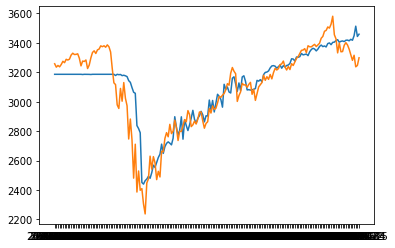

In [26]:
plt.plot(x, yPreds)
plt.plot(x, yTrues)
plt.savefig('graph.png')

In [ ]:
plt.plot(dataframe['casesDate'], dataframe['newCases'])